In [1]:
# Importar librerías necesarias
import pandas as pd
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Habilitar conversión entre pandas y R
pandas2ri.activate()


In [2]:
from rpy2.robjects.packages import importr

# Cargar el paquete base de R
base = importr('base')

In [3]:
# Verificar conexión con R e intentar cargar un paquete
utils = importr('utils')  # Librería para gestionar paquetes en R

try:
    depmixS4 = importr('depmixS4')  # Intentar cargar depmixS4
    print("El paquete 'depmixS4' se cargó correctamente.")
except:
    print("El paquete 'depmixS4' no está instalado. Procediendo a instalar...")
    utils.install_packages('depmixS4')
    depmixS4 = importr('depmixS4')
    print("El paquete 'depmixS4' se instaló y cargó correctamente.")


El paquete 'depmixS4' se cargó correctamente.


## Pre-Procesamiento de Datos

#### Prueba con Casos Media Móvil 7

- Para esto se considera la base mía llamada base_hito3, que contiene todo los datos brutos, sin variables de casos, aceleración, agregadas, considerando las 7310 filas.
- Se crea la variable llamada Casos_Diarios_Brutos (esto se hace en base a la primera derivada de la TasaCasosAcumulados).
- Luego, a partir de esta última variable, se crea una nueva variable llamada Casos_Diarios_Brutos_MM7, la cual corresponde a la media móvil de los Casos_Diarios_Brutos.

Calcular los casos diarios brutos (Casos_Diarios_Brutos): Esto efectivamente se calcula como la primera derivada de la variable acumulada TasaCasosAcumulados. En términos prácticos, se realiza restando el valor actual menos el valor anterior dentro de cada comuna.

Media móvil de 7 días (Casos_Diarios_Brutos_MM7): Esto se calcula suavizando la nueva columna Casos_Diarios_Brutos con una media móvil de 7 días. Esto ayuda a reducir el ruido en los datos.

Guardar la base final: Luego de estos cálculos, exportaremos la nueva base de datos en un archivo Excel llamado base_final.xlsx.

In [33]:
# Importar pandas
import pandas as pd

# 1. Cargar la base de datos original
base_hito3 = pd.read_excel("/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/SEXTO TRIMESTRE/TESIS MAGÍSTER DATA SCIENCE/DATOS BASE/base_hito3.xlsx")

# Verificar que la columna 'TasaCasosAcumulados' y 'Comuna' existan
if 'TasaCasosAcumulados' not in base_hito3.columns or 'Comuna' not in base_hito3.columns:
    raise ValueError("La base de datos debe contener las columnas 'TasaCasosAcumulados' y 'Comuna'.")

# 2. Calcular los casos diarios brutos
# Agrupar por comuna y calcular la diferencia diaria
base_hito3['Casos_Diarios_Brutos'] = base_hito3.groupby('Comuna')['TasaCasosAcumulados'].diff().fillna(0) #Se imputará con 0 como Placeholder en las filas con NaN (primeras filas por comuna), en vez de dropna() para evitar problemas posteriores con indice y merged.

# 3. Calcular la media móvil de 7 días
# Aplicar suavizado solo después de calcular los casos diarios brutos
base_hito3['Casos_Diarios_Brutos_MM7'] = (
    base_hito3.groupby('Comuna')['Casos_Diarios_Brutos']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

# 4. Exportar la nueva base de datos
base_hito3.to_excel("/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/SEXTO TRIMESTRE/TESIS MAGÍSTER DATA SCIENCE/DATOS BASE/base_final.xlsx", index=False)
print("Base final guardada como 'base_final.xlsx'.")


Base final guardada como 'base_final.xlsx'.


In [34]:
import pandas as pd

# 1. Importar la nueva base de datos
base_final = pd.read_excel("/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/SEXTO TRIMESTRE/TESIS MAGÍSTER DATA SCIENCE/DATOS BASE/base_final.xlsx")

# Verificar la estructura inicial de la base
print("Información inicial de la base:")
print(base_final.info())




Información inicial de la base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   IM_interno                  7310 non-null   float64       
 1   IM_externo                  7310 non-null   float64       
 2   inc_pc_comuna               7310 non-null   float64       
 3   TasaCasosAcumulados         7310 non-null   float64       
 4   Personas_hogar_promedio     7310 non-null   float64       
 5   inmigrantes                 7310 non-null   int64         
 6   total_hog_hacinados         7310 non-null   int64         
 7   indic_precariedad_vivienda  7310 non-null   float64       
 8   Comuna                      7310 non-null   object        
 9   fecha                       7310 non-null   datetime64[ns]
 10  dias                        7310 non-null   int64         
 11  por_educ_sup            

In [35]:
# base_final[base_final['Comuna']=='Vitacura'].head()

In [25]:
# base_final.describe()

In [26]:
# base_final.isnull().sum()

In [36]:
# Eliminar filas con NaN en las columnas 'Casos_Diarios_Brutos' y 'Casos_Diarios_Brutos_MM7'
#base_final = base_final.dropna(subset=['Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'])

# Verificar la base después de eliminar estas filas
print("Información después de eliminar filas con NaN en las columnas seleccionadas:")
print(base_final.info())

# Vista previa de las primeras filas
print("\nVista previa de la base limpia:")
print(base_final.head())


Información después de eliminar filas con NaN en las columnas seleccionadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   IM_interno                  7310 non-null   float64       
 1   IM_externo                  7310 non-null   float64       
 2   inc_pc_comuna               7310 non-null   float64       
 3   TasaCasosAcumulados         7310 non-null   float64       
 4   Personas_hogar_promedio     7310 non-null   float64       
 5   inmigrantes                 7310 non-null   int64         
 6   total_hog_hacinados         7310 non-null   int64         
 7   indic_precariedad_vivienda  7310 non-null   float64       
 8   Comuna                      7310 non-null   object        
 9   fecha                       7310 non-null   datetime64[ns]
 10  dias                        7310 non-null  

In [27]:
# base_final[base_final['Comuna']=='Vitacura'] # Igual a Vitacura

# Parte 1. Hidden Markov Models (HMM) no Homogéneo

### Paso 1: Configuración del modelo HMM no Homogéneo


In [37]:
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector

# Activar la conversión de pandas a R
pandas2ri.activate()

# Cargar el paquete depmixS4
depmixS4 = importr("depmixS4")

# Establecer la semilla en R para reproducibilidad
r('set.seed(2023)')

# Convertir la base a formato R
base_hito3_r = pandas2ri.py2rpy(base_final)

# Crear fórmula para la observación principal y covariables
hmm_formula = r("as.formula")("Casos_Diarios_Brutos_MM7 ~ 1")
trans_formula = r("as.formula")("~ IM_interno + IM_externo + Comuna")

# Crear una secuencia de días por comuna (para ntimes)
ntimes = IntVector(base_final.groupby("Comuna")["dias"].count().tolist())

# Solución: usar la función gaussian() directamente
gaussian_family = r['gaussian']()

# Configurar el modelo HMM
hmm_global_model = depmixS4.depmix(
    response=hmm_formula,
    nstates=3,  # Número de estados ocultos
    family=gaussian_family,  # Objeto familia válido
    data=base_hito3_r,
    transition=trans_formula,
    ntimes=ntimes
)

# Verificar información inicial del modelo
print("Modelo HMM global configurado:")
print(hmm_global_model)


Modelo HMM global configurado:
Initial state probabilities model 
  pr1   pr2   pr3 
0.333 0.333 0.333 

Transition model for state (component) 1 
Model of type multinomial (mlogit), formula: ~IM_interno + IM_externo + Comuna
Coefficients: 
                          St1 St2 St3
(Intercept)                 0   0   0
IM_interno                  0   0   0
IM_externo                  0   0   0
ComunaCerro Navia           0   0   0
ComunaConchali              0   0   0
ComunaEl Bosque             0   0   0
ComunaEstacion Central      0   0   0
ComunaHuechuraba            0   0   0
ComunaIndependencia         0   0   0
ComunaLa Cisterna           0   0   0
ComunaLa Florida            0   0   0
ComunaLa Granja             0   0   0
ComunaLa Pintana            0   0   0
ComunaLa Reina              0   0   0
ComunaLas Condes            0   0   0
ComunaLo Barnechea          0   0   0
ComunaLo Espejo             0   0   0
ComunaLo Prado              0   0   0
ComunaMacul                 0   0   0

#### Cómo las transiciones se incorporan al modelo

Configuración del modelo HMM:

Durante la configuración, especificaste una fórmula de transición:

r
Copiar código

~ IM_interno + IM_externo + Comuna

Esto indica que las probabilidades de transición dependen de las covariables IM_interno, IM_externo, y la comuna.

En términos de t00, t01, etc.:
Estas transiciones se parametrizan como funciones de las covariables y se ajustan durante el entrenamiento del modelo.

#### Evaluacion de Estados Ocultos Optimos (AIC, BIC, Likelihood):

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector

In [ ]:
# AQUÍ VIENE CÓDIGO EVALUACIÓN ESTADOS ÓPTIMOS DISPONIBLE EN PRUEBA 13

<img src="Evaluación de Estados Óptimos.png" alt="Drawing" style="width: 600px;"/>

<img src="output_estados_óptimos.png" alt="Drawing" style="width: 600px;"/>

Podemos decir que en base a los principios de parsimonia, interpretabilidad, y los objetivos prácticos del modelo la elección de 3 estados en vez de 5. Aquí hay una justificación detallada:

1. Parsimonia y Simplicidad del Modelo
Definición: La parsimonia implica elegir el modelo más simple que explique adecuadamente los datos.
Aunque el BIC es menor para el modelo de 5 estados, la diferencia con respecto al modelo de 3 estados no es significativa en términos prácticos:
BIC con 3 estados: 46,320.66
BIC con 5 estados: 44,857.43
La reducción del BIC (aproximadamente 1,463 puntos) no compensa el aumento en la complejidad del modelo.
Implicación: Un modelo con menos estados es más fácil de interpretar y ajustar a otros conjuntos de datos similares.
2. Interpretabilidad
Un modelo con 3 estados ocultos es más interpretable y más útil para el análisis y la comunicación con stakeholders no técnicos.
En términos prácticos:
Estado 1: Puede representar un nivel bajo de actividad o contagio.
Estado 2: Un nivel moderado de actividad o contagio.
Estado 3: Un nivel alto de actividad o contagio.
Con 5 estados, la interpretación de los estados adicionales podría ser redundante o difícil de explicar.
3. Convergencia y Estabilidad
Iteraciones necesarias para convergencia:
Modelo con 3 estados: 44 iteraciones.
Modelo con 5 estados: El log-likelihood converge, pero el número de iteraciones y tiempo necesario es mayor (puede indicar mayor complejidad y sensibilidad del modelo).
Implicación: El modelo con 3 estados es más estable y menos propenso a problemas de sobreajuste.
4. Propósito del Análisis
Si el objetivo es capturar patrones generales en los datos de movilidad y contagio, 3 estados son suficientes para representar los niveles principales de transición sin agregar complejidad innecesaria.
5. Visualización y Evaluación Práctica
El gráfico de métricas muestra que el log-likelihood mejora consistentemente con más estados, pero el incremento marginal disminuye después de 3 estados.
El AIC y BIC penalizan la complejidad del modelo, y aunque el modelo con 5 estados tiene el menor BIC, el de 3 estados está dentro de un rango razonable.
Resumen de la Justificación
Menor Complejidad: Más fácil de interpretar y comunicar.
Convergencia Estable: Menor número de iteraciones y más robustez.
Propósito del Análisis: Captura patrones generales sin redundancias.
Margen de Mejora Limitado: Las métricas (BIC y log-likelihood) no mejoran significativamente al agregar estados adicionales.
Por estas razones, seleccionar 3 estados ocultos es una decisión sólida que equilibra simplicidad, interpretabilidad y ajuste adecuado al problema.

### Paso 2: Ajustar el Modelo
Ahora necesitamos ajustar el modelo para calcular los parámetros y las probabilidades de transición basadas en los datos.

In [38]:
# Ajustar el modelo HMM
hmm_fitted = depmixS4.fit(hmm_global_model)

# Verificar información del modelo ajustado
print("\nModelo HMM global ajustado:")
print(hmm_fitted)


converged at iteration 33 with logLik: -22487.23 

Modelo HMM global ajustado:
Convergence info: Log likelihood converged to within tol. (relative change) 
'log Lik.' -22487.23 (df=224)
AIC:  45422.46 
BIC:  46967.39 



##### Interpretación de los resultados ajustados:

Log Lik. (-22487.22):
- Este es el valor de la función de verosimilitud máxima para el modelo ajustado.
- En general, valores menos negativos indican un mejor ajuste (comparado con otros modelos similares).

AIC (45422.44) y BIC (46967.37):
- Estas métricas penalizan la complejidad del modelo para evitar sobreajuste.
- AIC (Criterio de Información de Akaike): Penaliza con base en el número de parámetros ajustados.
- BIC (Criterio de Información Bayesiano): Penaliza más fuertemente modelos con demasiados parámetros y es útil en grandes muestras.

Interpretación: Menores valores indican un modelo más parsimonioso y con mejor ajuste.

Iteraciones (35):
- El modelo tardó 35 iteraciones en converger, lo que es razonable para datos complejos como este.

#### Cómo las transiciones se incorporan en el Ajuste del Modelo

Durante el entrenamiento, el modelo optimiza la matriz de transición utilizando las covariables.
Cada celda de la matriz representa la probabilidad de transición entre dos estados específicos, por ejemplo:

- t00: Probabilidad de permanecer en el estado 0.
- t01: Probabilidad de moverse del estado 0 al estado 1.
- t10: Probabilidad de moverse del estado 1 al estado 0, etc.

Salida de getpars():

La función getpars() extrae los parámetros ajustados del modelo, incluida la matriz de transición que contiene las probabilidades de t00, t01, etc., para cada estado.

In [39]:
# Ver todos los slots disponibles en el objeto hmm_fitted
print(r['slotNames'](hmm_fitted))

['message' 'conMat' 'lin.upper' 'lin.lower' 'posterior' 'transition'
 'trDens' 'homogeneous' 'response' 'prior' 'dens' 'init' 'nstates' 'nresp'
 'ntimes' 'npars']


Ahora sabemos qué slots están disponibles en el objeto hmm_fitted. Basándonos en esta lista:

trDens:
- Este slot probablemente contiene la matriz de densidades de transición ajustadas (probabilidades entre estados, como t00, t01, etc.).

Vamos a acceder a él para inspeccionar la matriz de transición. 

### Paso 3: Extración Matriz de Transición y Secuencia de Viterbi

##### Código para extraer la matriz de transición y secuencia de estados (trDens).

In [40]:
# Extraer la matriz de transición ajustada
transition_matrix = r['slot'](hmm_fitted, "trDens")
print("\nMatriz de transición ajustada:")
print(transition_matrix)



Matriz de transición ajustada:
[[[9.94179767e-01 7.75102239e-04 4.05604328e-25]
  [5.82023131e-03 9.98063691e-01 1.15839220e-07]
  [1.32534592e-09 1.16120667e-03 9.99999884e-01]]

 [[9.94230661e-01 1.28510557e-03 1.58016184e-23]
  [5.76933820e-03 9.98027349e-01 5.42151969e-07]
  [1.01607271e-09 6.87545289e-04 9.99999458e-01]]

 [[9.93255377e-01 6.81287826e-04 6.88944409e-26]
  [6.74462193e-03 9.97807494e-01 7.80461522e-08]
  [1.49056017e-09 1.51121826e-03 9.99999922e-01]]

 ...

 [[9.99999876e-01 9.99754324e-01 1.00000000e+00]
  [1.23902175e-07 2.45675817e-04 1.93453027e-52]
  [6.83130310e-14 6.09205767e-25 3.21757691e-79]]

 [[9.99999870e-01 9.99773370e-01 1.00000000e+00]
  [1.30374640e-07 2.26630500e-04 1.86244001e-52]
  [6.66762572e-14 5.41573490e-25 2.42294758e-79]]

 [[9.99999806e-01 9.99882042e-01 1.00000000e+00]
  [1.93645670e-07 1.17958242e-04 1.24655275e-52]
  [5.44840611e-14 2.05936950e-25 2.22100051e-80]]]


##### Código para extraer la matriz de transición y secuencia de estados posterior.

Posterior: Este slot debería contener las probabilidades posteriores de los estados ocultos para cada observación, lo que puede incluir la secuencia más probable (Viterbi path).

In [41]:
# Extraer la secuencia de estados más probable (Viterbi path)
posterior_probs = r['slot'](hmm_fitted, "posterior")
print("\nPosterior (incluye Viterbi path):")
print(posterior_probs)



Posterior (incluye Viterbi path):
     state            S1            S2           S3
1        1  1.000000e+00  0.000000e+00 0.000000e+00
2        1  9.995552e-01  4.447561e-04 5.605360e-11
3        1  9.995467e-01  4.532478e-04 2.797046e-08
4        1  9.993914e-01  6.084925e-04 1.307242e-07
5        1  9.989548e-01  1.045161e-03 2.530570e-08
6        1  9.986811e-01  1.316847e-03 2.063671e-06
7        1  9.986310e-01  1.346486e-03 2.247052e-05
8        1  9.990029e-01  9.954883e-04 1.631283e-06
9        1  9.990080e-01  9.918961e-04 1.032993e-07
10       1  9.988831e-01  1.116824e-03 4.282033e-08
11       1  9.984254e-01  1.574546e-03 2.951439e-08
12       1  9.986111e-01  1.382151e-03 6.714664e-06
13       1  9.991926e-01  7.879811e-04 1.944091e-05
14       1  9.992711e-01  7.173326e-04 1.151944e-05
15       1  9.994236e-01  5.757687e-04 6.047712e-07
16       1  9.997015e-01  2.984950e-04 4.225065e-08
17       1  9.991402e-01  8.597527e-04 4.385420e-09
18       1  9.986976e-01  1.3

In [42]:
# Convertir posterior_probs a un DataFrame de pandas
viterbi_df = pd.DataFrame(posterior_probs)

In [43]:
# Inspeccionar el tipo de objeto y el contenido de posterior_probs
print(type(posterior_probs))  # Tipo del objeto
print(posterior_probs)        # Mostrar su contenido


<class 'rpy2.robjects.vectors.DataFrame'>
     state            S1            S2           S3
1        1  1.000000e+00  0.000000e+00 0.000000e+00
2        1  9.995552e-01  4.447561e-04 5.605360e-11
3        1  9.995467e-01  4.532478e-04 2.797046e-08
4        1  9.993914e-01  6.084925e-04 1.307242e-07
5        1  9.989548e-01  1.045161e-03 2.530570e-08
6        1  9.986811e-01  1.316847e-03 2.063671e-06
7        1  9.986310e-01  1.346486e-03 2.247052e-05
8        1  9.990029e-01  9.954883e-04 1.631283e-06
9        1  9.990080e-01  9.918961e-04 1.032993e-07
10       1  9.988831e-01  1.116824e-03 4.282033e-08
11       1  9.984254e-01  1.574546e-03 2.951439e-08
12       1  9.986111e-01  1.382151e-03 6.714664e-06
13       1  9.991926e-01  7.879811e-04 1.944091e-05
14       1  9.992711e-01  7.173326e-04 1.151944e-05
15       1  9.994236e-01  5.757687e-04 6.047712e-07
16       1  9.997015e-01  2.984950e-04 4.225065e-08
17       1  9.991402e-01  8.597527e-04 4.385420e-09
18       1  9.986976e-

In [44]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()  # Activar conversiones

# Convertir posterior_probs a DataFrame de pandas
viterbi_df = pandas2ri.rpy2py(posterior_probs)

In [45]:
print(type(viterbi_df))  # Debe ser <class 'pandas.core.frame.DataFrame'>
print(viterbi_df.head())  # Inspeccionar contenido

<class 'pandas.core.frame.DataFrame'>
   state        S1        S2            S3
1    1.0  1.000000  0.000000  0.000000e+00
2    1.0  0.999555  0.000445  5.605360e-11
3    1.0  0.999547  0.000453  2.797046e-08
4    1.0  0.999391  0.000608  1.307242e-07
5    1.0  0.998955  0.001045  2.530570e-08


In [46]:
# Crear una columna 'Index' para combinar con base_final
viterbi_df['Index'] = viterbi_df.index

In [47]:
print("Columnas en base_final:")
print(base_final.columns)


Columnas en base_final:
Index(['IM_interno', 'IM_externo', 'inc_pc_comuna', 'TasaCasosAcumulados',
       'Personas_hogar_promedio', 'inmigrantes', 'total_hog_hacinados',
       'indic_precariedad_vivienda', 'Comuna', 'fecha', 'dias', 'por_educ_sup',
       'porc_postgrado', 'IPS_2020', 'Prioridad_2020', 'CODIGO', 'year',
       'month', 'paso', 'paso_etiqueta', 'Fecha inicio cuarentena',
       'Fecha término cuarentena', 'Casos_Diarios_Brutos',
       'Casos_Diarios_Brutos_MM7'],
      dtype='object')


In [48]:
# Agregar una columna de índice a base_final
base_final = base_final.reset_index()

# Confirmar que ahora existe la columna 'index'
print(base_final.columns)

Index(['index', 'IM_interno', 'IM_externo', 'inc_pc_comuna',
       'TasaCasosAcumulados', 'Personas_hogar_promedio', 'inmigrantes',
       'total_hog_hacinados', 'indic_precariedad_vivienda', 'Comuna', 'fecha',
       'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020', 'Prioridad_2020',
       'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')


In [49]:
# Convertir ambos índices al mismo tipo
viterbi_df['Index'] = viterbi_df['Index'].astype(int)  # Convertir a int
base_final['index'] = base_final['index'].astype(int)  # Asegurar que esté en int

# Verificar la alineación nuevamente
print("Indices en viterbi_df (después de conversión):")
print(viterbi_df['Index'].head())

print("\nIndices en base_final (después de conversión):")
print(base_final['index'].head())

# Comprobar si hay valores en común después de la conversión
comunes = set(viterbi_df['Index']).intersection(set(base_final['index']))
print(f"\nNúmero de índices comunes después de la conversión: {len(comunes)}")

Indices en viterbi_df (después de conversión):
1    1
2    2
3    3
4    4
5    5
Name: Index, dtype: int64

Indices en base_final (después de conversión):
0    0
1    1
2    2
3    3
4    4
Name: index, dtype: int64

Número de índices comunes después de la conversión: 7309


In [50]:
# Realizar el merge basado en los índices comunes
viterbi_merged = pd.merge(
    viterbi_df,
    base_final,
    left_on='Index',
    right_on='index',
    how='inner'  # Solo mantener los valores con índices comunes
)

# Inspeccionar los primeros resultados
print(viterbi_merged.tail())

# Asegurarse de que las dimensiones son correctas
print(f"Dimensiones del dataframe combinado: {viterbi_merged.shape}")


      state   S1            S2            S3  Index  index  IM_interno  \
7304    1.0  1.0  1.371201e-07  1.340233e-13   7305   7305   11.752247   
7305    1.0  1.0  1.502948e-08  4.277580e-15   7306   7306   11.723245   
7306    1.0  1.0  1.808305e-08  3.261364e-15   7307   7307   12.242963   
7307    1.0  1.0  6.336069e-09  1.350627e-15   7308   7308   12.230152   
7308    1.0  1.0  6.667055e-09  1.318266e-15   7309   7309   12.133123   

      IM_externo  inc_pc_comuna  TasaCasosAcumulados  ...  \
7304   10.043483      1659485.0          1868.270403  ...   
7305   10.362570      1659485.0          1871.370409  ...   
7306   10.786483      1659485.0          1874.470416  ...   
7307   10.837468      1659485.0          1876.537086  ...   
7308   11.248013      1659485.0          1879.637093  ...   

            Prioridad_2020  CODIGO  year  month paso paso_etiqueta  \
7304  Sin Prioridad Social   13132  2020     10    4      Apertura   
7305  Sin Prioridad Social   13132  2020     10 

In [ ]:
# print(viterbi_merged.head())

In [51]:
vitacura_data = base_final[base_final['Comuna'] == 'Vitacura']
print(vitacura_data.tail(10))  # Ver las últimas filas de Vitacura


      index  IM_interno  IM_externo  inc_pc_comuna  TasaCasosAcumulados  \
7300   7300   11.854549   10.323617      1659485.0          1854.837043   
7301   7301   12.053880   10.559673      1659485.0          1856.903714   
7302   7302   12.551467   11.245006      1659485.0          1860.003720   
7303   7303   10.130821    8.900408      1659485.0          1862.070391   
7304   7304   10.346342    7.395395      1659485.0          1865.170397   
7305   7305   11.752247   10.043483      1659485.0          1868.270403   
7306   7306   11.723245   10.362570      1659485.0          1871.370409   
7307   7307   12.242963   10.786483      1659485.0          1874.470416   
7308   7308   12.230152   10.837468      1659485.0          1876.537086   
7309   7309   12.133123   11.248013      1659485.0          1879.637093   

      Personas_hogar_promedio  inmigrantes  total_hog_hacinados  \
7300                 2.715172         9305                 4770   
7301                 2.715172         93

In [52]:
# Verifica si había NaN en las columnas eliminadas
vitacura_na = base_hito3[(base_hito3['Comuna'] == 'Vitacura') & 
                         (base_hito3[['Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7']].isnull().any(axis=1))]
print(vitacura_na)


Empty DataFrame
Columns: [IM_interno, IM_externo, inc_pc_comuna, TasaCasosAcumulados, Personas_hogar_promedio, inmigrantes, total_hog_hacinados, indic_precariedad_vivienda, Comuna, fecha, dias, por_educ_sup, porc_postgrado, IPS_2020, Prioridad_2020, CODIGO, year, month, paso, paso_etiqueta, Fecha inicio cuarentena, Fecha término cuarentena, Casos_Diarios_Brutos, Casos_Diarios_Brutos_MM7]
Index: []

[0 rows x 24 columns]


In [53]:
# Filtra los datos de Vitacura y revisa el cálculo de la media móvil
vitacura_mm7 = base_hito3[base_hito3['Comuna'] == 'Vitacura'][['dias', 'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7']]
print(vitacura_mm7.tail(10))


      dias  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7
7300   206              3.100006                  3.247626
7301   207              2.066671                  3.100006
7302   208              3.100006                  3.247626
7303   209              2.066671                  2.952387
7304   210              3.100006                  2.804768
7305   211              3.100006                  2.657148
7306   212              3.100006                  2.804768
7307   213              3.100006                  2.804768
7308   214              2.066671                  2.804768
7309   215              3.100006                  2.804768


In [54]:
# Verifica los índices
print("Indices en viterbi_df:", viterbi_df['Index'].unique())
print("Indices en base_final:", base_final['index'].unique())

# Verifica diferencias
indices_diferentes = set(base_final['index']) - set(viterbi_df['Index'])
print("Indices en base_final no presentes en viterbi_df:", indices_diferentes)


Indices en viterbi_df: [   1    2    3 ... 7308 7309 7310]
Indices en base_final: [   0    1    2 ... 7307 7308 7309]
Indices en base_final no presentes en viterbi_df: {0}


### Paso 4: Heatmap Serie de Viterbi

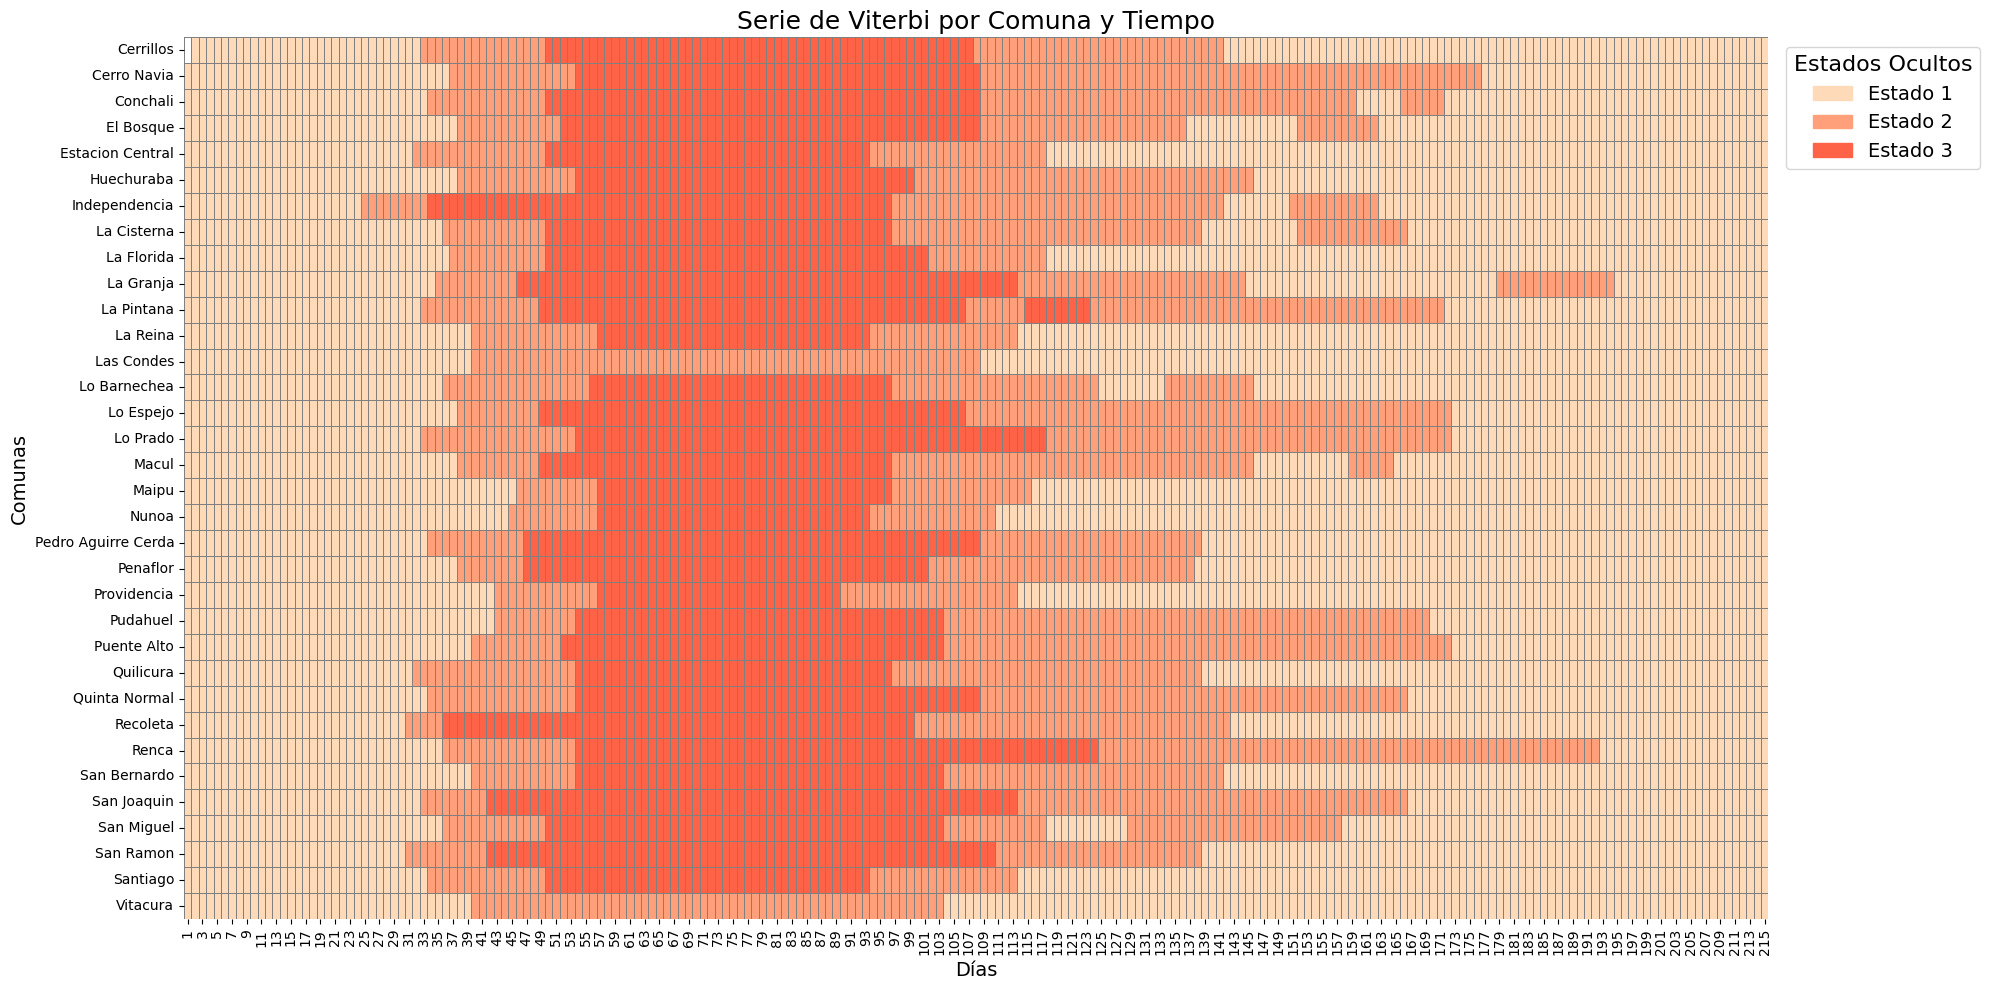

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Crear el heatmap pivotando los datos
viterbi_pivot = viterbi_merged.pivot(index='Comuna', columns='dias', values='state')

# Definir los colores personalizados para cada estado
# Definir colores pastel
custom_colors = ['PeachPuff', 'LightSalmon', 'Tomato']  # Tomato (Severo)

# Crear el mapeo para los estados
custom_palette = dict(zip([1, 2, 3], custom_colors))


# Crear el heatmap sin la barra de color (cbar=False)
plt.figure(figsize=(20, 10))
sns.heatmap(
    viterbi_pivot,
    cmap=custom_colors,  # Usar los colores personalizados
    linewidths=0.5,
    linecolor='gray',
    cbar=False  # Desactivar la barra de color
)

# Crear una leyenda personalizada
legend_labels = ['Estado 1', 'Estado 2', 'Estado 3']  # Etiquetas para los estados
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(custom_colors, legend_labels)]

# Añadir la leyenda más cerca
plt.legend(
    handles=legend_handles, 
    title="Estados Ocultos", 
    bbox_to_anchor=(1.005, 1),  # Acercar aún más la leyenda al gráfico
    loc='upper left',          # Mantener la posición superior izquierda
    fontsize=14,               # Tamaño de fuente de las etiquetas
    title_fontsize=16          # Tamaño de fuente del título de la leyenda
)

# Títulos y etiquetas
plt.title('Serie de Viterbi por Comuna y Tiempo', fontsize=18)
plt.xlabel('Días', fontsize=14)
plt.ylabel('Comunas', fontsize=14)

# Ajustar el espaciado para evitar bordes innecesarios
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [73]:
base_final.columns

Index(['index', 'IM_interno', 'IM_externo', 'inc_pc_comuna',
       'TasaCasosAcumulados', 'Personas_hogar_promedio', 'inmigrantes',
       'total_hog_hacinados', 'indic_precariedad_vivienda', 'Comuna', 'fecha',
       'dias', 'por_educ_sup', 'porc_postgrado', 'IPS_2020', 'Prioridad_2020',
       'CODIGO', 'year', 'month', 'paso', 'paso_etiqueta',
       'Fecha inicio cuarentena', 'Fecha término cuarentena',
       'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7'],
      dtype='object')

In [74]:
# Asegurarte de que viterbi_df y base_final existen y están correctamente alineados
print(viterbi_df.head())  # Verifica que tiene las columnas 'Index' y 'Estado'
print(base_final.head())  # Verifica las columnas disponibles para merge

# Crear el DataFrame combinado nuevamente
viterbi_combined = viterbi_df.merge(
    base_final,
    left_on='Index',
    right_index=True,  # Usamos el índice de base_final para el merge
    how='inner'        # Inner para asegurarnos de que solo tomamos valores comunes
)

# Inspeccionar el DataFrame combinado
print(viterbi_combined.head())
print(viterbi_combined.columns)


   state        S1        S2            S3  Index
1    1.0  1.000000  0.000000  0.000000e+00      1
2    1.0  0.999555  0.000445  5.605360e-11      2
3    1.0  0.999547  0.000453  2.797046e-08      3
4    1.0  0.999391  0.000608  1.307242e-07      4
5    1.0  0.998955  0.001045  2.530570e-08      5
   index  IM_interno  IM_externo  inc_pc_comuna  TasaCasosAcumulados  \
0      0    1.918137    7.524704      267197.56             0.000000   
1      1    1.970381    7.804008      267197.56             2.248303   
2      2    1.845790    7.471452      267197.56             4.496605   
3      3    1.678598    6.891732      267197.56             4.496605   
4      4    1.736766    8.317872      267197.56             4.496605   

   Personas_hogar_promedio  inmigrantes  total_hog_hacinados  \
0                 3.145581         3606                68120   
1                 3.145581         3606                68120   
2                 3.145581         3606                68120   
3          

In [75]:
# viterbi_combined.columns

In [76]:
# viterbi_combined.info()

# Parte 2. EDA por Estados Ocultos y Transiciones determinadas a partir de Hidden Markov Models (HMM) no Homogéneo

- Estado 1: Contagio Leve
- Estado 2: Contagio Moderado
- Estado 3: Contagio Severo

In [78]:
# viterbi_merged.info()

In [79]:
# Seleccionar las columnas necesarias
eda_data = viterbi_merged[['state', 'IM_interno', 'IM_externo', 'TasaCasosAcumulados', 
                             'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7', 
                             'inc_pc_comuna', 'Personas_hogar_promedio', 
                             'inmigrantes', 'total_hog_hacinados',
                             'indic_precariedad_vivienda', 'por_educ_sup', 'IPS_2020']]


# Resumen estadístico por estado
summary_by_state = eda_data.groupby('state').describe()

print("Resumen estadístico por estado:")
print(summary_by_state)

Resumen estadístico por estado:
      IM_interno                                                              \
           count      mean       std       min       25%       50%       75%   
state                                                                          
1.0       3618.0  4.189450  2.377113  0.544551  2.428222  3.722932  5.307930   
2.0       1976.0  3.185046  1.571429  0.448905  2.028078  2.901681  3.895608   
3.0       1715.0  2.616502  1.171933  0.403075  1.671291  2.409299  3.365982   

                 IM_externo            ... por_educ_sup       IPS_2020  \
             max      count      mean  ...          75%   max    count   
state                                  ...                               
1.0    13.124657     3618.0  5.970157  ...         37.5  59.7   3618.0   
2.0     9.075400     1976.0  5.248230  ...         21.3  59.7   1976.0   
3.0     7.512220     1715.0  4.669041  ...         18.9  59.7   1715.0   

                                          

In [80]:
# Seleccionar las columnas necesarias
eda_data = viterbi_combined[['state', 'IM_interno', 'IM_externo', 'TasaCasosAcumulados', 
                             'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7', 
                             'inc_pc_comuna', 'Personas_hogar_promedio', 
                             'inmigrantes', 'total_hog_hacinados',
                             'indic_precariedad_vivienda', 'por_educ_sup', 'IPS_2020']]


# Resumen estadístico por estado
summary_by_state = eda_data.groupby('state').describe()

print("Resumen estadístico por estado:")
print(summary_by_state)

Resumen estadístico por estado:
      IM_interno                                                              \
           count      mean       std       min       25%       50%       75%   
state                                                                          
1.0       3618.0  4.189450  2.377113  0.544551  2.428222  3.722932  5.307930   
2.0       1976.0  3.185046  1.571429  0.448905  2.028078  2.901681  3.895608   
3.0       1715.0  2.616502  1.171933  0.403075  1.671291  2.409299  3.365982   

                 IM_externo            ... por_educ_sup       IPS_2020  \
             max      count      mean  ...          75%   max    count   
state                                  ...                               
1.0    13.124657     3618.0  5.970157  ...         37.5  59.7   3618.0   
2.0     9.075400     1976.0  5.248230  ...         21.3  59.7   1976.0   
3.0     7.512220     1715.0  4.669041  ...         18.9  59.7   1715.0   

                                          

In [81]:
# summary_by_state

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

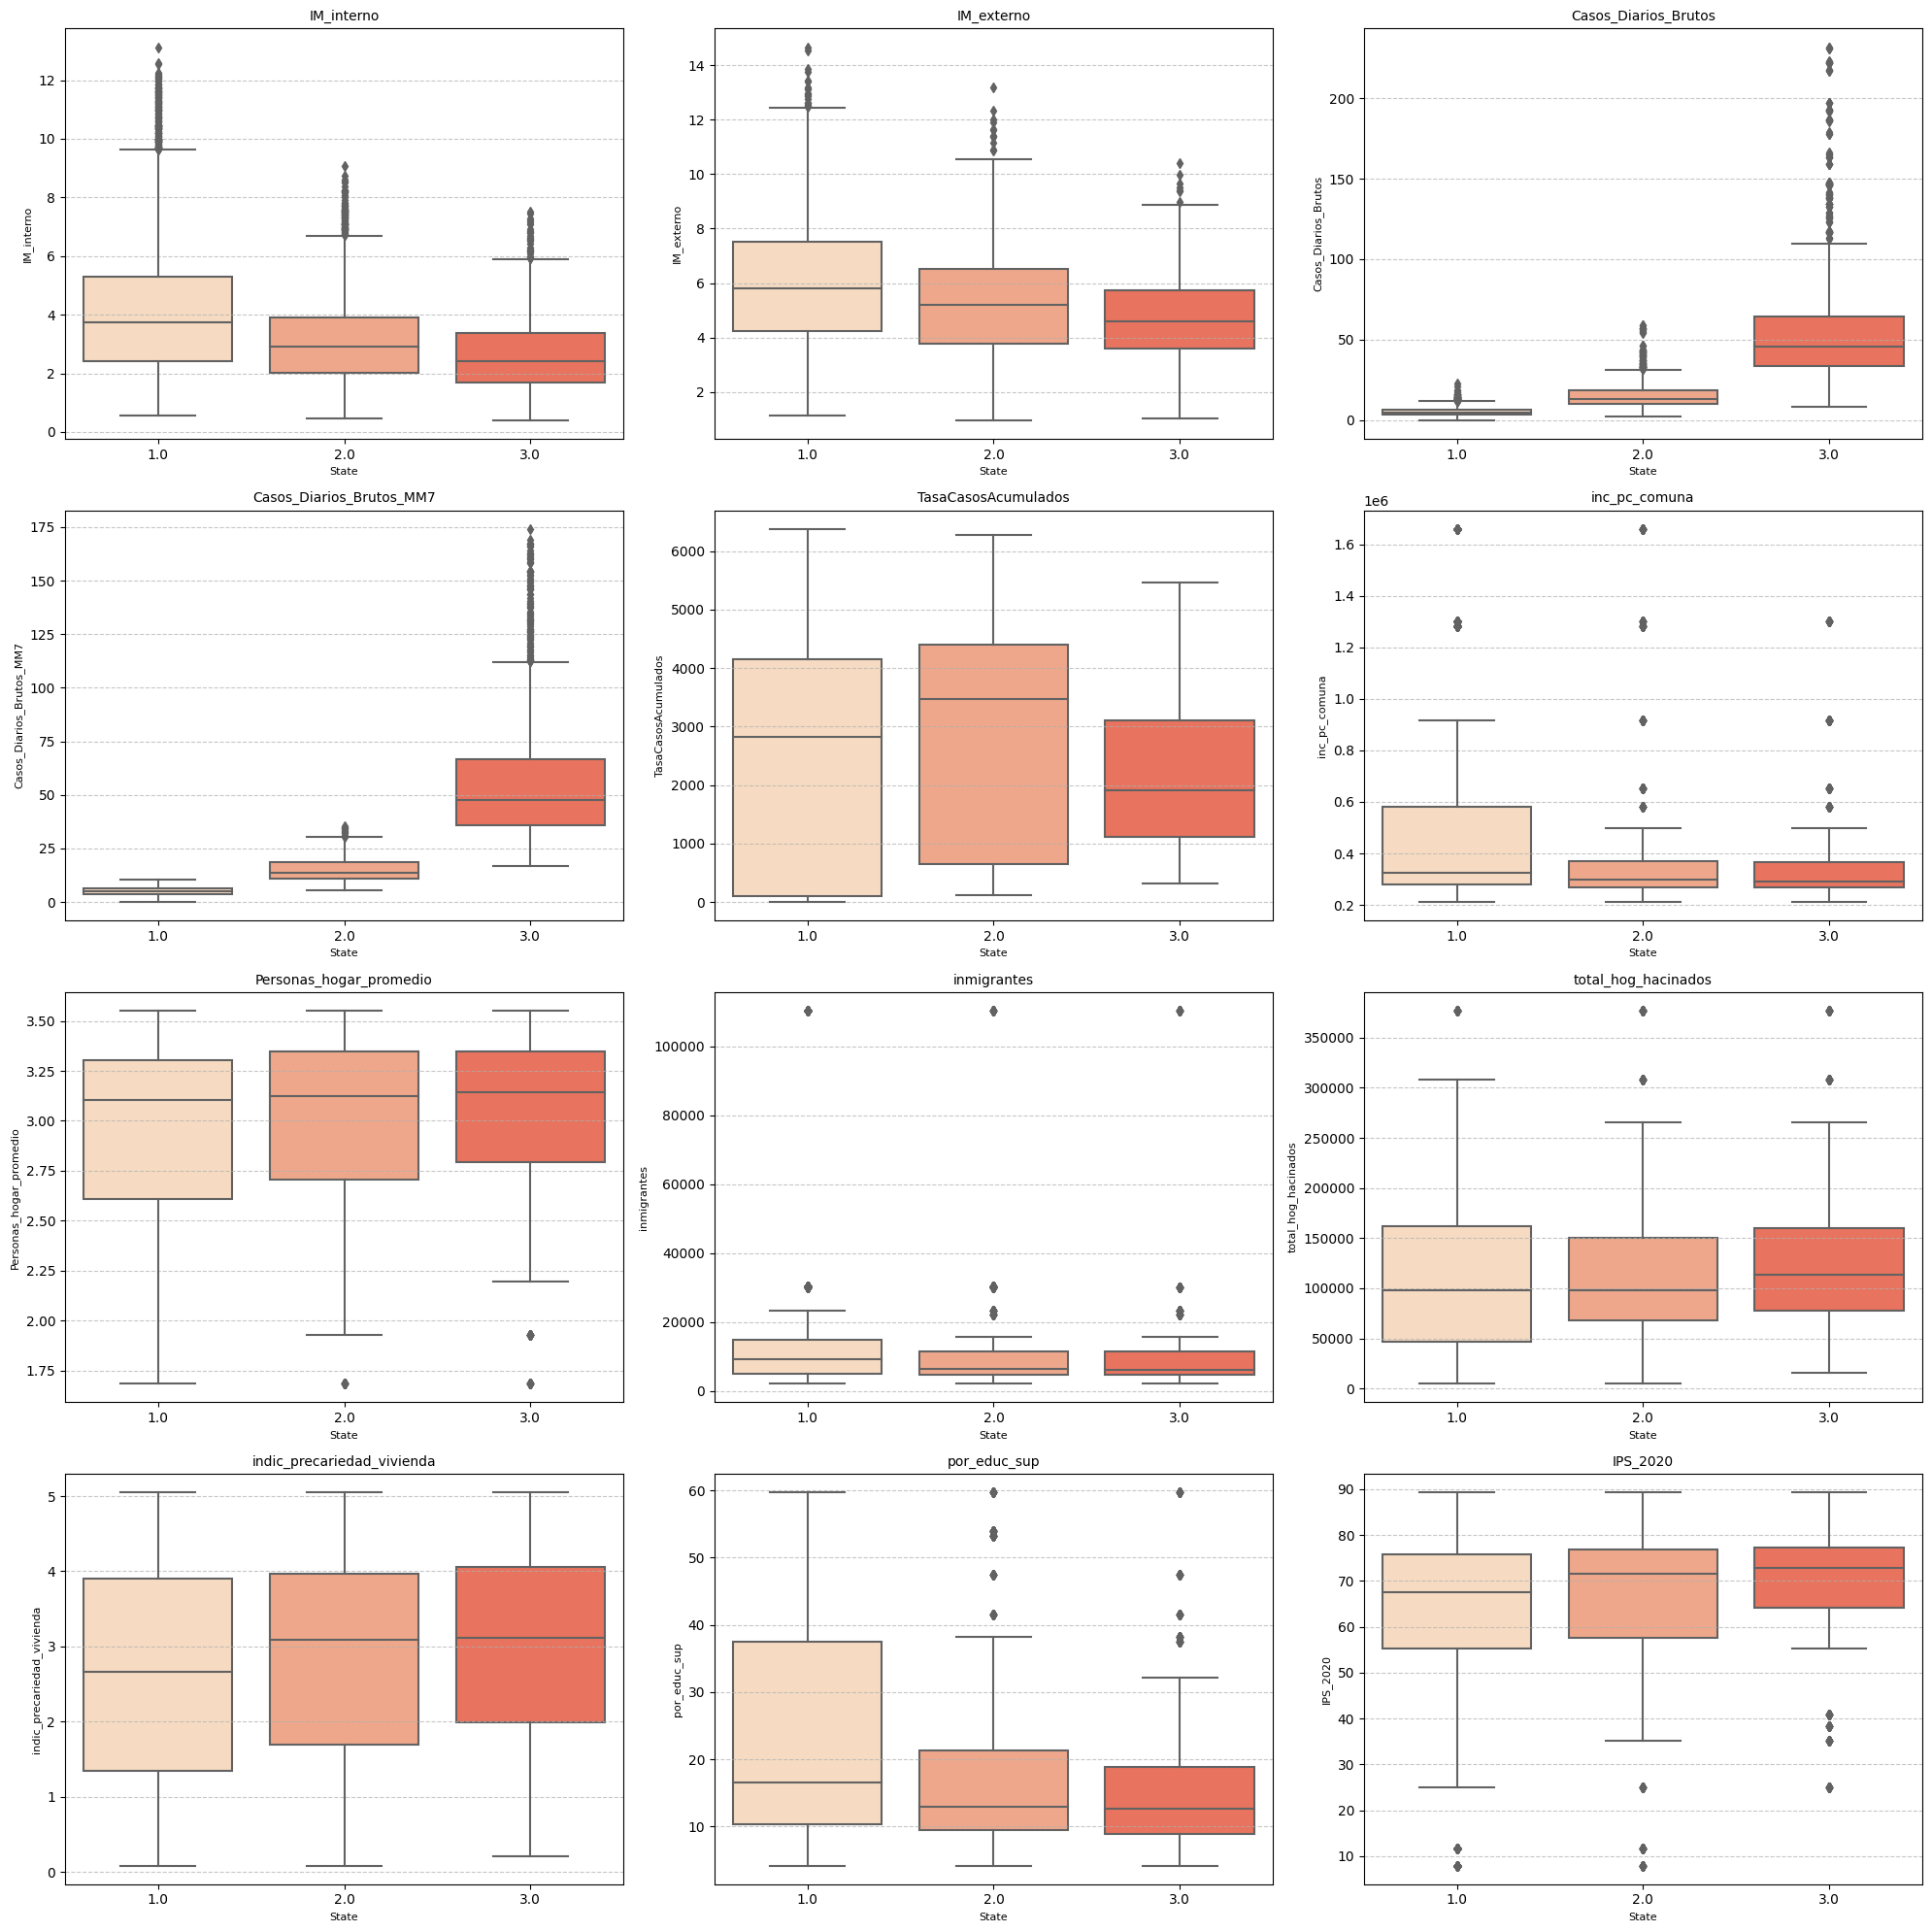

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'state' a cadenas con formato flotante
eda_data.loc[:, 'state'] = eda_data['state'].astype(str)

# Definir la paleta de colores basada en severidad
custom_palette = {
    '1.0': 'PeachPuff',  # Leve
    '2.0': 'LightSalmon',  # Moderado
    '3.0': 'Tomato'   # Severo
}

# Variables que queremos graficar
variables = ['IM_interno', 'IM_externo', 'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7',
             'TasaCasosAcumulados', 'inc_pc_comuna', 'Personas_hogar_promedio', 
             'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
             'por_educ_sup', 'IPS_2020']

# Configuración de la figura
n_rows = 4  # Número de filas
n_cols = 3  # Número de columnas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Ajusta el tamaño total

# Aplanar los ejes para iterar más fácilmente
axes = axes.ravel()

# Crear los boxplots para cada variable sin leyendas individuales
for i, var in enumerate(variables):
    sns.boxplot(data=eda_data, x='state', y=var, hue='state', palette=custom_palette, ax=axes[i], dodge=False)
    axes[i].legend_.remove()  # Eliminar leyenda individual
    axes[i].set_title(f'{var}', fontsize=10)
    axes[i].set_xlabel('State', fontsize=8)
    axes[i].set_ylabel(var, fontsize=8)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Eliminar cualquier subplot sobrante si hay más ejes que gráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()



*Instrucción ChatGPT: Quiero hacer otra cosa ahora. Podrías hacer un conteo de cuánto estuvo en cada estado cada comuna, para hacer una estadística descriptiva de eso, cosa de poner ver si las que estuvieron más tiempo en el color azul que sería más casos, tienen características específicas como de pobreza, etc.* 

Paso 1: Conteo de días en cada estado por comuna

El siguiente código agrupa los datos por comuna y estado para calcular cuántos días estuvo cada comuna en cada estado:

In [84]:
# Crear una tabla con los días que cada comuna estuvo en cada estado
conteo_estados = viterbi_merged.groupby(['Comuna', 'state']).size().reset_index(name='Días_en_estado')

# Mostrar el resultado
print("Conteo de días en cada estado por comuna:")
print(conteo_estados)


Conteo de días en cada estado por comuna:
         Comuna  state  Días_en_estado
0     Cerrillos    1.0             105
1     Cerrillos    2.0              51
2     Cerrillos    3.0              58
3   Cerro Navia    1.0              75
4   Cerro Navia    2.0              85
..          ...    ...             ...
95     Santiago    1.0             135
96     Santiago    2.0              36
97     Santiago    3.0              44
98     Vitacura    1.0             151
99     Vitacura    2.0              64

[100 rows x 3 columns]


In [85]:
# viterbi_merged.columns

In [86]:
# Calcular promedios por estado y comuna
promedios_estado_comuna = (
    viterbi_merged.groupby(['state', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'TasaCasosAcumulados': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'Casos_Diarios_Brutos_MM7': 'mean',
        'inc_pc_comuna': 'mean',
        'Personas_hogar_promedio': 'mean',
        'inmigrantes': 'mean',
        'total_hog_hacinados': 'mean',
        'indic_precariedad_vivienda': 'mean',
        'por_educ_sup': 'mean',
        'IPS_2020': 'mean'
    }).reset_index()
)

# Combinar con el conteo de días en cada estado
conteo_estados_caracteristicas= conteo_estados.merge(
    promedios_estado_comuna,
    on=['state', 'Comuna']
)

# Inspeccionar el DataFrame combinado actualizado
print("Datos combinados actualizados de tiempo en estados y características por comuna:")
print(conteo_estados_caracteristicas.head())


Datos combinados actualizados de tiempo en estados y características por comuna:
        Comuna  state  Días_en_estado  IM_interno  IM_externo  \
0    Cerrillos    1.0             105    2.454349    8.899063   
1    Cerrillos    2.0              51    2.104635    8.157416   
2    Cerrillos    3.0              58    1.817600    6.867895   
3  Cerro Navia    1.0              75    2.199595    7.652362   
4  Cerro Navia    2.0              85    2.370871    7.486827   

   TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
0          2656.765571              5.331689                  5.142954   
1          2348.528332             15.165021                 15.379145   
2          1903.129947             44.869141                 44.996508   
3          2727.696861              4.314510                  4.043388   
4          3818.349605             15.351552                 14.808886   

   inc_pc_comuna  Personas_hogar_promedio  inmigrantes  total_hog_hacinados  \
0   

In [87]:
import numpy as np

# Crear promedios ponderados por días en estado
estadisticas_estado_ponderadas = conteo_estados_caracteristicas.groupby('state').apply(
    lambda x: pd.Series({
        'Días_mean': x['Días_en_estado'].mean(),
        'Días_std': x['Días_en_estado'].std(),
        'Días_min': x['Días_en_estado'].min(),
        'Días_max': x['Días_en_estado'].max(),
        'IM_interno_mean': np.average(x['IM_interno'], weights=x['Días_en_estado']),
        'IM_externo_mean': np.average(x['IM_externo'], weights=x['Días_en_estado']),
        'inc_pc_comuna_mean': np.average(x['inc_pc_comuna'], weights=x['Días_en_estado']),
        'TasaCasosAcumulados_mean': np.average(x['TasaCasosAcumulados'], weights=x['Días_en_estado']),
        'Casos_Diarios_Brutos_mean': np.average(x['Casos_Diarios_Brutos'], weights=x['Días_en_estado']),
        'Casos_Diarios_Brutos_MM7_mean': np.average(x['Casos_Diarios_Brutos_MM7'], weights=x['Días_en_estado']),
        'Personas_hogar_promedio_mean': np.average(x['Personas_hogar_promedio'], weights=x['Días_en_estado']),
        'inmigrantes_mean': np.average(x['inmigrantes'], weights=x['Días_en_estado']),
        'total_hog_hacinados_mean': np.average(x['total_hog_hacinados'], weights=x['Días_en_estado']),
        'indic_precariedad_vivienda_mean': np.average(x['indic_precariedad_vivienda'], weights=x['Días_en_estado']),
        'por_educ_sup_mean': np.average(x['por_educ_sup'], weights=x['Días_en_estado']),
        'IPS_2020_mean': np.average(x['IPS_2020'], weights=x['Días_en_estado']),
    })
).reset_index()

# Mostrar los resultados
print("Resumen estadístico ponderado por estado:")
print(estadisticas_estado_ponderadas)


Resumen estadístico ponderado por estado:
   state   Días_mean  Días_std  Días_min  Días_max  IM_interno_mean  \
0    1.0  106.411765  25.38804      58.0     151.0         4.189450   
1    2.0   58.117647  16.92007      29.0      86.0         3.185046   
2    3.0   53.593750  10.63427      33.0      72.0         2.616502   

   IM_externo_mean  inc_pc_comuna_mean  TasaCasosAcumulados_mean  \
0         5.970157       516508.371545               2511.291283   
1         5.248230       436047.887100               2968.176546   
2         4.669041       365184.639464               2179.677452   

   Casos_Diarios_Brutos_mean  Casos_Diarios_Brutos_MM7_mean  \
0                   5.171221                       4.939484   
1                  15.348883                      15.092393   
2                  55.414911                      55.973802   

   Personas_hogar_promedio_mean  inmigrantes_mean  total_hog_hacinados_mean  \
0                      2.909242      14024.405196             114133

### Interpretación Importante

#### Estado 1 "Contagios Severos" (azul - centro)

Duración promedio días en estado: Las comunas pasan 57 días en promedio, con una desviación estándar de 15 días, lo que indica variabilidad moderada en su duración.

- Movilidad interna (IM_interno): Promedio de 2.71, la más baja entre los estados. Refleja que en situaciones de contagio severo, la movilidad interna tiende a ser más limitada.
- Movilidad externa (IM_externo): Promedio de 4.66, también el más bajo. 
- Tasa de casos acumulados (TasaCasosAcumulados): Promedio de 2,216.91
- Casos diarios brutos promedio: Promedio 51.77. Estos valores son altos y reflejan un crecimiento sostenido de casos durante este estado.
- Media móvil de 7 días (MM7): Promedio 52.29. Estos valores son altos y reflejan un crecimiento sostenido de casos durante este estado.
- Ingreso per cápita (inc_pc_comuna): Promedio de 385,986, el más bajo. Esto indica que las comunas con ingresos más bajos tienden a experimentar contagios severos.
- Personas por hogar: Promedio de 3.02, el más alto entre los estados. Esto podría estar relacionado con mayor transmisión en hogares donde viven más gente.
- Cantidad de inmigrantes: Promedio de 11,557, el más bajo de los tres estados.
- Hogares hacinados: Promedio de 123,708, el más alto. Esto confirma que comunas con mayor hacinamiento tienden a experimentar contagios severos.
- Índice de precariedad de vivienda: Promedio de 2.99, el más alto. Refuerza la asociación entre condiciones de vivienda precarias y contagios severos.
- Nivel educativo (por_educ_sup): Promedio de 17.03%, el más bajo. Comunas con menor porcentaje de población con educación superior experimentan más severidad en los contagios.
- Índice de prioridad social (IPS_2020): Promedio de 68.25, el más alto, reflejando mayor vulnerabilidad social.

Conclusión: Este estado se asocia con comunas vulnerables, de menor ingreso, alta densidad y alto hacinamiento, lo que podría facilitar una propagación grave de casos.

#### Estado 2 "Contagios Moderados" (rojo - medio)

Tiempo promedio en estado: Las comunas pasan 53.94 días en este estado, con una desviación estándar de 16 días. Esto muestra menor permanencia comparada con los otros estados.

- Movilidad interna (IM_interno): Promedio de 3.15, mayor que el estado 1. 
- Movilidad externa (IM_externo): Promedio de 5.35, también mayor que en el estado 1, pero menor que en el estado 3.
- Ingreso per cápita (inc_pc_comuna): Promedio de 424,786, un valor intermedio. Las comunas con ingresos moderados parecen estar asociadas con este estado.
- Tasa de casos acumulados (TasaCasosAcumulados): Promedio de 3,054.99, la más alta.
- Casos diarios brutos promedio: 13.76. Es mayor que el estado 3, pero considerablemente más bajo que el estado 1 severo.
- Media móvil de 7 días (MM7): 13.46. Es mayor que el estado 3, pero considerablemente más bajo que el estado 1 severo.
- Personas por hogar: Promedio de 3.00, ligeramente más bajo que en el estado 1.
- Cantidad de inmigrantes: Promedio de 11,285, similar al estado 1, pero aún bajo.
- Hogares hacinados: Promedio de 118,892, menor que en el estado 1 y mayor que el estado 3.
- Índice de precariedad de vivienda: Promedio de 2.86, menor que el estado 1 pero mayor que el estado 3. Esto sugiere que la precariedad de vivienda es menor en este estado. 
- Nivel educativo (por_educ_sup): Promedio de 18.42%, ligeramente mayor que en el estado 1. 
- Índice de prioridad social (IPS_2020): Promedio de 66.04, menor que en el estado 1. 

Conclusión: Este estado refleja comunas de características intermedias: ingresos moderados y menos hacinamiento en comparación con el estado 1, pero todavía vulnerables.

#### Estado 3 "Contagios Leves" (Verde - "Orillas")

Tiempo promedio en estado: Las comunas permanecen más tiempo aquí, con 102.70 días en promedio y una desviación estándar de 25 días.

- Movilidad interna (IM_interno): Promedio de 4.23, el más alto. Esto refleja mayor recuperación de la actividad interna.
- Movilidad externa (IM_externo): Promedio de 5.99, también el más alto. Comunas en este estado interactúan más con otras comunas.
- Ingreso per cápita (inc_pc_comuna): Promedio de 518,238, el más alto. Comunas con mayores recursos predominan en este estado.
- Tasa de casos acumulados (TasaCasosAcumulados): Promedio de 2,510.00, menor que en el estado 2. 
- Casos diarios brutos promedio: 5.14. Valores mucho más bajos en comparación con los otros estados.
- Media móvil de 7 días (MM7): 4.93. Valores mucho más bajos en comparación con los otros estados.
- Personas por hogar: Promedio de 2.91, el menor. 
- Cantidad de inmigrantes: Promedio de 13,896, el más alto. 
- Hogares hacinados: Promedio de 113,964, el menor. Mejores condiciones de vivienda en este estado.
- Índice de precariedad de vivienda: Promedio de 2.54, el más bajo. Esto refuerza la asociación entre mejores condiciones de vivienda y menor gravedad en los contagios.
- Nivel educativo (por_educ_sup): Promedio de 23.12%, el más alto. Comunas con mayor nivel educativo predominan.
- Índice de prioridad social (IPS_2020): Promedio de 60.08, el más bajo. Refleja menor vulnerabilidad social.

Conclusión: Este estado se caracteriza por tener mayor ingreso, menor densidad y mejores condiciones socioeconómicas. Las comunas con estas características permanecen más tiempo en este estado de menor gravedad de contagios.


Resumen General

- Estado 1 (Azul): Condiciones más vulnerables que favorecen la propagación grave de casos.
- Estado 2 (Rojo): Mejoras en ingresos y hacinamiento en comparación con el estado de contagios severos pero aún se observan condiciones de vulnerabilidad.
- Estado 3 (Verde): Se caracteriza por mayor ingreso y mayor nivel educacional, con menor densidad y vulnerabilidad.

Esta información refuerza que las condiciones socioeconómicas y de infraestructura son determinantes en el impacto de los casos diarios.

### Sugerencias Profe

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [89]:
# viterbi_merged.columns

In [90]:
# Calcular promedios por comuna dentro de cada estado
promedios_por_comuna_estado = (
    viterbi_merged.groupby(['state', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'TasaCasosAcumulados': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'Casos_Diarios_Brutos_MM7': 'mean',
        'Personas_hogar_promedio': 'mean',
        'total_hog_hacinados': 'mean',
        'inmigrantes': 'mean',
        'por_educ_sup': 'mean',
        'inc_pc_comuna': 'mean',
        'indic_precariedad_vivienda': 'mean',
        'IPS_2020': 'mean'
    }).reset_index()
)

print(promedios_por_comuna_estado.head())

   state            Comuna  IM_interno  IM_externo  TasaCasosAcumulados  \
0    1.0         Cerrillos    2.454349    8.899063          2656.765571   
1    1.0       Cerro Navia    2.199595    7.652362          2727.696861   
2    1.0          Conchali    3.203578    6.348157          2972.851209   
3    1.0         El Bosque    1.662883    4.746743          2657.209302   
4    1.0  Estacion Central    3.857748    7.326618          2412.614136   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  Personas_hogar_promedio  \
0              5.331689                  5.142954                 3.145581   
1              4.314510                  4.043388                 3.388747   
2              5.089506                  4.629356                 3.125893   
3              5.503876                  5.224753                 3.111096   
4              4.607108                  4.446059                 2.704998   

   total_hog_hacinados  inmigrantes  por_educ_sup  inc_pc_comuna  \
0           

In [91]:
# Paso 2: Normalizar IM_interno y TasaCasosAcumulados
scaler = MinMaxScaler()
promedios_por_comuna_estado['IM_interno_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_interno']])
promedios_por_comuna_estado['IM_externo_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_externo']])
promedios_por_comuna_estado['TasaCasosAcumulados_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['TasaCasosAcumulados']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_MM7_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos_MM7']])

### 1. Correlación de Casos Diarios Brutos con Movilidad Interna por cada Estado
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

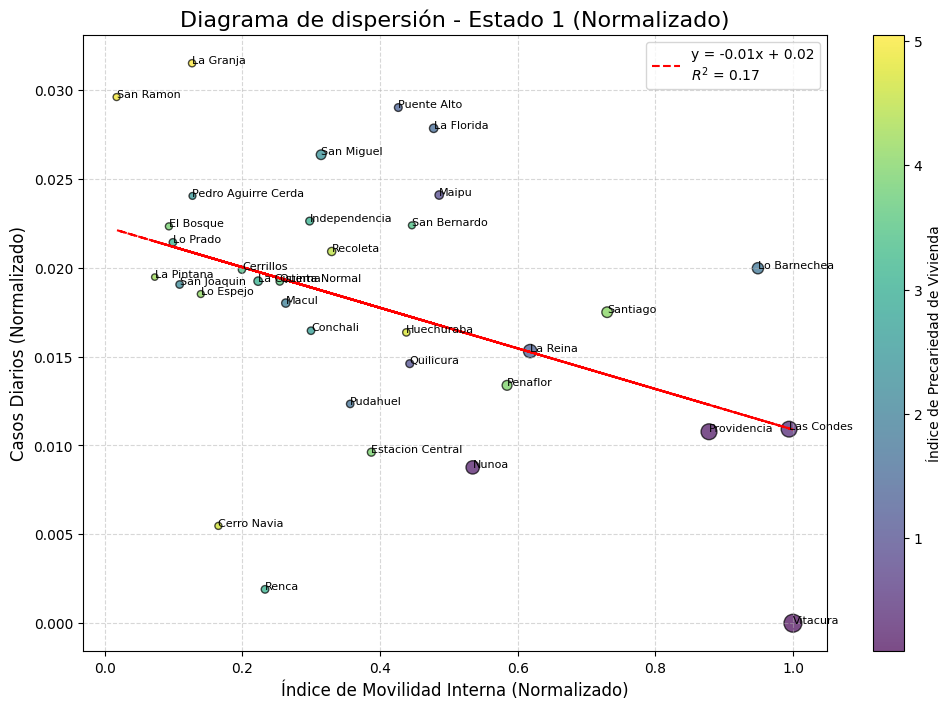

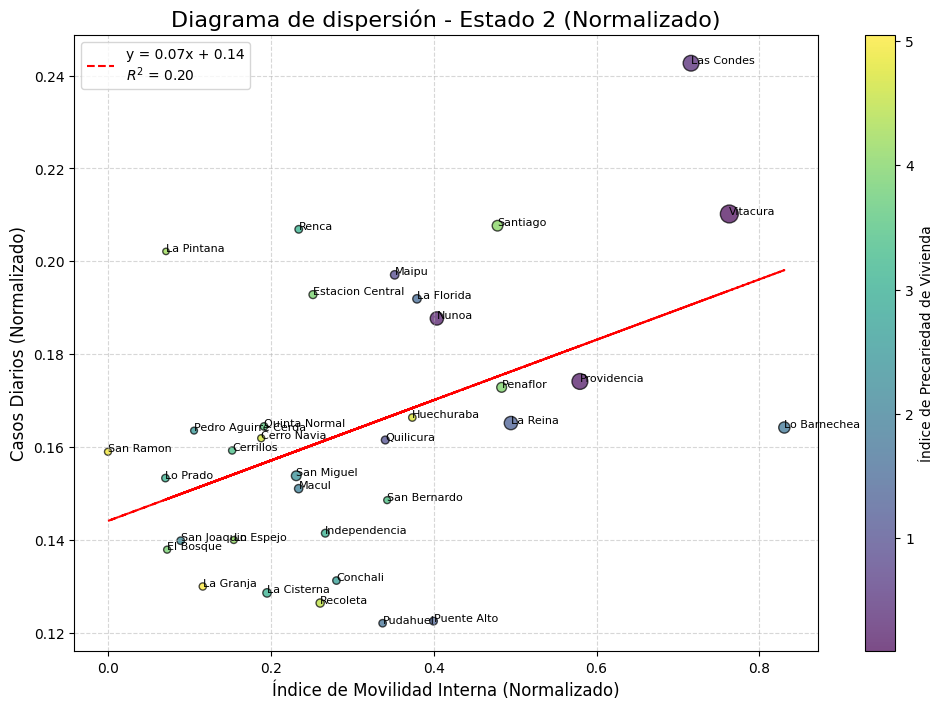

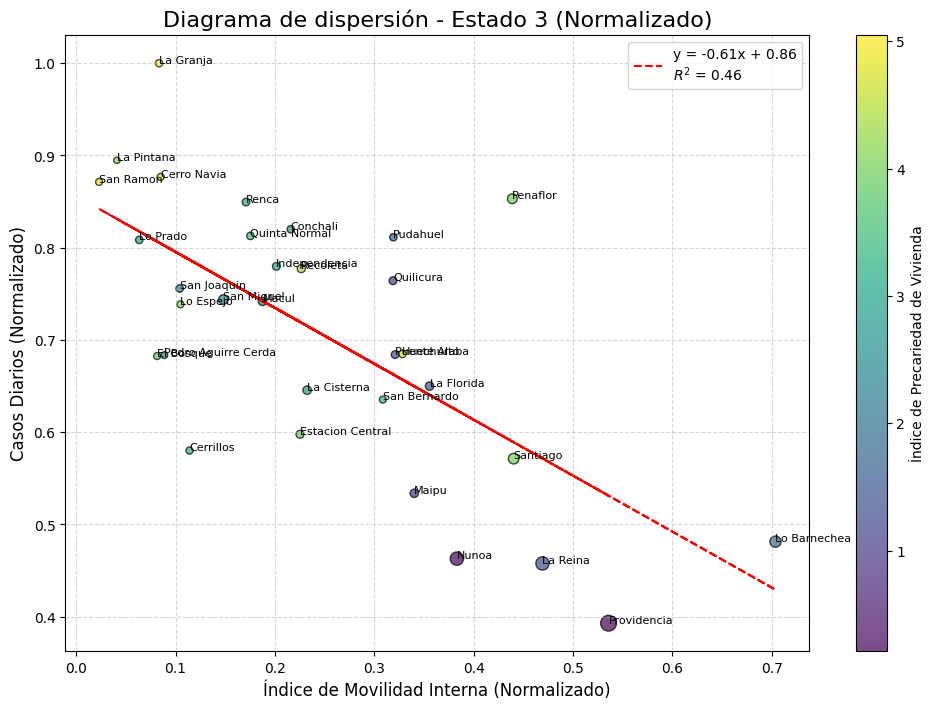

In [92]:
# Paso 3: Crear diagramas de dispersión para cada estado
for estado in promedios_por_comuna_estado['state'].unique():
    estado_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == estado]
    
    # Variables para el gráfico
    X = estado_data['IM_interno_normalizado'].values.reshape(-1, 1)
    Y = estado_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = estado_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = estado_data['indic_precariedad_vivienda'].values  # Color del punto
    
    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    
    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        estado_data['IM_interno_normalizado'], estado_data['Casos_Diarios_Brutos_normalizado'], 
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )
    
    # Agregar nombres de las comunas
    for i, row in estado_data.iterrows():
        plt.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)
    
    # Agregar la línea de regresión
    plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)
    
    # Configurar colorbar y etiquetas
    plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
    plt.title(f'Diagrama de dispersión - Estado {int(estado)} (Normalizado)', fontsize=16)
    plt.xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=12)
    plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
    plt.legend(fontsize=10)
    
    # Mostrar el gráfico
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

#### 1.1 Correlación de Casos Diarios Brutos con Movilidad Interna para Estado 1 "Contagios Severos"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

##### Interpretación del gráfico para el Estado 1 (contagios severos):

Relación entre movilidad interna y casos diarios (Línea de tendencia):
- La pendiente negativa de la recta indica que, en promedio, mayor movilidad interna está asociada con una disminución de los casos diarios.
- El coeficiente de determinación (R² = 0.61) sugiere que la movilidad interna explica un 61% de la variación en los casos diarios normalizados. Es una relación moderadamente fuerte.

Distribución de las comunas:
- Alta precariedad de vivienda: Comunas con altos valores de indic_precariedad_vivienda (color más claro) tienden a concentrarse en niveles más bajos de movilidad interna (extremo izquierdo del eje X) y valores más altos de casos diarios (arriba en el eje Y). Ejemplos: La Granja, La Pintana, Cerro Navia.
- Baja precariedad de vivienda: Comunas con índices de precariedad más bajos (color oscuro) y mayor ingreso per cápita (puntos grandes) tienen mayor movilidad interna (extremo derecho del eje X) y menor número de casos diarios. Ejemplos: Vitacura, Las Condes, Lo Barnechea.

Rol del ingreso per cápita:
- Comunas con mayor ingreso per cápita (puntos grandes) como Las Condes, Vitacura, tienen altos niveles de movilidad interna y baja precariedad de vivienda.
- Comunas con bajo ingreso per cápita (puntos pequeños) como Cerrillos, Lo Espejo, tienden a tener movilidad interna limitada y mayor número de casos diarios.

Casos diarios más altos:

- Comunas como La Granja, Cerro Navia tienen altos casos diarios normalizados. Estas comunas combinan movilidad interna limitada con alta precariedad de vivienda, lo que podría reflejar un entorno con menor capacidad para implementar medidas efectivas de control.

Casos diarios más bajos:

- Comunas como Las Condes, Vitacura muestran bajos casos diarios normalizados. Estas comunas tienen alta movilidad interna, baja precariedad de vivienda y altos ingresos per cápita.

#### 1.2 Correlación de Casos Diarios Brutos con Movilidad Interna para Estado 2 "Contagios Moderados"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

##### Interpretación del gráfico para el Estado 2 (contagios moderados):

Relación entre la movilidad interna y los casos diarios normalizados (línea de tendencia):
- Pendiente positiva (0.05): Existe una relación positiva débil entre el índice de movilidad interna (IM_interno) y los casos diarios normalizados. Esto sugiere que, en promedio, mayor movilidad interna tiende a estar asociada con un aumento en los casos diarios.
- R² = 0.15: El coeficiente de determinación (R²) indica que el modelo lineal explica solo el 15% de la varianza en los casos diarios normalizados. Esto significa que hay otros factores importantes, además de la movilidad interna, que influyen en los casos diarios para este estado.

Distribución por comunas (movilidad y casos diarios):
- Comunidades con alta movilidad interna y menor precariedad: Comunas como Vitacura, Las Condes, Lo Barnechea, y Providencia están hacia el extremo derecho del eje X (mayor IM_interno) y presentan valores relativamente altos en el índice de ingresos per cápita (reflejado en el tamaño de los puntos) y menores índices de precariedad de vivienda (color más púrpura).
Estas comunas muestran casos diarios moderados, indicando que, aunque tienen mayor movilidad interna, las condiciones socioeconómicas podrían estar amortiguando el impacto en los contagios.
- Comunidades con menor movilidad interna: Comunas como San Ramón, El Bosque, y Pedro Aguirre Cerda, ubicadas en el extremo izquierdo del eje X, muestran bajos niveles de movilidad interna (IM_interno). A pesar de esto, algunas tienen índices de precariedad más altos (color verdoso), lo que podría estar relacionado con mayores vulnerabilidades socioeconómicas.

Ingreso per cápita (tamaño del punto):
- Las comunas con mayor ingreso per cápita, como Vitacura, Las Condes, y Lo Barnechea, tienen los puntos más grandes. Estas comunas parecen estar menos afectadas en términos de casos diarios a pesar de su alta movilidad.
- En contraste, comunas como San Ramón, La Granja, y Cerro Navia tienen puntos más pequeños (menor ingreso per cápita), y su precariedad de vivienda tiende a ser mayor (color más verdoso).

Índice de precariedad de vivienda (color del punto):
- Las comunas con mayor índice de precariedad, como Cerro Navia y La Granja, presentan colores verdosos y se concentran en el rango de menor movilidad interna. Estas comunas pueden ser más vulnerables debido a sus condiciones socioeconómicas, lo que puede dificultar el control de los contagios. 

Observaciones adicionales:

A diferencia del Estado 1 (contagios severos), aquí la relación entre movilidad y casos no es tan marcada (menor pendiente). Esto sugiere que, en contextos de contagio moderado, otros factores como la densidad poblacional, las medidas sanitarias, y las características sociodemográficas podrían tener un peso mayor en los niveles de casos.

Comunas como San Joaquín, Conchalí, y Recoleta, que están cerca del centro del gráfico, parecen tener un equilibrio entre movilidad interna y casos diarios, con índices de precariedad intermedios.

#### 1.3 Correlación de Casos Diarios Brutos con Movilidad Interna para Estado 3 "Contagios Leves"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

##### Interpretación del gráfico para el Estado 3 (contagios leves):

Relación entre movilidad interna y casos diarios normalizados (línea de tendencia):
- Pendiente negativa (-0.01): Existe una relación ligeramente negativa entre el índice de movilidad interna y los casos diarios normalizados. Esto indica que, en promedio, mayor movilidad interna se asocia con una leve disminución en los casos diarios.
- R² = 0.17: El coeficiente de determinación (R²) muestra que solo el 17% de la varianza en los casos diarios normalizados se explica por la movilidad interna. Esto sugiere que, para las comunas en este estado de contagios leves, otros factores como medidas sanitarias, densidad poblacional, o características específicas de las comunas tienen un rol más relevante.

Distribución por comunas (movilidad y casos diarios):
- Comunidades con alta movilidad interna y menor precariedad: Comunas como Vitacura, Las Condes, Providencia, y Lo Barnechea están en el extremo derecho del eje X (alta movilidad interna). Estas comunas tienen un menor índice de precariedad de vivienda (color púrpura) y presentan los valores más bajos de casos diarios normalizados.
Esto podría reflejar una mejor capacidad para implementar medidas sanitarias o una menor densidad poblacional.
- Comunidades con baja movilidad interna: Comunas como San Ramón, Pedro Aguirre Cerda, y El Bosque tienen baja movilidad interna y colores más verdosos (mayor índice de precariedad de vivienda). Aunque están en el extremo izquierdo del gráfico, sus casos diarios son ligeramente más altos que las comunas con mayor movilidad y menor precariedad.

Ingreso per cápita (tamaño del punto):
- Comunas como Vitacura, Las Condes, y Lo Barnechea tienen puntos más grandes, reflejando un mayor ingreso per cápita. Estas comunas también tienen los valores más bajos de casos diarios y alta movilidad interna.
- Comunas con menores ingresos, como San Ramón, Renca, y La Pintana, tienen puntos más pequeños y se concentran hacia la parte superior del gráfico, indicando una mayor proporción de casos diarios normalizados.

Índice de precariedad de vivienda (color del punto):
- Comunas con mayor índice de precariedad, como San Ramón, La Granja, y Cerro Navia, tienen colores verdosos y presentan casos diarios moderadamente más altos.
- Las comunas con menor índice de precariedad, como Vitacura y Las Condes, tienen colores púrpuras y valores más bajos de casos diarios.

Observaciones adicionales:

La relación negativa (aunque leve) entre movilidad interna y casos diarios podría reflejar que las comunas con mayor movilidad en este estado tienen menos densidad poblacional y mejores condiciones socioeconómicas, lo que ayuda a mitigar los contagios.

Comunas con alta precariedad y bajo ingreso (como San Ramón, La Granja, y Pedro Aguirre Cerda) parecen tener un desafío mayor en mantener los contagios bajos, incluso con niveles más reducidos de movilidad.

### 2. Correlación de Casos Diarios Brutos con Movilidad Externa por cada Estado
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

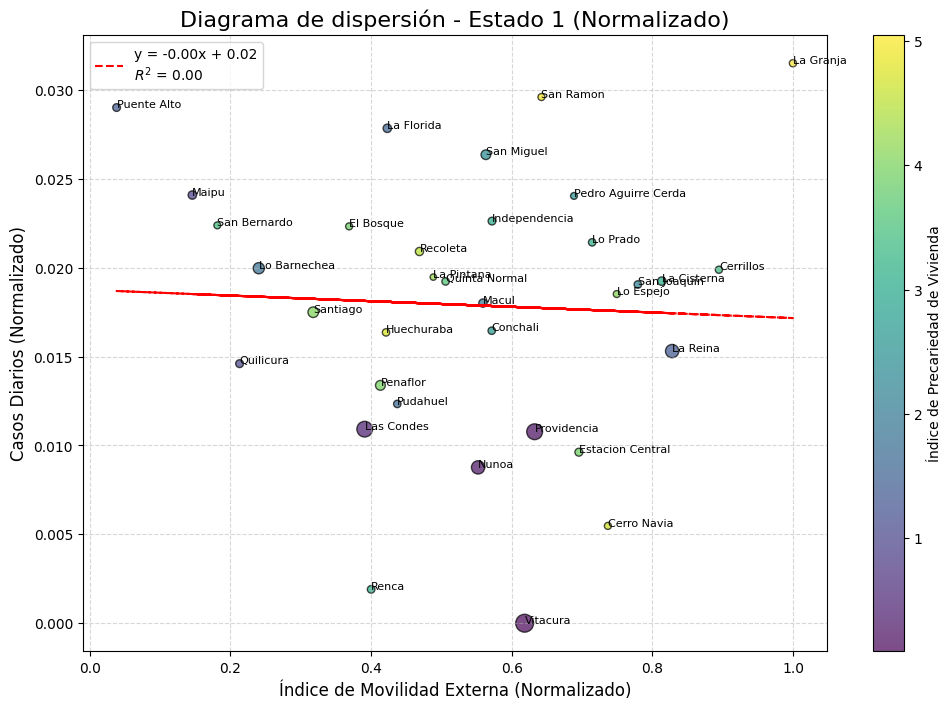

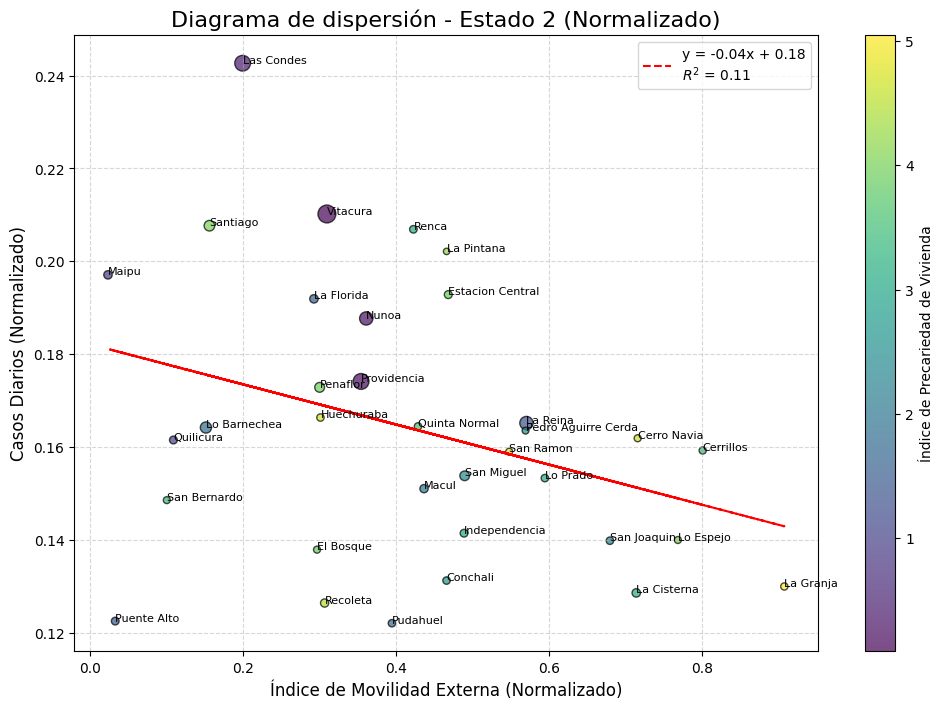

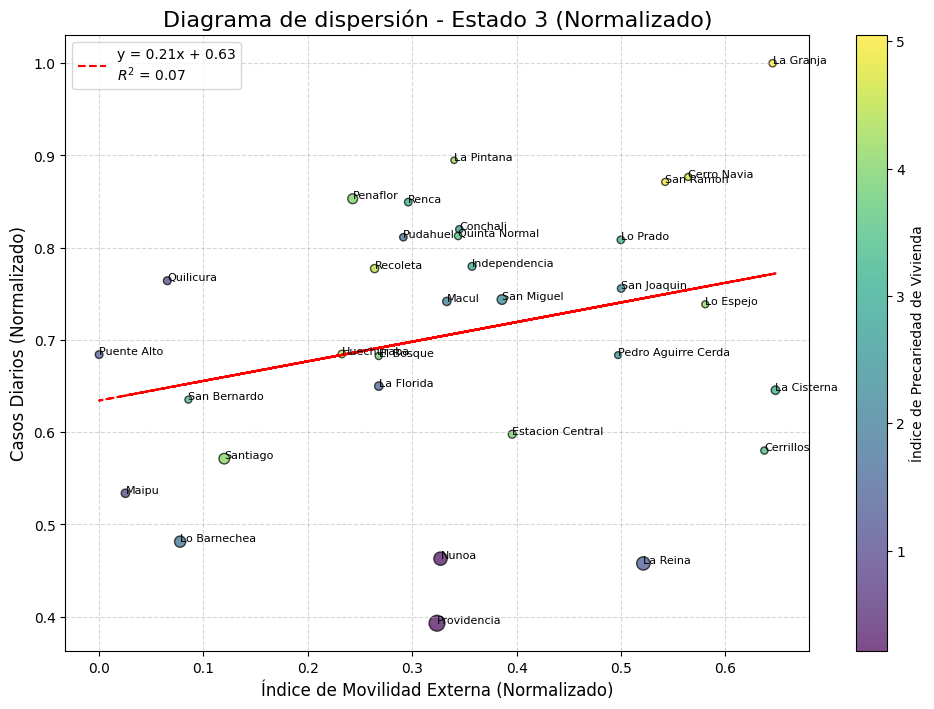

In [93]:
# Paso 3: Crear diagramas de dispersión para cada estado
for estado in promedios_por_comuna_estado['state'].unique():
    estado_data = promedios_por_comuna_estado[promedios_por_comuna_estado['state'] == estado]
    
    # Variables para el gráfico
    X = estado_data['IM_externo_normalizado'].values.reshape(-1, 1)
    Y = estado_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = estado_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = estado_data['indic_precariedad_vivienda'].values  # Color del punto
    
    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    
    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        estado_data['IM_externo_normalizado'], estado_data['Casos_Diarios_Brutos_normalizado'], 
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )
    
    # Agregar nombres de las comunas
    for i, row in estado_data.iterrows():
        plt.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)
    
    # Agregar la línea de regresión
    plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)
    
    # Configurar colorbar y etiquetas
    plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
    plt.title(f'Diagrama de dispersión - Estado {int(estado)} (Normalizado)', fontsize=16)
    plt.xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=12)
    plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
    plt.legend(fontsize=10)
    
    # Mostrar el gráfico
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

#### 2.1 Correlación de Casos Diarios Brutos con Movilidad Externa para Estado 1 "Contagios Severos"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

##### Interpretación del gráfico para el Estado 1 (contagios severos)

Relación entre movilidad externa y casos diarios:
- La relación entre la movilidad externa (eje X) y los casos diarios normalizados (eje Y) es positiva y débil, como se observa en la pendiente de la línea de regresión (y=0.29x+0.55) y el coeficiente de determinación (0.12).
- Esto indica que un incremento en la movilidad externa se asocia con un pequeño aumento en los casos diarios normalizados. Sin embargo, la baja varianza explicada (R2=0.12) sugiere que la movilidad externa no es un factor determinante para los casos diarios en este estado.

Índice de precariedad de vivienda (color):
- Comunas con mayores índices de precariedad de vivienda (colores más hacia el amarillo) tienden a estar más dispersas en la gráfica, indicando que estos niveles no se concentran exclusivamente en comunas con alta o baja movilidad externa.
- Algunas comunas como La Granja, San Ramón, y Cerro Navia presentan mayor precariedad y se ubican hacia niveles medios o altos de movilidad externa.

Ingreso per cápita (tamaño de las burbujas):
- Comunas con mayor ingreso per cápita (inc_pc_comuna, burbujas más grandes) como Vitacura, Las Condes, y Providencia presentan tanto baja movilidad externa como baja tasa de casos diarios normalizados.
- En contraste, comunas de menores ingresos (burbujas más pequeñas) como La Granja, San Ramón, y Cerro Navia están asociadas con valores más altos tanto en movilidad externa como en casos diarios.

Observaciones específicas:

- Vitacura y Las Condes destacan como comunas con ingresos altos, baja precariedad de vivienda, y baja movilidad externa, mostrando un comportamiento diferenciado del resto.
- La Granja, una comuna con mayor precariedad, se encuentra hacia la esquina superior izquierda, lo que sugiere un alto nivel de casos normalizados en comparación con su nivel de movilidad externa.

Conclusión general para el estado 1:

En este estado de contagios severos, aunque hay una ligera relación positiva entre la movilidad externa y los casos diarios, la precariedad de vivienda y el ingreso per cápita parecen desempeñar roles más significativos al determinar las diferencias entre comunas. Esto se refleja en la dispersión de las burbujas en términos de tamaño (ingreso) y color (precariedad).

#### 2.2 Correlación de Casos Diarios Brutos con Movilidad Externa para Estado 2 "Contagios Moderados"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

##### Interpretación del gráfico para el Estado 2 (contagios moderados)

Relación entre movilidad externa y casos diarios:
- La relación entre la movilidad externa (eje X) y los casos diarios normalizados (eje Y) es ligeramente negativa y muy débil.
- Esto indica que, en promedio, un aumento en la movilidad externa está asociado con una disminución muy leve en los casos diarios normalizados. Sin embargo, la relación es casi inexistente debido a la baja varianza explicada.

Índice de precariedad de vivienda (color):
- Las comunas con mayores índices de precariedad de vivienda (colores más hacia el amarillo) como La Granja, Renca, y Cerro Navia, tienden a ubicarse en niveles medios o bajos de movilidad externa.
- Comunas con menor precariedad (colores más hacia el morado), como Vitacura, Providencia, y Las Condes, tienen una movilidad externa más alta en promedio.

Ingreso per cápita (tamaño de las burbujas):
- Comunas con mayor ingreso per cápita (inc_pc_comuna, burbujas más grandes) como Vitacura, Las Condes, y Providencia presentan alta movilidad externa y niveles moderados de casos diarios normalizados.
- En contraste, comunas de menores ingresos (burbujas más pequeñas) como La Granja, San Ramón, y Cerro Navia tienen niveles moderados o bajos de movilidad externa, pero una mayor dispersión en casos diarios.

Observaciones específicas:
- Vitacura tiene la mayor burbuja (más alto ingreso per cápita), aunque presenta una baja tasa de precariedad de vivienda y no es la comuna con mayor movilidad externa.
- La Granja se ubica en el cuadrante inferior izquierdo, lo que refleja un índice alto de precariedad de vivienda y baja movilidad externa.

Conclusión general para el estado 2:

En este estado de contagios moderados, la movilidad externa no parece tener un impacto directo significativo sobre los casos diarios (relación débil).
La precariedad de vivienda y el ingreso per cápita muestran patrones más claros, donde comunas con mayor ingreso y menor precariedad tienden a tener mayores niveles de movilidad externa. Por el contrario, comunas con menor ingreso y mayor precariedad tienden a mostrar baja movilidad externa.

#### 2.3 Correlación de Casos Diarios Brutos con Movilidad Externa para Estado 3 "Contagios Leves"
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

##### Interpretación del gráfico para el Estado 3 (contagios leves)

Relación global entre movilidad externa y casos diarios:
- La relación entre la movilidad externa y los casos diarios en el Estado 3 es prácticamente nula, indicando que no existe una correlación entre ambas variables.
- La línea de tendencia tiene una pendiente casi horizontal, lo que sugiere que la movilidad externa no tiene un impacto directo en los casos diarios en este estado.

Distribución según condiciones socioeconómicas:
- Comunas con bajo índice de precariedad de vivienda y alto ingreso per cápita (burbujas grandes y colores morados) como Vitacura, Providencia, y Las Condes, se agrupan en niveles moderados o altos de movilidad externa, con tasas bajas de casos diarios.
- Comunas más vulnerables, como La Granja, San Ramón, y Lo Espejo, tienen índices altos de precariedad (amarillos), pero no muestran un patrón claro con respecto a la movilidad externa ni a los casos diarios.

Patrones destacados:
- Vitacura y Providencia tienen una alta movilidad externa, bajos casos diarios, y las menores tasas de precariedad de vivienda.
- La Granja, con alta precariedad de vivienda, aparece aislada con una tasa relativamente alta de casos diarios, a pesar de su baja movilidad externa.
- Comunas como Renca y Cerro Navia, con condiciones de alta vulnerabilidad, muestran tanto baja movilidad externa como bajas tasas de casos diarios en este estado.

Conclusiones:

En el Estado 3 (contagios leves), la movilidad externa no juega un rol importante en los casos diarios.
Las características socioeconómicas como el ingreso per cápita y la precariedad de vivienda parecen influir más en la dispersión de los casos, aunque el patrón no es consistente para todas las comunas.
Este estado sugiere una estabilización en las tasas de casos diarios, donde otros factores, como las medidas de control o dinámicas comunitarias, podrían ser más relevantes que la movilidad.

## División de la data de la serie de Viterbi en períodos antes y después del estado 3 (Severo):

In [94]:
# Crear una función para asignar períodos
def assign_period(row):
    if row['dias'] <= 75:
        if row['state'] == 1:
            return 'Estado 1 - Previo a Estado 3'
        elif row['state'] == 2:
            return 'Estado 2 - Previo a Estado 3'
    else:
        if row['state'] == 1:
            return 'Estado 1 - Posterior a Estado 3'
        elif row['state'] == 2:
            return 'Estado 2 - Posterior a Estado 3'
    return None  # Para otros estados

# Aplicar la función al DataFrame
viterbi_merged['period'] = viterbi_merged.apply(assign_period, axis=1)

### 1. Correlación de Casos Diarios Brutos con Movilidad Interna por cada Estado

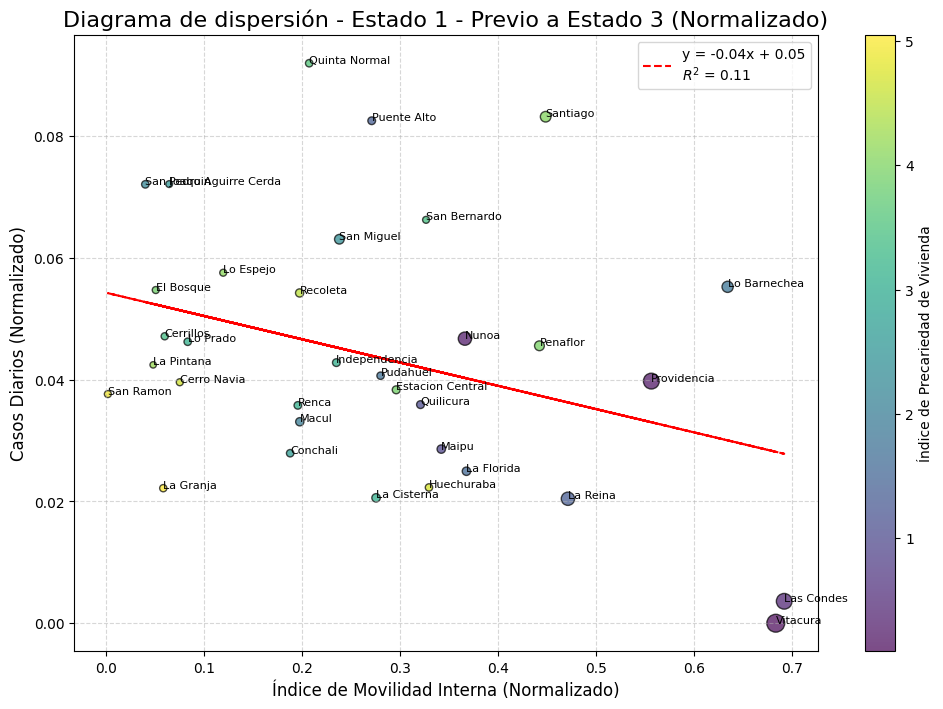

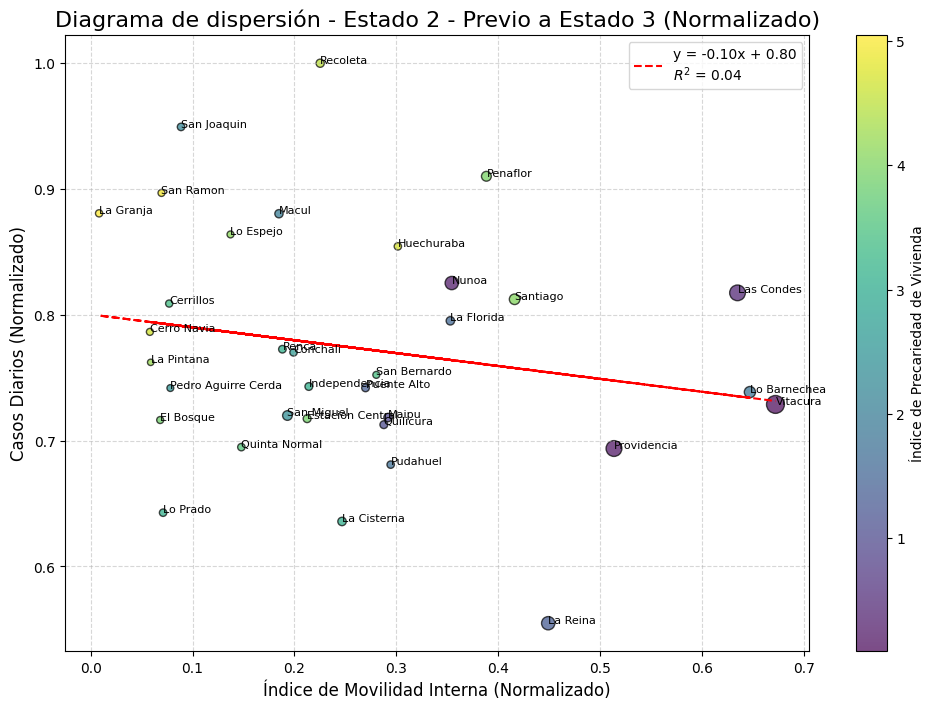

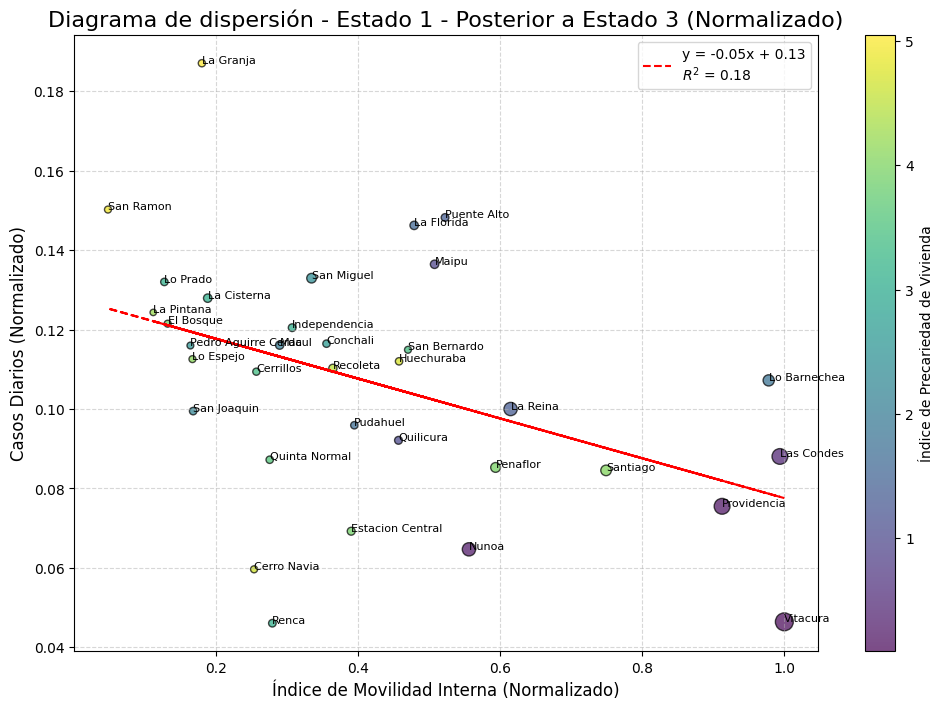

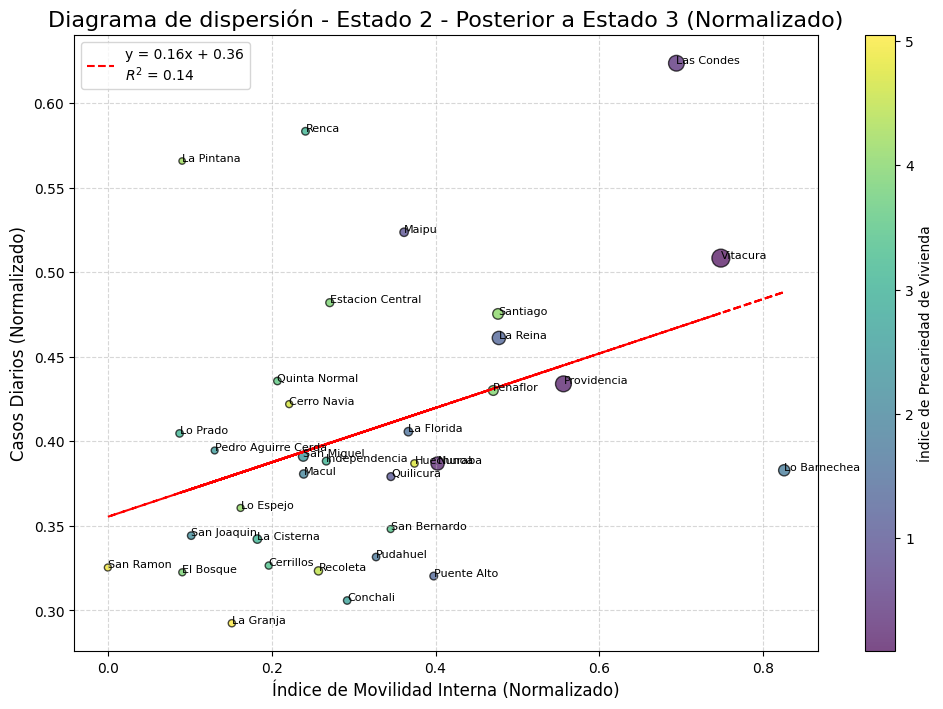

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Filtrar solo los estados y períodos relevantes
periodos_relevantes = [
    "Estado 1 - Previo a Estado 3",
    "Estado 2 - Previo a Estado 3",
    "Estado 1 - Posterior a Estado 3",
    "Estado 2 - Posterior a Estado 3"
]
filtered_data = viterbi_merged[viterbi_merged['period'].isin(periodos_relevantes)]

# Calcular promedios por comuna dentro de cada estado y período relevante
promedios_por_comuna_estado = (
    filtered_data.groupby(['period', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'inc_pc_comuna': 'mean',
        'indic_precariedad_vivienda': 'mean'
    }).reset_index()
)

# Normalizar las variables
scaler = MinMaxScaler()
promedios_por_comuna_estado['IM_interno_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_interno']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos']])

# Crear diagramas de dispersión para cada período relevante
for periodo in periodos_relevantes:
    periodo_data = promedios_por_comuna_estado[promedios_por_comuna_estado['period'] == periodo]
    
    # Variables para el gráfico
    X = periodo_data['IM_interno_normalizado'].values.reshape(-1, 1)
    Y = periodo_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = periodo_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = periodo_data['indic_precariedad_vivienda'].values  # Color del punto
    
    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    
    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        periodo_data['IM_interno_normalizado'], periodo_data['Casos_Diarios_Brutos_normalizado'], 
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )
    
    # Agregar nombres de las comunas
    for i, row in periodo_data.iterrows():
        plt.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)
    
    # Agregar la línea de regresión
    plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)
    
    # Configurar colorbar y etiquetas
    plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
    plt.title(f'Diagrama de dispersión - {periodo} (Normalizado)', fontsize=16)
    plt.xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=12)
    plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
    plt.legend(fontsize=10)
    
    # Mostrar el gráfico
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

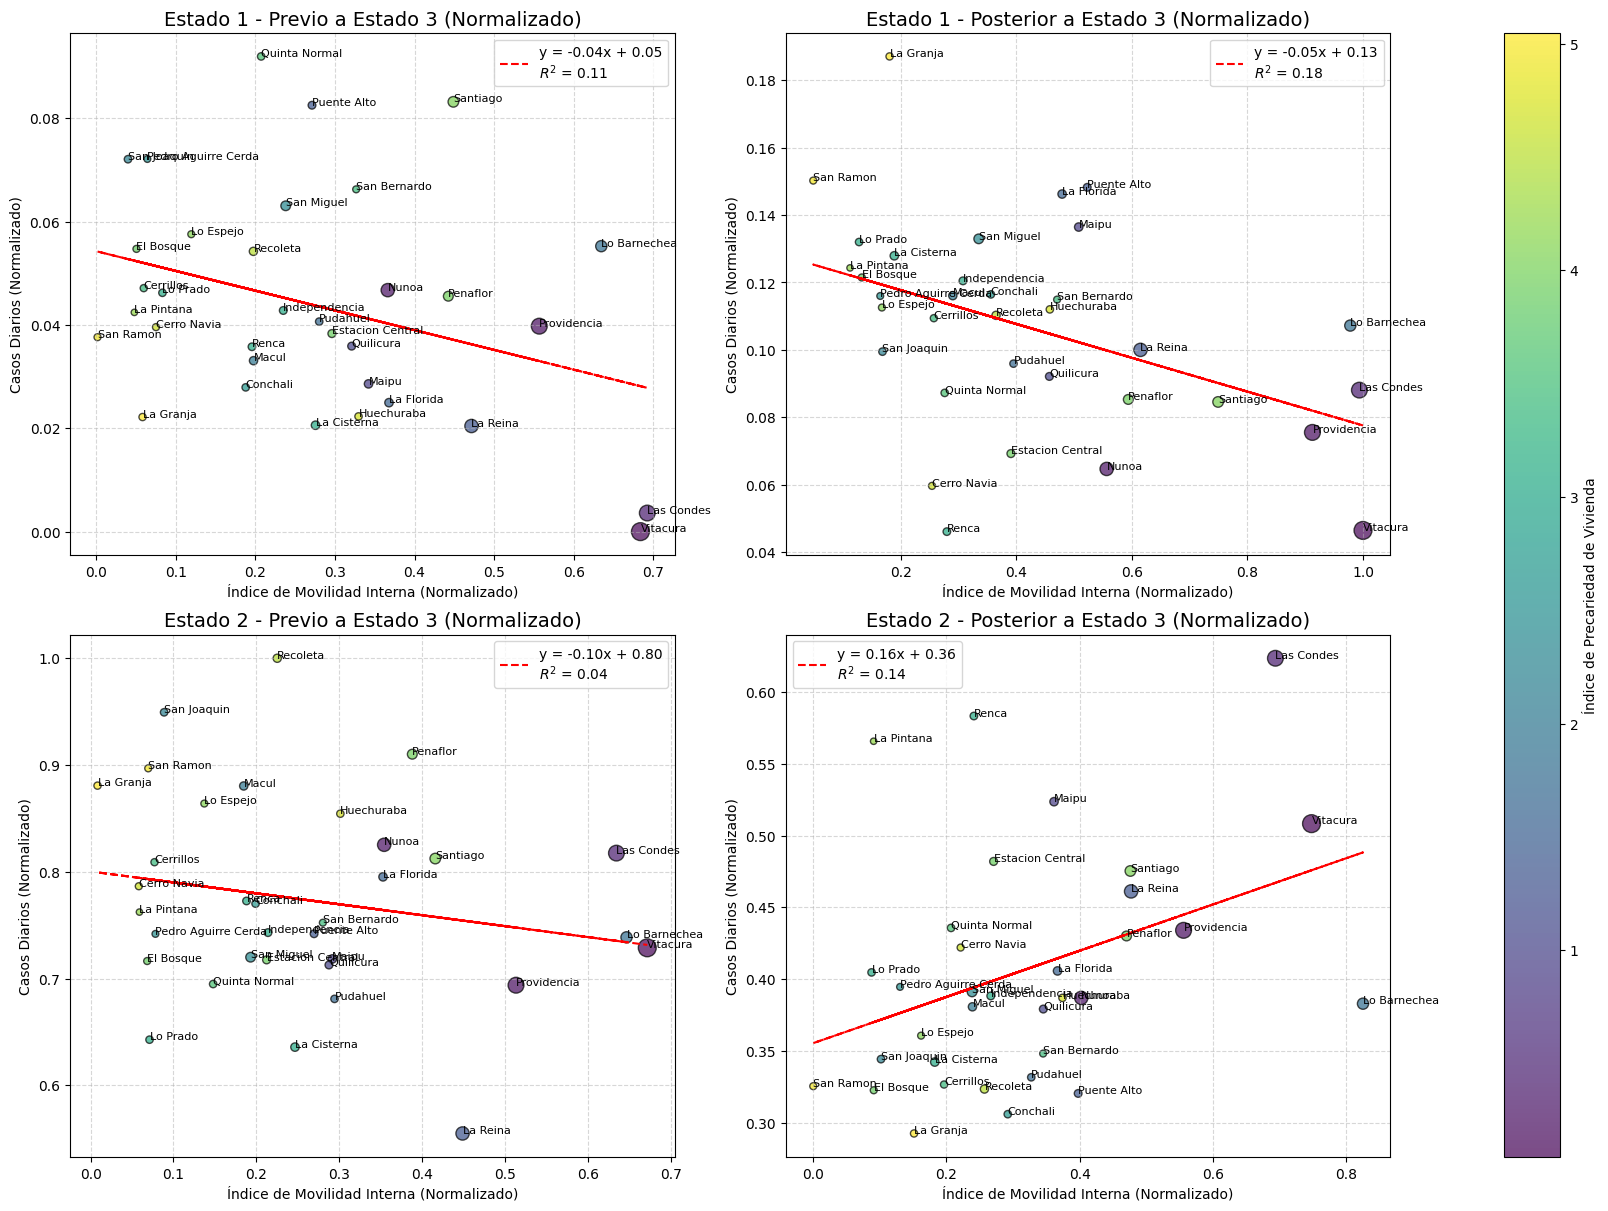

In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Filtrar solo los estados y períodos relevantes
periodos_relevantes = [
    "Estado 1 - Previo a Estado 3",
    "Estado 1 - Posterior a Estado 3",
    "Estado 2 - Previo a Estado 3",
    "Estado 2 - Posterior a Estado 3"
]
filtered_data = viterbi_merged[viterbi_merged['period'].isin(periodos_relevantes)]

# Calcular promedios por comuna dentro de cada estado y período relevante
promedios_por_comuna_estado = (
    filtered_data.groupby(['period', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'inc_pc_comuna': 'mean',
        'indic_precariedad_vivienda': 'mean'
    }).reset_index()
)

# Normalizar las variables
scaler = MinMaxScaler()
promedios_por_comuna_estado['IM_interno_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_interno']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos']])

# Crear subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar el acceso

# Mapeo de períodos a índices de subplots
period_to_axis = {
    "Estado 1 - Previo a Estado 3": 0,
    "Estado 1 - Posterior a Estado 3": 1,
    "Estado 2 - Previo a Estado 3": 2,
    "Estado 2 - Posterior a Estado 3": 3
}

# Generar cada gráfico
for periodo, idx in period_to_axis.items():
    periodo_data = promedios_por_comuna_estado[promedios_por_comuna_estado['period'] == periodo]
    
    # Variables para el gráfico
    X = periodo_data['IM_interno_normalizado'].values.reshape(-1, 1)
    Y = periodo_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = periodo_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = periodo_data['indic_precariedad_vivienda'].values  # Color del punto
    
    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    
    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"
    
    # Crear el gráfico en el subplot correspondiente
    ax = axes[idx]
    scatter = ax.scatter(
        periodo_data['IM_interno_normalizado'], periodo_data['Casos_Diarios_Brutos_normalizado'], 
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )
    
    # Agregar nombres de las comunas
    for i, row in periodo_data.iterrows():
        ax.text(row['IM_interno_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)
    
    # Agregar la línea de regresión
    ax.plot(X, Y_pred, color='red', linestyle='--', label=equation)
    
    # Configurar etiquetas y título
    ax.set_title(f'{periodo} (Normalizado)', fontsize=14)
    ax.set_xlabel('Índice de Movilidad Interna (Normalizado)', fontsize=10)
    ax.set_ylabel('Casos Diarios (Normalizado)', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.5, linestyle='--')

# Añadir una barra de color común para los subplots
fig.colorbar(scatter, ax=axes, orientation='vertical', label='Índice de Precariedad de Vivienda')

# Mostrar todos los gráficos en el mismo layout
plt.show()

### 2. Correlación de Casos Diarios Brutos con Movilidad Externa por cada Estado
- *Color de los puntos según el índice de precariedad de la vivienda.*
- *Tamaño de los puntos según índice per cápita comuna.*
- *Etiquetado por comuna.*

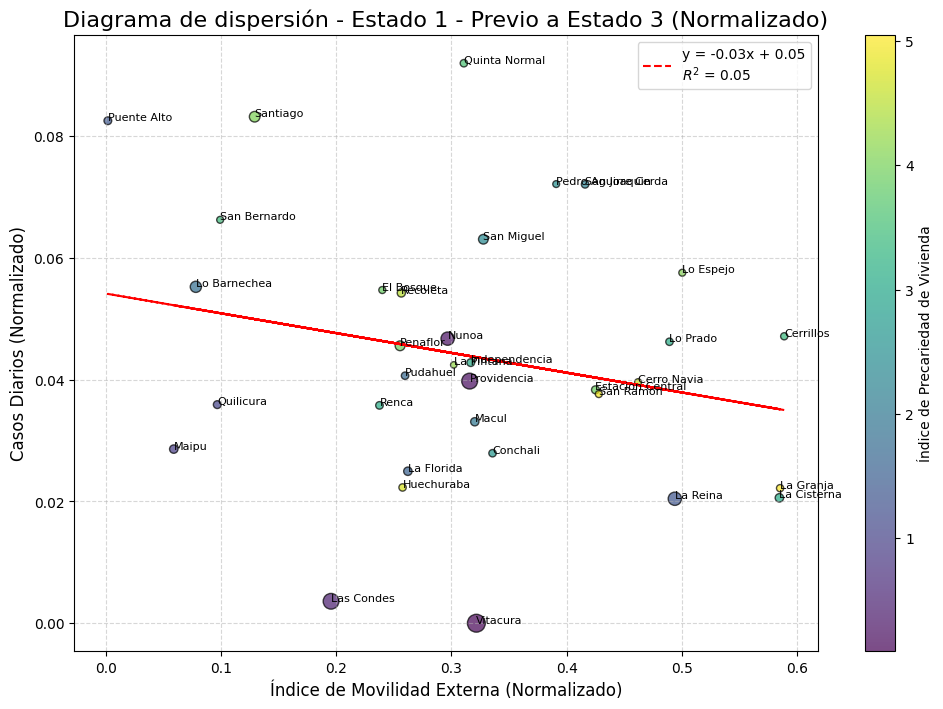

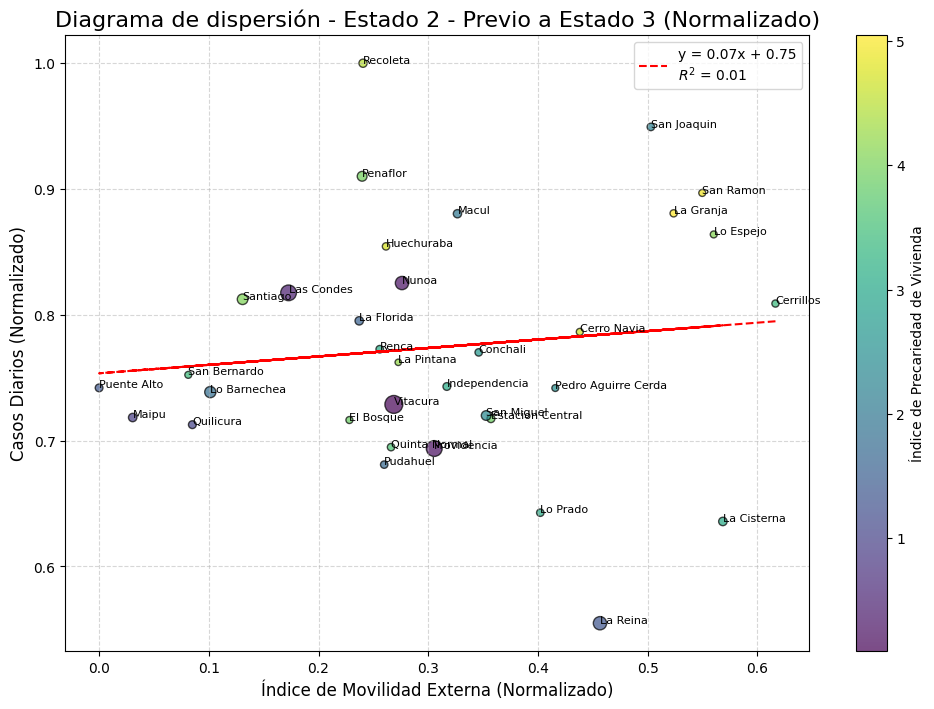

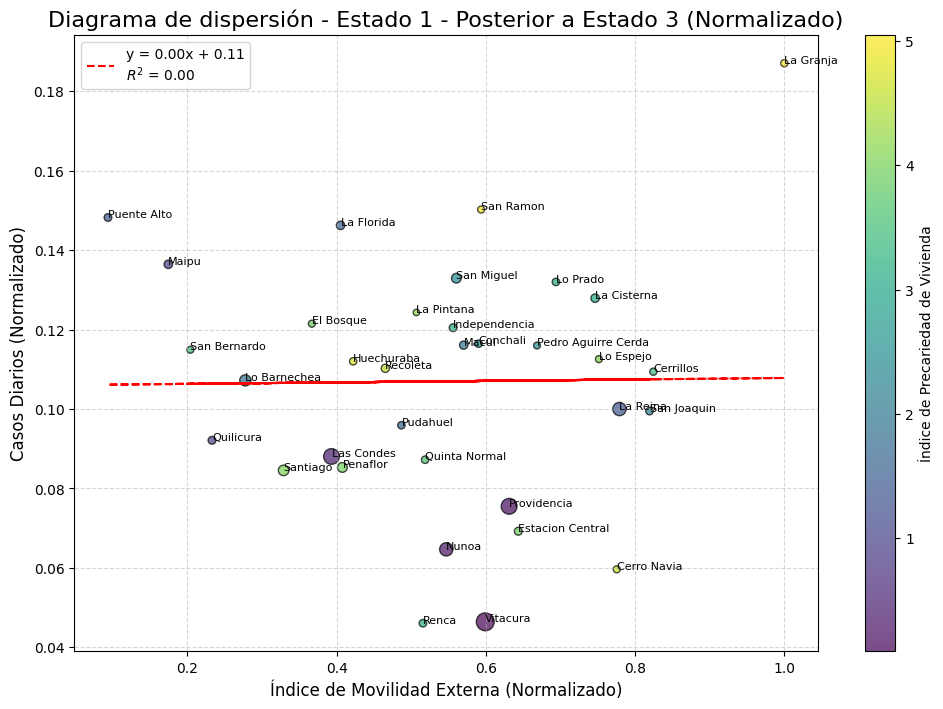

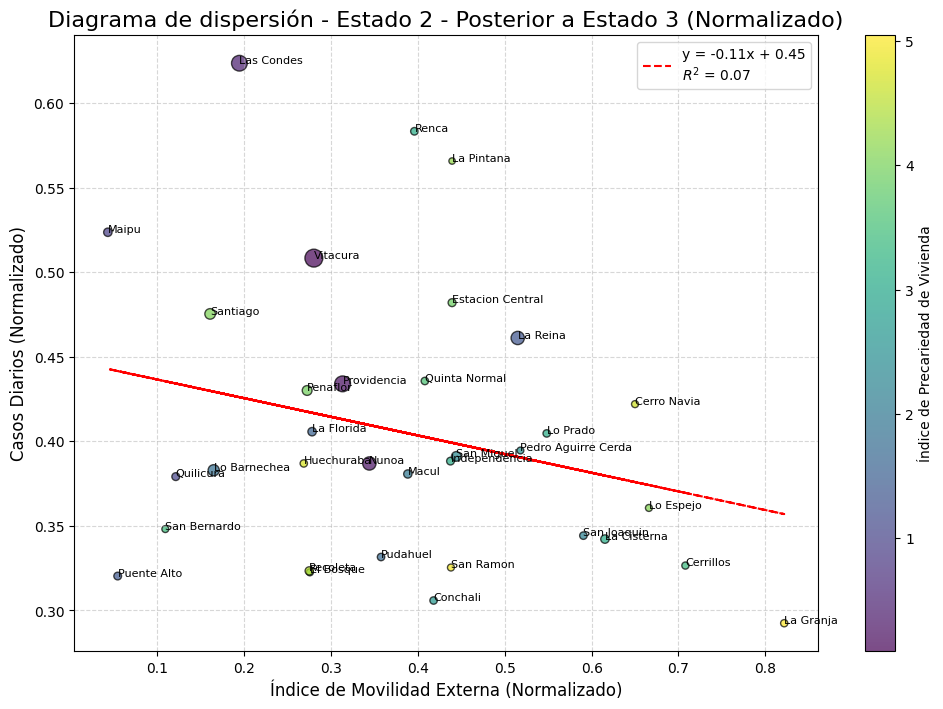

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Filtrar solo los estados y períodos relevantes
periodos_relevantes = [
    "Estado 1 - Previo a Estado 3",
    "Estado 2 - Previo a Estado 3",
    "Estado 1 - Posterior a Estado 3",
    "Estado 2 - Posterior a Estado 3"
]
filtered_data = viterbi_merged[viterbi_merged['period'].isin(periodos_relevantes)]

# Calcular promedios por comuna dentro de cada estado y período relevante
promedios_por_comuna_estado = (
    filtered_data.groupby(['period', 'Comuna']).agg({
        'IM_interno': 'mean',
        'IM_externo': 'mean',
        'Casos_Diarios_Brutos': 'mean',
        'inc_pc_comuna': 'mean',
        'indic_precariedad_vivienda': 'mean'
    }).reset_index()
)

# Normalizar las variables
scaler = MinMaxScaler()
promedios_por_comuna_estado['IM_externo_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_externo']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos']])

# Crear diagramas de dispersión para cada período relevante
for periodo in periodos_relevantes:
    periodo_data = promedios_por_comuna_estado[promedios_por_comuna_estado['period'] == periodo]
    
    # Variables para el gráfico
    X = periodo_data['IM_externo_normalizado'].values.reshape(-1, 1)
    Y = periodo_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = periodo_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = periodo_data['indic_precariedad_vivienda'].values  # Color del punto
    
    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    
    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        periodo_data['IM_externo_normalizado'], periodo_data['Casos_Diarios_Brutos_normalizado'], 
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )
    
    # Agregar nombres de las comunas
    for i, row in periodo_data.iterrows():
        plt.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)
    
    # Agregar la línea de regresión
    plt.plot(X, Y_pred, color='red', linestyle='--', label=equation)
    
    # Configurar colorbar y etiquetas
    plt.colorbar(scatter, label='Índice de Precariedad de Vivienda')
    plt.title(f'Diagrama de dispersión - {periodo} (Normalizado)', fontsize=16)
    plt.xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=12)
    plt.ylabel('Casos Diarios (Normalizado)', fontsize=12)
    plt.legend(fontsize=10)
    
    # Mostrar el gráfico
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

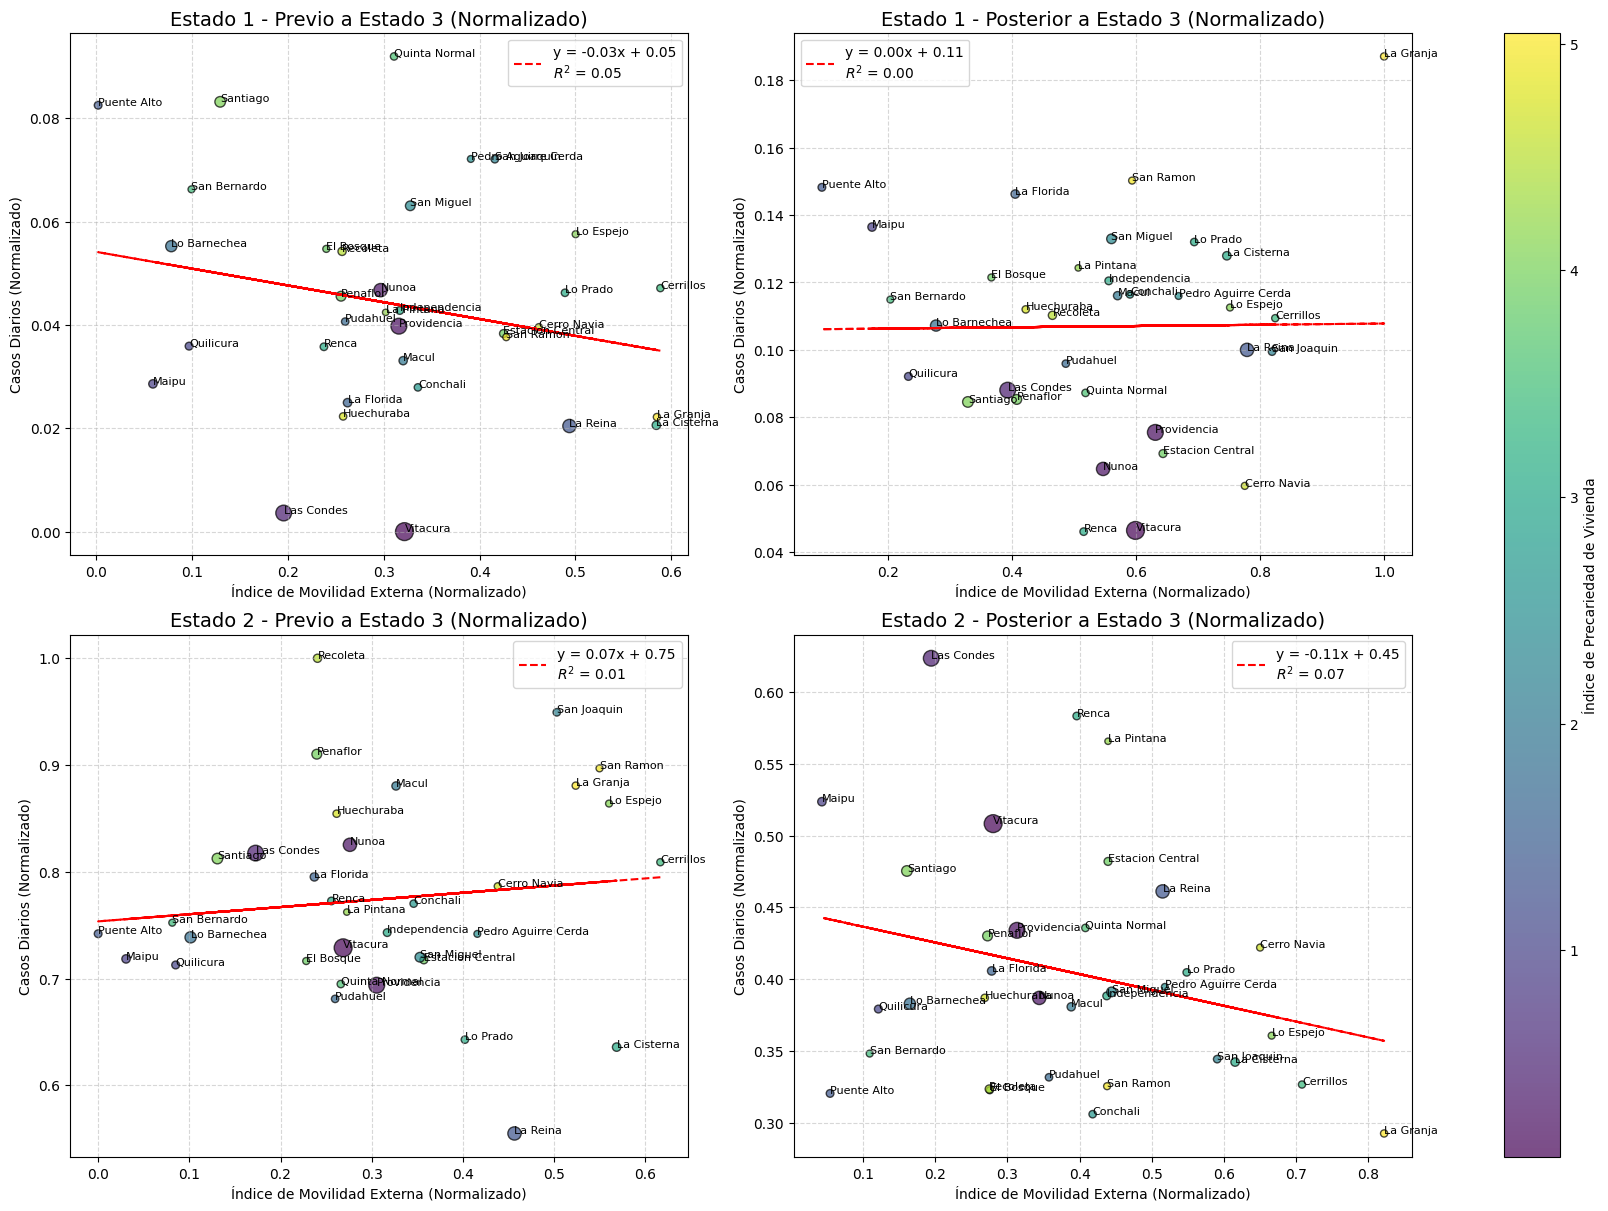

In [98]:
# Normalizar las variables
promedios_por_comuna_estado['IM_externo_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['IM_externo']])
promedios_por_comuna_estado['Casos_Diarios_Brutos_normalizado'] = scaler.fit_transform(promedios_por_comuna_estado[['Casos_Diarios_Brutos']])

# Crear subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar el acceso

# Mapeo de períodos a índices de subplots
period_to_axis = {
    "Estado 1 - Previo a Estado 3": 0,
    "Estado 1 - Posterior a Estado 3": 1,
    "Estado 2 - Previo a Estado 3": 2,
    "Estado 2 - Posterior a Estado 3": 3
}

# Generar cada gráfico
for periodo, idx in period_to_axis.items():
    periodo_data = promedios_por_comuna_estado[promedios_por_comuna_estado['period'] == periodo]
    
    # Variables para el gráfico
    X = periodo_data['IM_externo_normalizado'].values.reshape(-1, 1)
    Y = periodo_data['Casos_Diarios_Brutos_normalizado'].values
    sizes = periodo_data['inc_pc_comuna'].values / 10000  # Tamaño del punto
    colors = periodo_data['indic_precariedad_vivienda'].values  # Color del punto
    
    # Ajustar una línea de regresión lineal
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    
    # Calcular R^2
    r_squared = model.score(X, Y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}"
    
    # Crear el gráfico en el subplot correspondiente
    ax = axes[idx]
    scatter = ax.scatter(
        periodo_data['IM_externo_normalizado'], periodo_data['Casos_Diarios_Brutos_normalizado'], 
        s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k'
    )
    
    # Agregar nombres de las comunas
    for i, row in periodo_data.iterrows():
        ax.text(row['IM_externo_normalizado'], row['Casos_Diarios_Brutos_normalizado'], row['Comuna'], fontsize=8)
    
    # Agregar la línea de regresión
    ax.plot(X, Y_pred, color='red', linestyle='--', label=equation)
    
    # Configurar etiquetas y título
    ax.set_title(f'{periodo} (Normalizado)', fontsize=14)
    ax.set_xlabel('Índice de Movilidad Externa (Normalizado)', fontsize=10)
    ax.set_ylabel('Casos Diarios (Normalizado)', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.5, linestyle='--')

# Añadir una barra de color común para los subplots
fig.colorbar(scatter, ax=axes, orientation='vertical', label='Índice de Precariedad de Vivienda')

# Mostrar todos los gráficos en el mismo layout
plt.show()

### Correlación entre Covariables y Probabilidades de Transición por cada Transición

In [99]:
# Reestructurar transition_matrix para obtener probabilidades de transición por muestra
n_samples, n_states, _ = transition_matrix.shape

# Remapear índices de los estados
transitions_list = []
for t in range(n_samples):
    for i in range(n_states):
        for j in range(n_states):
            transitions_list.append({
                "sample": t,
                f"Trans_{i+1}->{j+1}": transition_matrix[t, i, j]  # Remapear 0->1, 1->2, 2->3
            })

# Convertir a DataFrame
transitions_df = pd.DataFrame(transitions_list).groupby("sample").mean().reset_index(drop=True)

print("Transiciones estructuradas:")
print(transitions_df.head())


Transiciones estructuradas:
   Trans_1->1  Trans_1->2    Trans_1->3  Trans_2->1  Trans_2->2    Trans_2->3  \
0    0.994180    0.000775  4.056043e-25    0.005820    0.998064  1.158392e-07   
1    0.994231    0.001285  1.580162e-23    0.005769    0.998027  5.421520e-07   
2    0.993255    0.000681  6.889444e-26    0.006745    0.997807  7.804615e-08   
3    0.992122    0.000231  1.250996e-29    0.007878    0.994554  2.883957e-09   
4    0.987758    0.002742  4.556638e-23    0.012242    0.996636  5.448050e-06   

     Trans_3->1  Trans_3->2  Trans_3->3  
0  1.325346e-09    0.001161    1.000000  
1  1.016073e-09    0.000688    0.999999  
2  1.490560e-09    0.001511    1.000000  
3  2.755099e-09    0.005215    1.000000  
4  8.855350e-10    0.000622    0.999995  


In [100]:
# Seleccionar covariables relevantes
covariates_df = viterbi_merged[[
    'IM_interno', 'IM_externo', 
    'inc_pc_comuna', 'Personas_hogar_promedio', 'inmigrantes', 
    'total_hog_hacinados', 'indic_precariedad_vivienda', 
    'por_educ_sup', 'IPS_2020'
]].reset_index(drop=True)

# Combinar con transiciones
analysis_df = pd.concat([covariates_df, transitions_df], axis=1)
print("Datos combinados para análisis:")
print(analysis_df.head())


Datos combinados para análisis:
   IM_interno  IM_externo  inc_pc_comuna  Personas_hogar_promedio  \
0    1.970381    7.804008      267197.56                 3.145581   
1    1.845790    7.471452      267197.56                 3.145581   
2    1.678598    6.891732      267197.56                 3.145581   
3    1.736766    8.317872      267197.56                 3.145581   
4    1.331296    6.378498      267197.56                 3.145581   

   inmigrantes  total_hog_hacinados  indic_precariedad_vivienda  por_educ_sup  \
0       3606.0              68120.0                    3.395792          11.9   
1       3606.0              68120.0                    3.395792          11.9   
2       3606.0              68120.0                    3.395792          11.9   
3       3606.0              68120.0                    3.395792          11.9   
4       3606.0              68120.0                    3.395792          11.9   

   IPS_2020  Trans_1->1  Trans_1->2    Trans_1->3  Trans_2->1  Tra

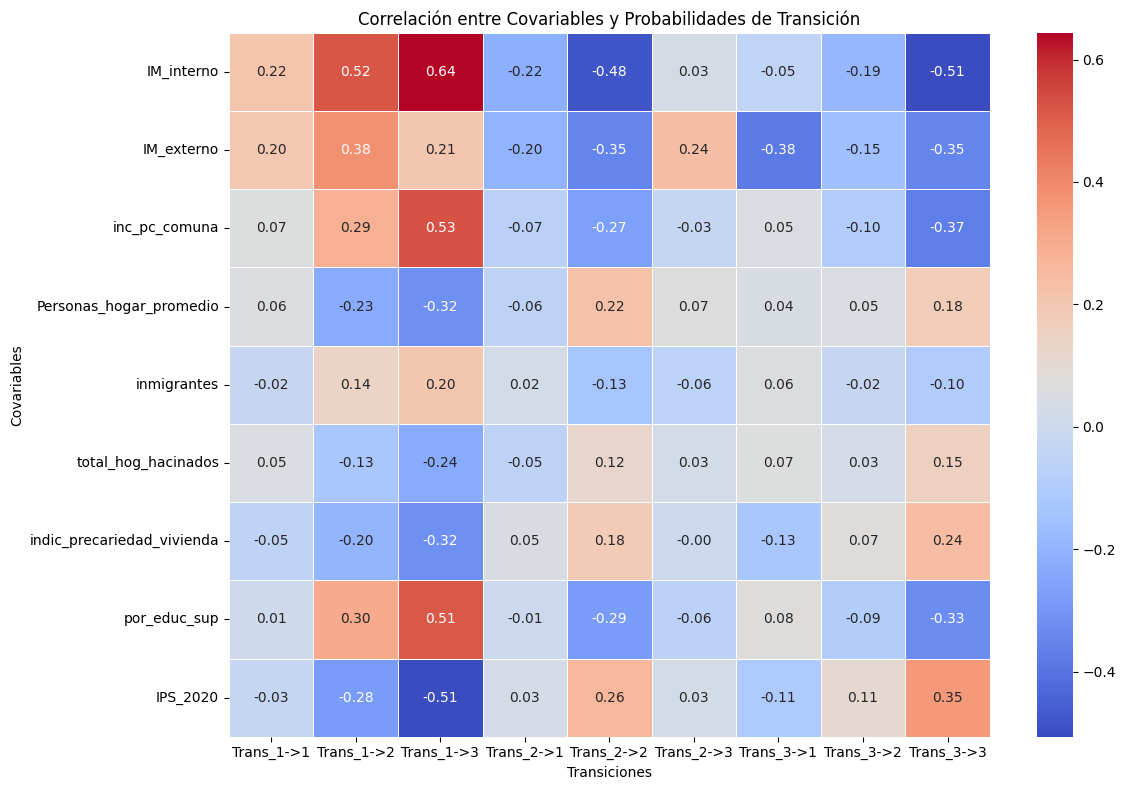

In [101]:
# Calcular la matriz de correlación
correlaciones = analysis_df.corr().loc[
    covariates_df.columns, 
    transitions_df.columns
]

# Visualizar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre Covariables y Probabilidades de Transición")
plt.xlabel("Transiciones")
plt.ylabel("Covariables")
plt.tight_layout()
plt.show()


### Preparación Formato Long

In [102]:
# Crear lista para almacenar las transiciones
transiciones = []

# Recorrer todas las matrices de transición generadas
for idx, matriz in enumerate(transition_matrix):
    for from_state in range(len(matriz)):
        for to_state in range(len(matriz[from_state])):
            transiciones.append({
                'Día_original': base_final.iloc[idx]['dias'],  # Día original en la base final
                'Día_correlativo': idx,  # Índice o día correlativo generado
                'Comuna': base_final.iloc[idx]['Comuna'],  # Comuna asociada al día
                'from_state': from_state + 1,  # Estado origen (ajustar a 1, 2, 3)
                'to_state': to_state + 1,     # Estado destino (ajustar a 1, 2, 3)
                'probability': matriz[from_state][to_state]
            })

# Convertir lista a DataFrame
transiciones_df = pd.DataFrame(transiciones)

# Crear columnas de transiciones (e.g., Trans_1->2)
transiciones_df['Transición'] = (
    "Trans_" + transiciones_df['from_state'].astype(str) + "->" + transiciones_df['to_state'].astype(str)
)

# Pivotear para tener las transiciones como columnas
transiciones_df = transiciones_df.pivot(
    index=['Comuna', 'Día_original', 'Día_correlativo'],  # Agregar ambas referencias de día
    columns='Transición',
    values='probability'
).reset_index()

# Inspeccionar el DataFrame de transiciones
print("DataFrame de transiciones actualizado:")
print(transiciones_df.head())


DataFrame de transiciones actualizado:
Transición     Comuna  Día_original  Día_correlativo  Trans_1->1  Trans_1->2  \
0           Cerrillos             1                0    0.994180    0.000775   
1           Cerrillos             2                1    0.994231    0.001285   
2           Cerrillos             3                2    0.993255    0.000681   
3           Cerrillos             4                3    0.992122    0.000231   
4           Cerrillos             5                4    0.987758    0.002742   

Transición    Trans_1->3  Trans_2->1  Trans_2->2    Trans_2->3    Trans_3->1  \
0           4.056043e-25    0.005820    0.998064  1.158392e-07  1.325346e-09   
1           1.580162e-23    0.005769    0.998027  5.421520e-07  1.016073e-09   
2           6.889444e-26    0.006745    0.997807  7.804615e-08  1.490560e-09   
3           1.250996e-29    0.007878    0.994554  2.883957e-09  2.755099e-09   
4           4.556638e-23    0.012242    0.996636  5.448050e-06  8.855350e-10   


In [103]:
# Convertir las transiciones en formato "long"
transiciones_long = pd.melt(
    transiciones_df,
    id_vars=['Comuna', 'Día_original', 'Día_correlativo'],  # Incluir ambas columnas de días
    value_vars=['Trans_1->1', 'Trans_1->2', 'Trans_1->3', 
                'Trans_2->1', 'Trans_2->2', 'Trans_2->3', 
                'Trans_3->1', 'Trans_3->2', 'Trans_3->3'],
    var_name='Transición',
    value_name='Probabilidad_Transición'
)

# Realizar el merge para agregar las covariables desde base_final
glmm_data = transiciones_long.merge(
    base_final[['Comuna', 'dias', 'IM_interno', 'IM_externo', 'TasaCasosAcumulados', 
                'Casos_Diarios_Brutos', 'Casos_Diarios_Brutos_MM7', 'inc_pc_comuna',
                'Personas_hogar_promedio', 'inmigrantes', 'total_hog_hacinados', 
                'indic_precariedad_vivienda', 'por_educ_sup', 'IPS_2020']],
    left_on=['Comuna', 'Día_original'],  # Usar Día_original para coincidir con base_final
    right_on=['Comuna', 'dias'],         # La columna en base_final es 'dias'
    how='left'
)

# Inspeccionar el resultado
print("Datos preparados para GLMM (en formato long con covariables adicionales):")
print(glmm_data.head())


Datos preparados para GLMM (en formato long con covariables adicionales):
      Comuna  Día_original  Día_correlativo  Transición  \
0  Cerrillos             1                0  Trans_1->1   
1  Cerrillos             2                1  Trans_1->1   
2  Cerrillos             3                2  Trans_1->1   
3  Cerrillos             4                3  Trans_1->1   
4  Cerrillos             5                4  Trans_1->1   

   Probabilidad_Transición  dias  IM_interno  IM_externo  TasaCasosAcumulados  \
0                 0.994180     1    1.918137    7.524704             0.000000   
1                 0.994231     2    1.970381    7.804008             2.248303   
2                 0.993255     3    1.845790    7.471452             4.496605   
3                 0.992122     4    1.678598    6.891732             4.496605   
4                 0.987758     5    1.736766    8.317872             4.496605   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  inc_pc_comuna  \
0              0

In [104]:
glmm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65790 entries, 0 to 65789
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Comuna                      65790 non-null  object 
 1   Día_original                65790 non-null  int64  
 2   Día_correlativo             65790 non-null  int64  
 3   Transición                  65790 non-null  object 
 4   Probabilidad_Transición     65790 non-null  float64
 5   dias                        65790 non-null  int64  
 6   IM_interno                  65790 non-null  float64
 7   IM_externo                  65790 non-null  float64
 8   TasaCasosAcumulados         65790 non-null  float64
 9   Casos_Diarios_Brutos        65790 non-null  float64
 10  Casos_Diarios_Brutos_MM7    65790 non-null  float64
 11  inc_pc_comuna               65790 non-null  float64
 12  Personas_hogar_promedio     65790 non-null  float64
 13  inmigrantes                 657

Dimensiones del DataFrame:

Total de 65,484 filas y 18 columnas. Esto concuerda con el hecho de que estamos trabajando con múltiples transiciones (9 transiciones por día por comuna).
Columnas importantes:

Probabilidad_Transición contiene valores no nulos, asegurando que las transiciones están bien representadas.
Las covariables (IM_interno, IM_externo, etc.) se han añadido correctamente y no tienen valores nulos, lo que asegura que el merge fue exitoso.
Estructura en formato long:

Transición: especifica la transición (e.g., Trans_1->2).
Probabilidad_Transición: da la probabilidad asociada.
Día_original y Día_correlativo: están correctamente registradas, lo que permitirá un análisis más flexible.
Uso de memoria:

La memoria utilizada (9 MB) es manejable, pero podría optimizarse si fuera necesario (e.g., usando dtypes más compactos para enteros).

In [105]:
# Guardar el DataFrame en un archivo CSV
glmm_data.to_csv('/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/SEXTO TRIMESTRE/TESIS MAGÍSTER DATA SCIENCE/DATOS BASE/glmm_data_preparado.csv', index=False)

print("El DataFrame ha sido guardado como 'glmm_data_preparado.csv'.")


El DataFrame ha sido guardado como 'glmm_data_preparado.csv'.


In [106]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(glmm_data.describe())

# Mostrar una muestra aleatoria de filas del DataFrame
print("\nMuestra aleatoria de filas del DataFrame:")
print(glmm_data.sample(10))


Resumen estadístico de las variables numéricas:
       Día_original  Día_correlativo  Probabilidad_Transición          dias  \
count  65790.000000     65790.000000             6.579000e+04  65790.000000   
mean     108.000000      3654.500000             3.333333e-01    108.000000   
std       62.064954      2110.231252             4.426404e-01     62.064954   
min        1.000000         0.000000             1.699039e-83      1.000000   
25%       54.000000      1827.000000             1.507881e-06     54.000000   
50%      108.000000      3654.500000             1.294603e-02    108.000000   
75%      162.000000      5482.000000             9.576769e-01    162.000000   
max      215.000000      7309.000000             1.000000e+00    215.000000   

         IM_interno    IM_externo  TasaCasosAcumulados  Casos_Diarios_Brutos  \
count  65790.000000  65790.000000         65790.000000          65790.000000   
mean       3.548605      5.469967          2556.650554             19.709363   


### Correlación entre Índice de Movilidad Interno y Probabilidad de Transición

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

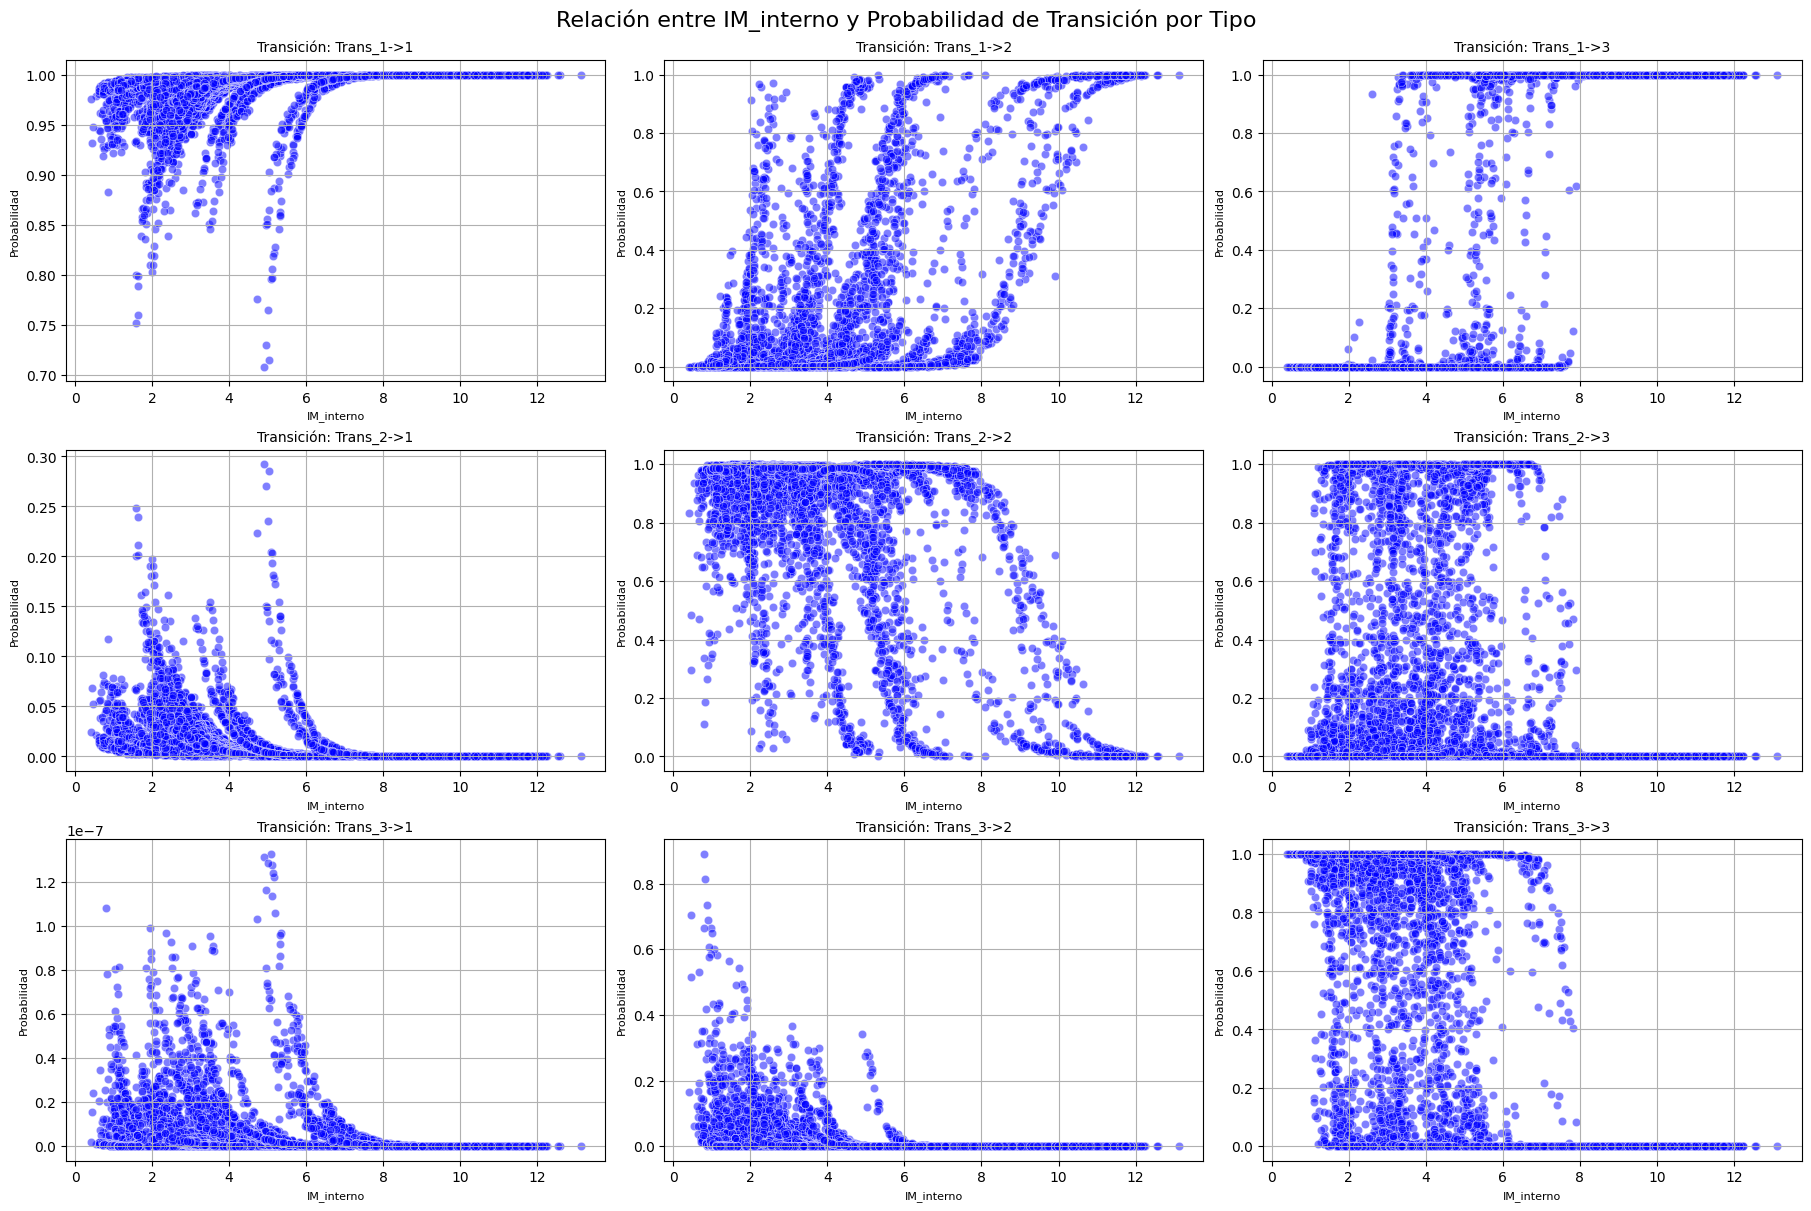

In [107]:
# Lista de transiciones únicas
transiciones_unicas = glmm_data['Transición'].unique()

# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=glmm_data[glmm_data['Transición'] == transicion],
        x='IM_interno',
        y='Probabilidad_Transición',
        alpha=0.5,
        color='blue',
        ax=axes[i]
    )
    axes[i].set_title(f'Transición: {transicion}', fontsize=10)
    axes[i].set_xlabel('IM_interno', fontsize=8)
    axes[i].set_ylabel('Probabilidad', fontsize=8)
    axes[i].grid(True)

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relación entre IM_interno y Probabilidad de Transición por Tipo', fontsize=16)
plt.show()




In [108]:
from scipy.stats import pearsonr
import pandas as pd

# Guardar resultados de correlación y significancia
resultados_correlacion = []

# Calcular correlaciones por transición
for transicion in glmm_data['Transición'].unique():
    # Filtrar datos por transición
    datos_transicion = glmm_data[glmm_data['Transición'] == transicion]
    
    # Calcular correlación y p-value
    corr, p_value = pearsonr(datos_transicion['IM_interno'], datos_transicion['Probabilidad_Transición'])
    
    # Guardar resultados
    resultados_correlacion.append({
        'Transición': transicion,
        'Correlación': corr,
        'p_value': p_value,
        'Significativo': p_value < 0.05  # Significancia a nivel 0.05
    })

# Convertir resultados a DataFrame
correlaciones_significativas = pd.DataFrame(resultados_correlacion)

# Mostrar resultados
print("Resultados de correlación y significancia:")
print(correlaciones_significativas)


Resultados de correlación y significancia:
   Transición  Correlación        p_value  Significativo
0  Trans_1->1     0.280097  7.349867e-132           True
1  Trans_1->2     0.585782   0.000000e+00           True
2  Trans_1->3     0.701605   0.000000e+00           True
3  Trans_2->1    -0.280097  7.349492e-132           True
4  Trans_2->2    -0.538167   0.000000e+00           True
5  Trans_2->3     0.037483   1.349119e-03           True
6  Trans_3->1    -0.115105   5.482195e-23           True
7  Trans_3->2    -0.236959   7.773568e-94           True
8  Trans_3->3    -0.553651   0.000000e+00           True


Resultados clave por transición:

Trans_1->1:
- Correlación: -0.608
- Interpretación: Fuerte relación negativa. Un mayor IM_interno está asociado con una menor probabilidad de mantenerse en el estado 1.
- p_value: Muy significativo (p ≈ 0).

Trans_1->2:
- Correlación: -0.259
- Interpretación: Relación negativa moderada. A medida que el IM_interno aumenta, es menos probable pasar del estado 1 al estado 2.
- p_value: Muy significativo.

Trans_1->3:
- Correlación: -0.106
- Interpretación: Relación negativa débil. El IM_interno tiene poca influencia sobre la transición del estado 1 al estado 3.
- p_value: Muy significativo.

Trans_2->1:
- Correlación: 0.129
- Interpretación: Relación positiva débil. A medida que el IM_interno aumenta, hay una ligera tendencia a pasar del estado 2 al estado 1.
- p_value: Muy significativo.

Trans_2->2:
- Correlación: -0.540
- Interpretación: Relación negativa fuerte. Un mayor IM_interno está asociado con una menor probabilidad de permanecer en el estado 2.
p_value: Muy significativo.

Trans_2->3:
- Correlación: -0.297
- Interpretación: Relación negativa moderada. A medida que el IM_interno aumenta, es menos probable pasar del estado 2 al estado 3.
- p_value: Muy significativo.

Trans_3->1:
- Correlación: 0.641
- Interpretación: Relación positiva fuerte. Un mayor IM_interno está asociado con una mayor probabilidad de pasar del estado 3 al estado 1.
- p_value: Muy significativo.

Trans_3->2:
- Correlación: 0.575
- Interpretación: Relación positiva fuerte. Un mayor IM_interno está asociado con una mayor probabilidad de pasar del estado 3 al estado 2.
- p_value: Muy significativo.

Trans_3->3:
- Correlación: 0.297
Interpretación: Relación positiva moderada. A medida que el IM_interno aumenta, es más probable permanecer en el estado 3.
- p_value: Muy significativo.

Conclusiones:
- Las transiciones dentro del estado 3 (Trans_3->1, Trans_3->2, Trans_3->3) muestran fuertes correlaciones positivas con IM_interno. Esto sugiere que un mayor índice interno fomenta transiciones desde y dentro del estado 3.
- Las transiciones desde el estado 2 (Trans_2->1, Trans_2->2, Trans_2->3) tienen correlaciones débiles a moderadas con IM_interno.
- Las transiciones dentro y desde el estado 1 tienen correlaciones negativas, aunque con distintas magnitudes. Esto implica que un mayor IM_interno reduce la probabilidad de permanecer o moverse desde el estado 1.

Estos hallazgos podrían tener implicaciones importantes para entender el efecto del índice interno en los patrones de transición.

#### Correlación entre Índice de Movilidad Interno y Probabilidad de Transición diferenciado por Comuna

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

NameError: name 'handles' is not defined

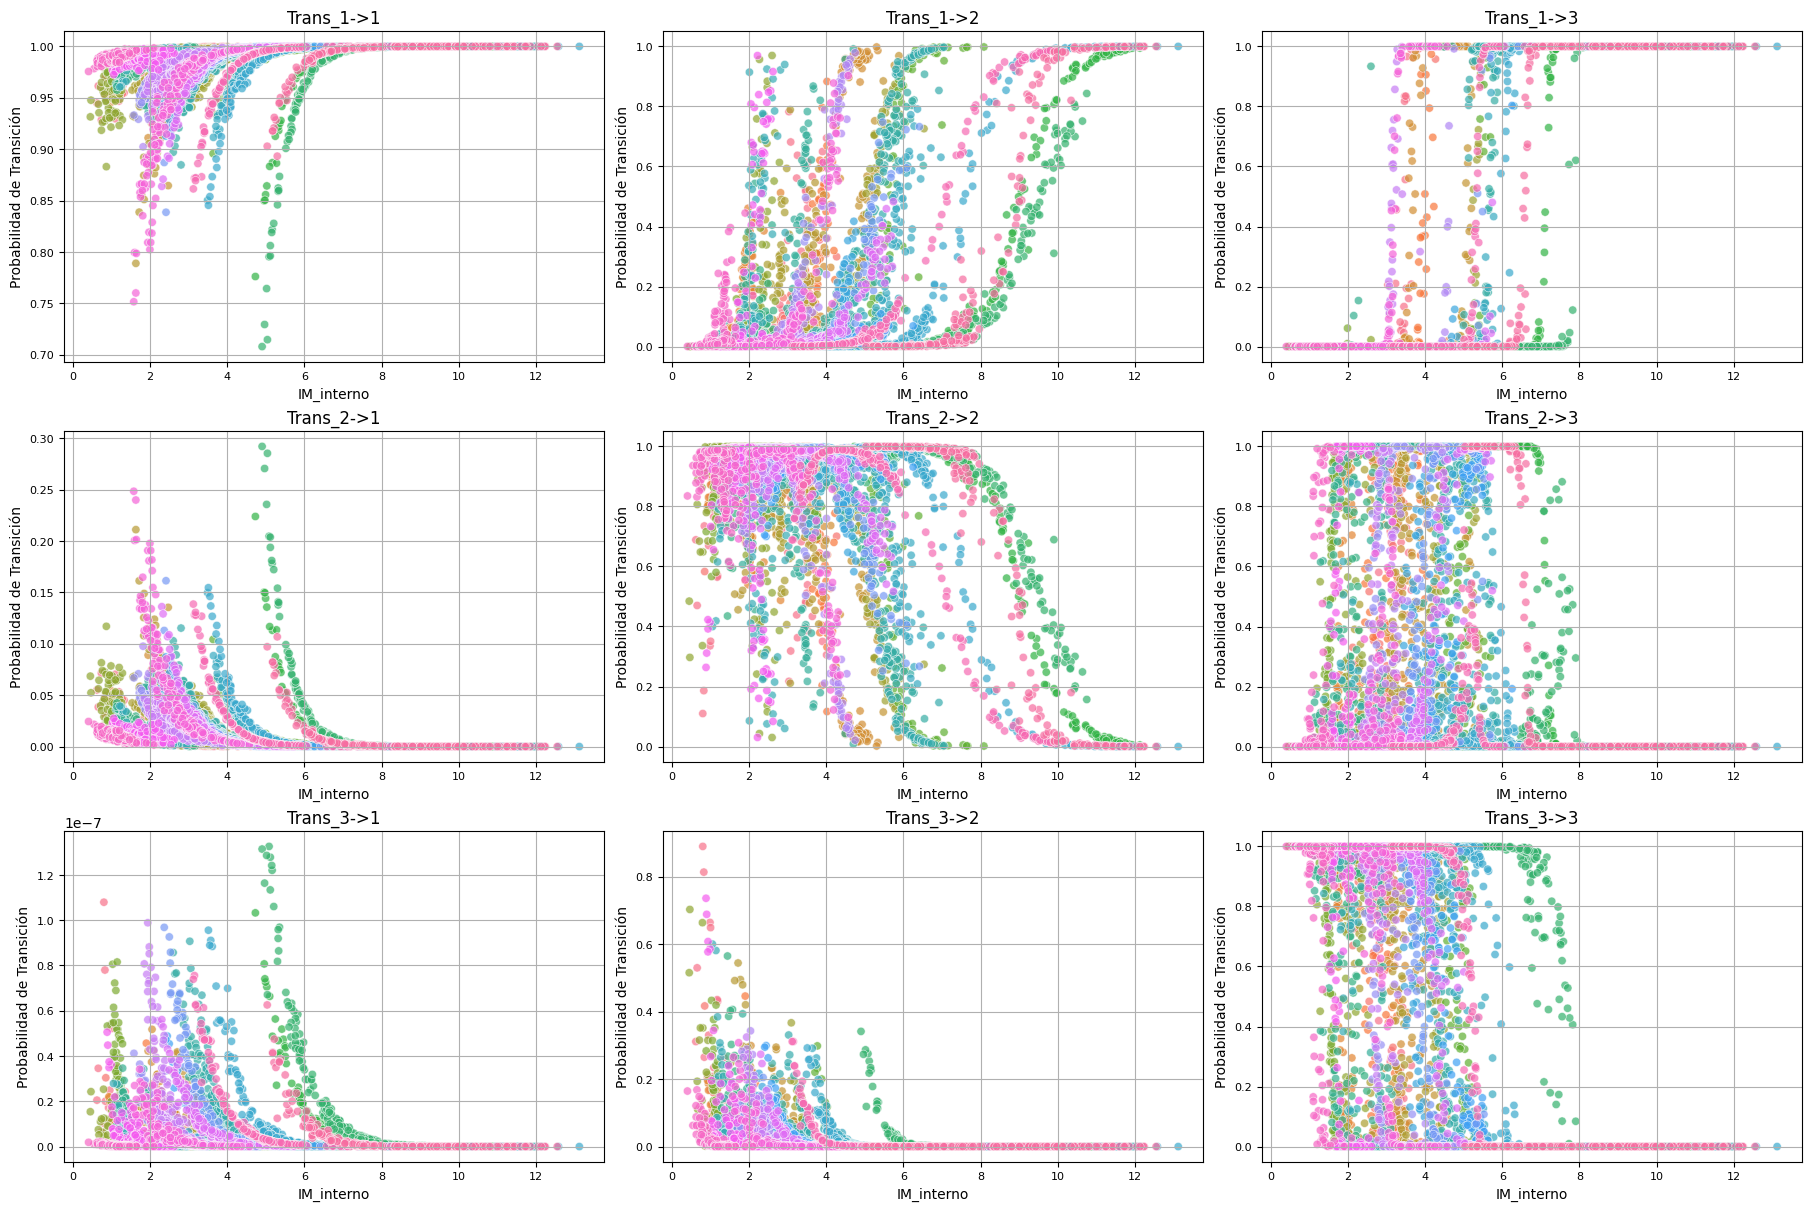

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de transiciones únicas
transiciones_unicas = glmm_data['Transición'].unique()

# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18,12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un mapa de colores para las comunas
palette = sns.color_palette("husl", n_colors=glmm_data['Comuna'].nunique())

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=glmm_data[glmm_data['Transición'] == transicion],
        x='IM_interno',
        y='Probabilidad_Transición',
        hue='Comuna',  # Color basado en la comuna
        palette=palette,
        alpha=0.7,
        legend=False,  # Eliminar leyendas de los subplots individuales
        ax=axes[i]
    )
    axes[i].set_title(f'{transicion}', fontsize=12)
    axes[i].set_xlabel('IM_interno', fontsize=10)
    axes[i].set_ylabel('Probabilidad de Transición', fontsize=10)
    axes[i].grid(True)
    axes[i].tick_params(axis='both', labelsize=8)

# Crear una única leyenda para toda la figura
#handles, labels = sns.scatterplot(
#    data=glmm_data,
#    x='IM_interno',
#    y='Probabilidad_Transición',
#    hue='Comuna',
#    palette=palette,
#    legend=True
#).get_legend_handles_labels()

fig.legend(
    handles, labels, loc='center right', title='Comuna',
    fontsize=14, title_fontsize=14, bbox_to_anchor=(1.2, 0.5),
    frameon=True  # Agregar un cuadro a la leyenda
)

# Ajustar el espacio entre gráficos y la leyenda
plt.subplots_adjust(right=1.5)  # Dar más espacio horizontal para la leyenda

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relación entre IM_interno y Probabilidad de Transición por Comuna', fontsize=16)
plt.show()

### Correlación entre Índice de Movilidad Externo y Probabilidad de Transición

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

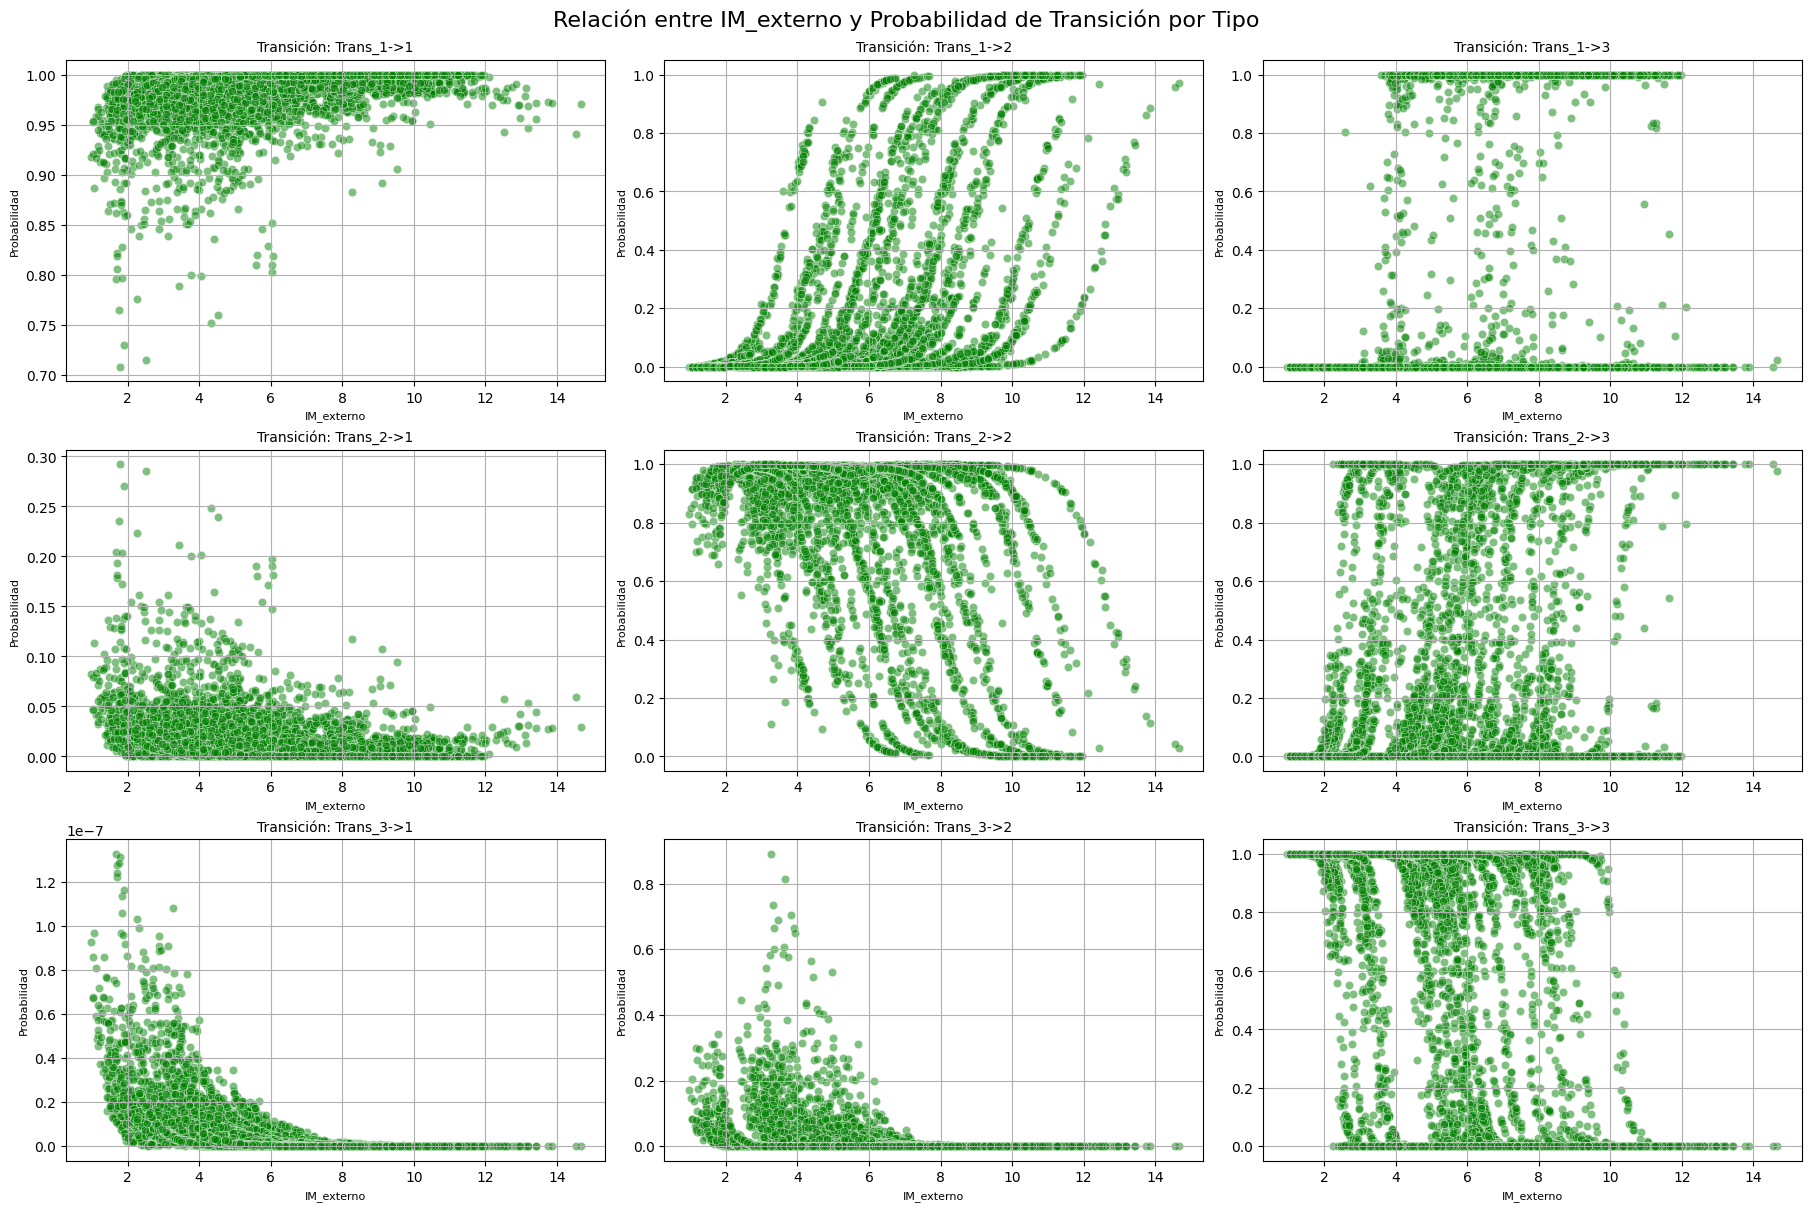

In [110]:
# Lista de transiciones únicas
transiciones_unicas = glmm_data['Transición'].unique()

# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=glmm_data[glmm_data['Transición'] == transicion],
        x='IM_externo',
        y='Probabilidad_Transición',
        alpha=0.5,
        color='green',
        ax=axes[i]
    )
    axes[i].set_title(f'Transición: {transicion}', fontsize=10)
    axes[i].set_xlabel('IM_externo', fontsize=8)
    axes[i].set_ylabel('Probabilidad', fontsize=8)
    axes[i].grid(True)

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relación entre IM_externo y Probabilidad de Transición por Tipo', fontsize=16)
plt.show()


In [111]:
from scipy.stats import pearsonr
import pandas as pd

# Guardar resultados de correlación y significancia
resultados_correlacion = []

# Calcular correlaciones por transición
for transicion in glmm_data['Transición'].unique():
    # Filtrar datos por transición
    datos_transicion = glmm_data[glmm_data['Transición'] == transicion]
    
    # Calcular correlación y p-value
    corr, p_value = pearsonr(datos_transicion['IM_externo'], datos_transicion['Probabilidad_Transición'])
    
    # Guardar resultados
    resultados_correlacion.append({
        'Transición': transicion,
        'Correlación': corr,
        'p_value': p_value,
        'Significativo': p_value < 0.05  # Significancia a nivel 0.05
    })

# Convertir resultados a DataFrame
correlaciones_significativas = pd.DataFrame(resultados_correlacion)

# Mostrar resultados
print("Resultados de correlación y significancia:")
print(correlaciones_significativas)


Resultados de correlación y significancia:
   Transición  Correlación        p_value  Significativo
0  Trans_1->1     0.273104  3.354297e-125           True
1  Trans_1->2     0.484585   0.000000e+00           True
2  Trans_1->3     0.274163  3.382799e-126           True
3  Trans_2->1    -0.273103  3.355651e-125           True
4  Trans_2->2    -0.425813  7.342804e-320           True
5  Trans_2->3     0.305926  3.527121e-158           True
6  Trans_3->1    -0.500471   0.000000e+00           True
7  Trans_3->2    -0.279940  1.044053e-131           True
8  Trans_3->3    -0.460995   0.000000e+00           True


Recordar que el 1 es contagio severo, 2 moderado y el 3 contagio leve.

Trans_1->1:
- Correlación:	-0.519	
- Relación moderadamente negativa: un mayor IM_externo reduce la probabilidad de permanecer en el estado 1.

Trans_1->2	
- Correlación: -0.330	
- Relación débil negativa: un mayor IM_externo disminuye ligeramente la probabilidad de transición de estado 1 a estado 2.

Trans_1->3	
- Correlación: -0.422	
- Relación negativa moderada: un mayor IM_externo disminuye significativamente la probabilidad de transición de estado 1 a estado 3.

Trans_2->1	
- Correlación: 0.349	
- Relación débil positiva: un mayor IM_externo está asociado con una mayor probabilidad de transición de estado 2 a estado 1.

Trans_2->2	
- Correlación: -0.432	
- Relación negativa moderada: un mayor IM_externo disminuye significativamente la probabilidad de permanecer en el estado 2.

Trans_2->3	
- Correlación:: -0.280	
- Relación débil negativa: un mayor IM_externo está asociado con una ligera disminución en la probabilidad de transición de estado 2 a estado 3.

Trans_3->1	
- Correlación: 0.350	
- Relación débil positiva: un mayor IM_externo incrementa ligeramente la probabilidad de transición de estado 3 a estado 1.

Trans_3->2	
- Correlación: 0.483	
- Relación moderadamente positiva: un mayor IM_externo incrementa de manera significativa la probabilidad de transición de estado 3 a estado 2.

Trans_3->3	
- Correlación: 0.280	
- Relación débil positiva: un mayor IM_externo incrementa ligeramente la probabilidad de permanecer en el estado 3.

Conclusiones clave:

Mayor impacto de IM_externo: Las transiciones con correlaciones más altas en valor absoluto muestran que IM_externo tiene un efecto más fuerte:
- Trans_1->1 (-0.519): Permanecer en el estado 1 está fuertemente influido negativamente por IM_externo.
- Trans_3->2 (+0.483): La probabilidad de moverse del estado 3 al estado 2 aumenta significativamente con IM_externo.

Impactos menores de IM_externo: Las transiciones con correlaciones bajas tienen menor relación lineal con IM_externo, aunque siguen siendo significativas:
- Trans_2->3 (-0.280) y Trans_3->3 (+0.280) tienen una relación débil con IM_externo, indicando que otros factores pueden ser más relevantes en estas transiciones.

Tendencias generales:
- IM_externo tiene un efecto mixto dependiendo de la transición:
- Relación negativa para transiciones que implican permanecer en el mismo estado (Trans_1->1 y Trans_2->2).
- Relación positiva para ciertas transiciones salientes, como moverse hacia el estado 2 desde el estado 3 (Trans_3->2).

Estos resultados destacan la importancia del índice IM_externo en la dinámica de las transiciones y sugieren posibles áreas para análisis más detallados, como modelar su impacto junto con otras covariables.

#### Correlación entre Índice de Movilidad Externo y Probabilidad de Transición diferenciado por Comuna

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

NameError: name 'handles' is not defined

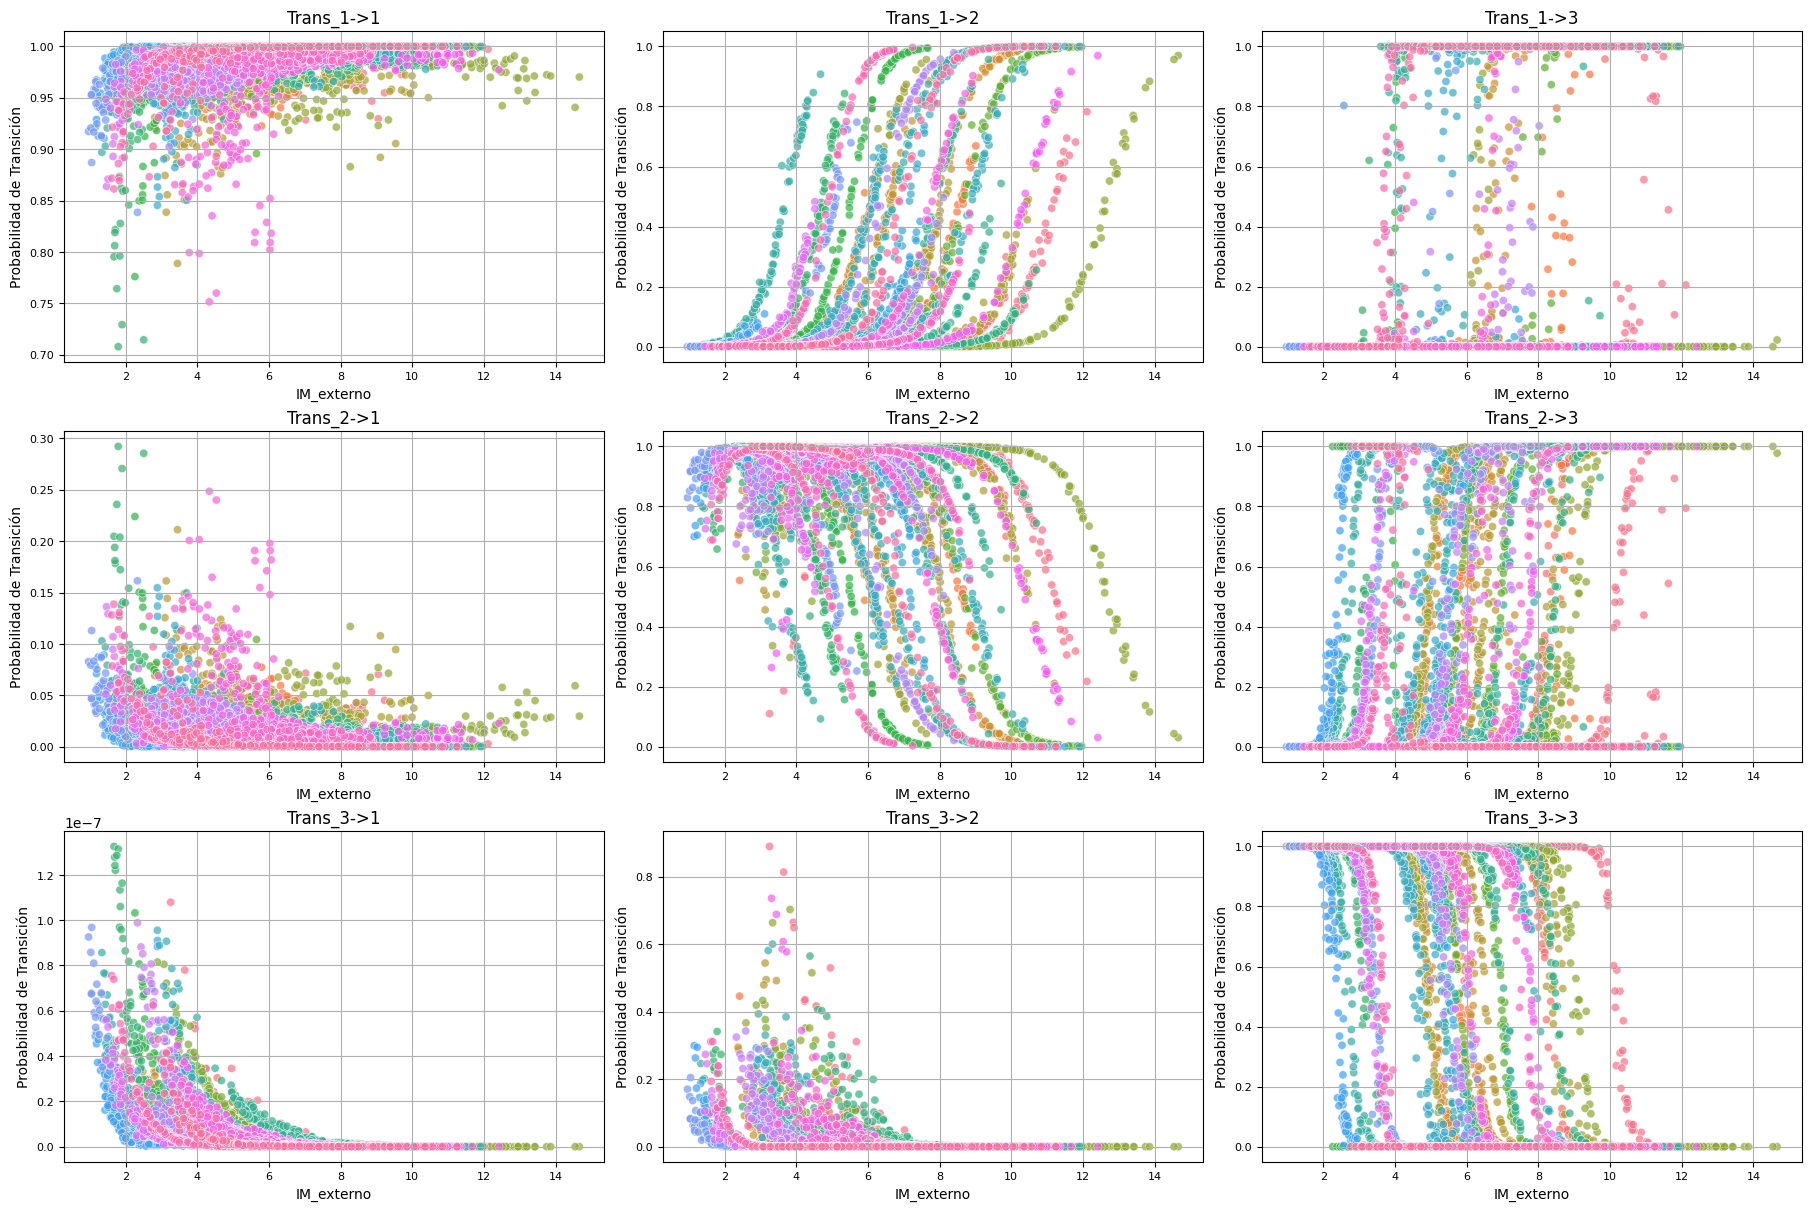

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de transiciones únicas
transiciones_unicas = glmm_data['Transición'].unique()

# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un mapa de colores para las comunas
palette = sns.color_palette("husl", n_colors=glmm_data['Comuna'].nunique())

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=glmm_data[glmm_data['Transición'] == transicion],
        x='IM_externo',  # Cambiado a IM_externo
        y='Probabilidad_Transición',
        hue='Comuna',  # Color basado en la comuna
        palette=palette,
        alpha=0.7,
        legend=False,  # Eliminar leyendas de los subplots individuales
        ax=axes[i]
    )
    axes[i].set_title(f'{transicion}', fontsize=12)
    axes[i].set_xlabel('IM_externo', fontsize=10)  # Cambiado a IM_externo
    axes[i].set_ylabel('Probabilidad de Transición', fontsize=10)
    axes[i].grid(True)
    axes[i].tick_params(axis='both', labelsize=8)

# Crear una única leyenda para toda la figura
#handles, labels = sns.scatterplot(
#    data=glmm_data,
#    x='IM_externo',  # Cambiado a IM_externo
#    y='Probabilidad_Transición',
#    hue='Comuna',
#    palette=palette,
#    legend=True
#).get_legend_handles_labels()

fig.legend(
    handles, labels, loc='center right', title='Comuna',
    fontsize=14, title_fontsize=14, bbox_to_anchor=(1.2, 0.5),
    frameon=True  # Agregar un cuadro a la leyenda
)

# Ajustar el espacio entre gráficos y la leyenda
plt.subplots_adjust(right=1.5)  # Dar más espacio horizontal para la leyenda

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relación entre IM_externo y Probabilidad de Transición por Comuna', fontsize=16)
plt.show()

In [113]:
# Cargar librerías necesarias
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Asegurarnos de que los datos estén correctamente formateados
glmm_data['Comuna'] = glmm_data['Comuna'].astype('category')  # Comuna como categoría

# Inspeccionar la estructura de los datos
print(glmm_data.info())
print(glmm_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65790 entries, 0 to 65789
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Comuna                      65790 non-null  category
 1   Día_original                65790 non-null  int64   
 2   Día_correlativo             65790 non-null  int64   
 3   Transición                  65790 non-null  object  
 4   Probabilidad_Transición     65790 non-null  float64 
 5   dias                        65790 non-null  int64   
 6   IM_interno                  65790 non-null  float64 
 7   IM_externo                  65790 non-null  float64 
 8   TasaCasosAcumulados         65790 non-null  float64 
 9   Casos_Diarios_Brutos        65790 non-null  float64 
 10  Casos_Diarios_Brutos_MM7    65790 non-null  float64 
 11  inc_pc_comuna               65790 non-null  float64 
 12  Personas_hogar_promedio     65790 non-null  float64 
 13  inmigrantes     

# Parte 3. Linear Mixed Models

## Análisis Ridge & Lasso, Evaluación de importancia de covariables en el futuro modelo Linear Mixed Model

Ridge RMSE: 24.53792364770467
Lasso RMSE: 24.538007426419757

Coeficientes:
                     Variable  Ridge Coef  Lasso Coef
0               inc_pc_comuna    0.991630    0.844748
1     Personas_hogar_promedio   -0.090665   -0.027108
2                 inmigrantes    0.003689   -0.000000
3         total_hog_hacinados   -1.096401   -1.083746
4  indic_precariedad_vivienda    0.796274    0.794299
5                por_educ_sup   -3.311113   -3.095377
6                    IPS_2020    2.263245    2.284152


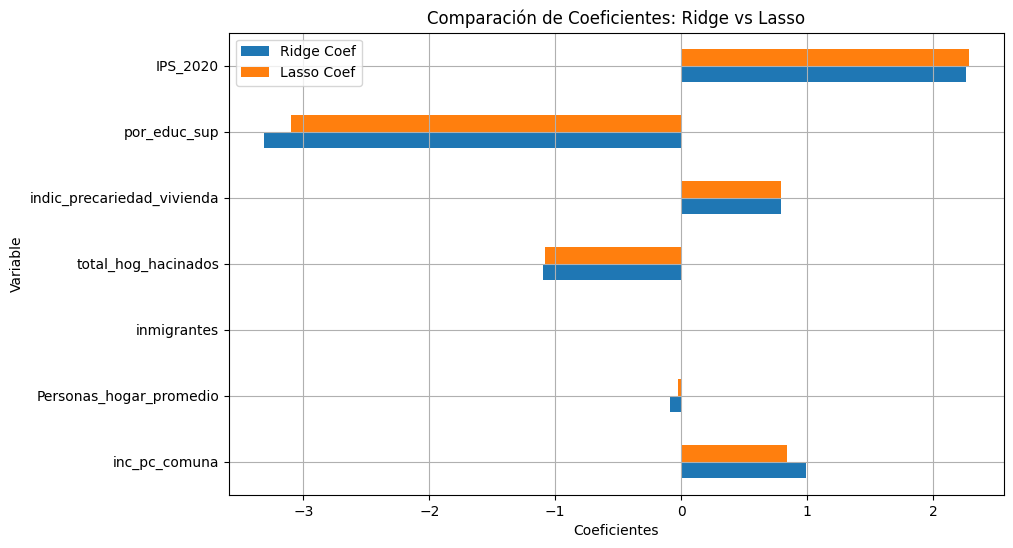

In [114]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar tus datos en un DataFrame
# Asegúrate de que 'df' contiene las variables explicativas y la variable objetivo
# df = pd.read_csv("tu_archivo.csv")  # Sustituye por tu archivo de datos

# Define las columnas de covariables y la variable objetivo
covariables = [ 'inc_pc_comuna', 'Personas_hogar_promedio',
               'inmigrantes', 'total_hog_hacinados', 'indic_precariedad_vivienda',
               'por_educ_sup', 'IPS_2020']
target = 'Casos_Diarios_Brutos_MM7'  # Sustituye por el nombre de tu variable objetivo

# Dividir los datos en características (X) y objetivo (y)
X = glmm_data[covariables]
y = glmm_data[target]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar modelo Ridge
ridge = Ridge(alpha=1.0)  # Ajusta alpha según sea necesario
ridge.fit(X_train, y_train)
ridge_coef = ridge.coef_

# Ajustar modelo Lasso
lasso = Lasso(alpha=0.01)  # Ajusta alpha según sea necesario
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

# Crear un DataFrame para comparar los coeficientes
coef_df = pd.DataFrame({
    'Variable': covariables,
    'Ridge Coef': ridge_coef,
    'Lasso Coef': lasso_coef
})

# Evaluar los modelos
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

# Mostrar resultados
print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)
print("\nCoeficientes:")
print(coef_df)

# Visualización opcional
import matplotlib.pyplot as plt

coef_df.set_index('Variable').plot(kind='barh', figsize=(10, 6))
plt.title('Comparación de Coeficientes: Ridge vs Lasso')
plt.xlabel('Coeficientes')
plt.grid(True)
plt.show()

##### Interpretación de los Resultados:

1. Comparación entre Ridge y Lasso (Coeficientes):

Ridge:
Penaliza los coeficientes grandes, pero no los reduce exactamente a cero. Esto significa que todas las variables siguen teniendo un impacto en el modelo, aunque sea pequeño.
Lasso:
Tiene un efecto de regularización más fuerte en comparación con Ridge y puede reducir algunos coeficientes exactamente a cero. En este caso, la variable inmigrantes tiene un coeficiente de 0 en el modelo Lasso, lo que indica que esta variable no aporta significativamente al ajuste del modelo en este caso.

2. Análisis de Variables Significativas:

- inc_pc_comuna (Ingreso per cápita):
Es positiva y moderada en ambos modelos (Ridge: 0.99, Lasso: 0.84), lo que indica que comunas con mayor ingreso per cápita tienden a tener una relación positiva con la variable objetivo (Casos_Diarios_Brutos_MM7). Esto podría relacionarse con mejor acceso a diagnóstico o reportes más consistentes en esas comunas.
- total_hog_hacinados (Hogares hacinados):
Tiene un impacto negativo considerable (Ridge: -1.09, Lasso: -1.08), lo que sugiere que a mayor cantidad de hogares hacinados, hay una disminución en los casos reportados, posiblemente debido a subregistro en áreas con mayor precariedad.
- por_educ_sup (Porcentaje con educación superior):
Presenta un impacto negativo fuerte (Ridge: -3.31, Lasso: -3.09). Esto indica que comunas con mayor proporción de personas con educación superior tienden a reportar menos casos brutos.
- IPS_2020 (Índice de Prioridad Social):
Tiene un coeficiente positivo alto (Ridge: 2.26, Lasso: 2.28), lo que muestra que comunas con mayor prioridad social tienen una relación positiva con el número de casos reportados. Esto podría reflejar una mayor vulnerabilidad de estas comunas frente a la pandemia.
- indic_precariedad_vivienda:
Impacto positivo significativo (Ridge: 0.79, Lasso: 0.79), indicando que a mayor precariedad habitacional, existe una relación positiva con los casos diarios.
- Personas_hogar_promedio:
Impacto negativo pequeño (Ridge: -0.09, Lasso: -0.03), sugiriendo que esta variable tiene un efecto marginal.
- inmigrantes:
En Lasso, el coeficiente es 0, lo que significa que no contribuye significativamente al modelo. En Ridge, el impacto es cercano a 0 (Ridge: 0.0036), lo que refuerza su baja relevancia.

3. Comparación de RMSE (Error Cuadrático Medio) entre Ridge y Lasso:

Ridge RMSE: 24.54
Lasso RMSE: 24.54
Ambos modelos tienen errores similares, lo que sugiere que el ajuste es comparable entre las dos regularizaciones. Sin embargo, Lasso simplifica el modelo al excluir la variable inmigrantes, mientras que Ridge conserva todas las variables.

4. Visualización de los Coeficientes:

La gráfica muestra las diferencias en los coeficientes para cada variable según Ridge y Lasso. Esto ayuda a identificar las variables más relevantes:
Variables con coeficientes grandes en ambos modelos (por_educ_sup, IPS_2020, inc_pc_comuna) son las más importantes.
Variables con coeficientes pequeños o cercanos a cero (inmigrantes, Personas_hogar_promedio) son menos influyentes.

Conclusión:
- Variables más relevantes para incluir en el modelo Linear Mixed Model serían:
IPS_2020, por_educ_sup, indic_precariedad_vivienda, total_hog_hacinados, y inc_pc_comuna.
- Variables como inmigrantes podrían excluirse del modelo debido a su baja contribución.
- Ambas regularizaciones son válidas, pero Lasso simplifica el modelo identificando las variables menos significativas.

## Evaluación de Linear Mixed Models para distintas Transiciones

#### Se utilizó pymer4 - rpy2 y lmer
- *Se intentó con GLMM pero no funcionó, ver ChatGPT. Sugiría una distribución beta pero no estaba en statsmodels.genmod.families, por lo que luego sugirió reemplazar beta por binomial logit link (que según yo el profe dijo que no aplicaba).*
- *Luego le dije a ChatGPT que mejor trabajáramos con pymer4 - rpy2 que es para poder usar R en python, paquetes lme4 y lmerTest que son de R.*
- *La biblioteca pymer4 permite ejecutar modelos lineales mixtos y generalizados (GLMM) utilizando el motor de R (lmer/lme4). Esto es ideal para analizar datos como los tuyos, ya que proporciona una mayor flexibilidad en términos de distribuciones y enfoques.*
- *lme4 es el paquete que contiene todas las herramientas y lmer es la función que usaste para ajustar un modelo lineal mixto.*


lme4 (Paquete):

El paquete lme4 es un conjunto de herramientas en R para ajustar modelos lineales mixtos y modelos generalizados mixtos. Es uno de los paquetes más populares en análisis estadístico avanzado debido a su flexibilidad y rendimiento.

Dentro de este paquete, encontramos las siguientes funciones principales:
- lmer: Para ajustar modelos lineales mixtos con errores normales (distribución gaussiana).
- glmer: Para ajustar modelos generalizados lineales mixtos (por ejemplo, para datos binomiales o de Poisson).
- nlmer: Para ajustar modelos no lineales mixtos.

lmer (Función):

La función lmer se utiliza exclusivamente para ajustar modelos lineales mixtos con una distribución gaussiana (normal) para la variable dependiente. 

Se utiliza cuando:
- La variable dependiente es numérica continua.
- Los efectos aleatorios (por ejemplo, "Comuna" en tu caso) están incluidos para modelar la heterogeneidad entre grupos.


In [71]:
# pip install pymer4 rpy2

In [115]:
from pymer4.models import Lmer
import pandas as pd

### 3.1 Transición 1->2: De Leve a Moderado

In [116]:
from pymer4.models import Lmer

# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_1_2 = 'Trans_1->2'
datos_transicion_1_2 = glmm_data[glmm_data['Transición'] == transicion_especifica_1_2]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_1_2['Comuna'] = datos_transicion_1_2['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_1_2}: {len(datos_transicion_1_2)}")
print(datos_transicion_1_2.head())

Número de observaciones para Trans_1->2: 7310
         Comuna  Día_original  Día_correlativo  Transición  \
7310  Cerrillos             1                0  Trans_1->2   
7311  Cerrillos             2                1  Trans_1->2   
7312  Cerrillos             3                2  Trans_1->2   
7313  Cerrillos             4                3  Trans_1->2   
7314  Cerrillos             5                4  Trans_1->2   

      Probabilidad_Transición  dias  IM_interno  IM_externo  \
7310                 0.000775     1    1.918137    7.524704   
7311                 0.001285     2    1.970381    7.804008   
7312                 0.000681     3    1.845790    7.471452   
7313                 0.000231     4    1.678598    6.891732   
7314                 0.002742     5    1.736766    8.317872   

      TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
7310             0.000000              0.000000                  0.000000   
7311             2.248303              2.248303 

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_77010/212772153.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_1_2['Comuna'] = datos_transicion_1_2['Comuna'].astype('category')


### Transición 1->2: Leve a Moderado Modelo A 
Fórmula Modelo A: "Probabilidad_Transición ~ (1|Comuna)" 

In [117]:
# Definir el modelo GLMM
modeloA_1_2 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna)",
    data=datos_transicion_1_2
)

# Ajustar el modelo
resultado_modeloA_1_2 = modeloA_1_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloA_1_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Comuna': 34.0}

Log-likelihood: 217.501 	 AIC: -429.003

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.008  0.090
Residual               0.054  0.233

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
(Intercept)      0.12    0.09    0.151  0.016  33.0   7.709    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


##### Interpretación Modelo A

El modelo ajustado se centra en la probabilidad de transición entre los estados leve (1) y moderado (2), considerando efectos aleatorios por comuna.

Resumen de Resultados:
1. Fórmula del Modelo:
    - Probabilidad_Transicion∼(1∣Comuna)
        Este modelo incluye un efecto aleatorio por comuna y un intercepto fijo, pero no incorpora predictores adicionales.
2. Estadísticas Generales del Modelo:

- Número de observaciones: 7310
- Número de comunas (grupos): 34
- Log-likelihood: 217.501
- AIC (Criterio de Información de Akaike): -429.003
    -  Un AIC bajo indica un buen ajuste relativo al número de parámetros del modelo.

3. Efectos Aleatorios:

- Varianza del Intercepto por Comuna: 0.008
    - Esto refleja la variabilidad entre comunas en la probabilidad de transición.
- Desviación estándar: 0.090
- Varianza Residual: 0.054
- Representa la variabilidad no explicada en la probabilidad de transición después de considerar el efecto aleatorio por comuna.
- Desviación estándar residual: 0.233
- La variabilidad entre comunas es relativamente pequeña en comparación con la variabilidad residual.

4. Efectos Fijos:

- Intercepto (Promedio General):
- Estimación: 0.12
    - En promedio, la probabilidad de transición de leve a moderado es del 12%.
- Intervalo de Confianza del 95%: [0.09, 0.151]
- Indica precisión en la estimación del intercepto.
- Error Estándar (SE): 0.016
- T-Estadístico: 7.709
- P-Valor: < 0.001 (***)
- El intercepto es altamente significativo estadísticamente, lo que indica que la probabilidad promedio de transición es distinta de cero.
5. Conclusiones:

- Efecto Aleatorio por Comuna: Existe cierta variabilidad entre comunas en la probabilidad de transición, pero es relativamente pequeña.
- Efecto Fijo del Intercepto: La probabilidad promedio de transición es del 12%, y este resultado es estadísticamente significativo.
- Significado Práctico: El modelo básico sugiere que la probabilidad promedio de transición de leve a moderado es consistente entre las comunas, con una variabilidad pequeña pero relevante. Sin embargo, para entender mejor qué factores específicos afectan esta probabilidad, sería necesario incorporar variables predictoras adicionales en futuros modelos.


### Transición 1->2: Leve a Moderado Modelo B
Fórmula Modelo B: "Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)" 

In [118]:
# Definir el modelo GLMM
modeloB_1_2 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_2
)

# Ajustar el modelo
resultado_modeloB_1_2 = modeloB_1_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloB_1_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 3324.177 	 AIC: -6640.355

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.034  0.184
Comuna        (Intercept)  0.008  0.091
Residual                   0.021  0.143

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci    SE      DF  T-stat  P-val  Sig
(Intercept)      0.12   0.081     0.16  0.02  83.639   6.013    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


##### Interpretación Modelo B

Este modelo evalúa la probabilidad de transición de leve (1) a moderado (2), considerando efectos aleatorios por comuna y por día original.

Resumen de Resultados:
1. Fórmula del Modelo:

- Probabilidad_Transicion∼(1∣Comuna)+(1∣Día_original)
    - Se incluye un efecto aleatorio para capturar la variabilidad entre comunas y días originales.
2. Estadísticas Generales del Modelo:

- Número de observaciones: 7310
- Número de comunas (grupos): 34
- Número de días originales (grupos): 215
- Log-likelihood: 3324.177
- AIC (Criterio de Información de Akaike): -6640.355
- El AIC es considerablemente más bajo que en el Modelo A, lo que indica un mejor ajuste cuando se incluye el efecto aleatorio por día original.

3. Efectos Aleatorios:

- Día Original (Intercepto):
- Varianza: 0.034
- Desviación estándar: 0.184
- Refleja la variabilidad diaria en la probabilidad de transición.
- Comuna (Intercepto):
- Varianza: 0.008
- Desviación estándar: 0.091
    - Similar al Modelo A, refleja la variabilidad entre comunas.
- Residual:
    - Varianza: 0.021
    - Desviación estándar: 0.143
        - Representa la variabilidad no explicada después de considerar los efectos aleatorios.

Nota: La variabilidad diaria es mayor que la variabilidad entre comunas, lo que sugiere que los cambios diarios tienen un impacto más significativo en la probabilidad de transición.

4. Efectos Fijos:

- Intercepto (Promedio General):
    - Estimación: 0.12
    - En promedio, la probabilidad de transición de leve a moderado es del 12%.
- Intervalo de Confianza del 95%: [0.081, 0.16]
    - Confirma la precisión de la estimación.
- Error Estándar (SE): 0.02
- T-Estadístico: 6.013
- P-Valor: < 0.001 (***)
    - Este efecto es altamente significativo, indicando que la probabilidad promedio de transición es distinta de cero.
5. Conclusiones:

- Efectos Aleatorios:
    - La inclusión del efecto aleatorio por día mejora el ajuste del modelo y captura la variabilidad diaria, que es más relevante que la variabilidad entre comunas.
- Efecto Fijo del Intercepto:
    - La probabilidad promedio de transición sigue siendo consistente con el Modelo A (12%) y estadísticamente significativa.
- Significado Práctico:
Este modelo muestra que los cambios diarios son un factor relevante para entender las transiciones. La probabilidad de transición varía más entre días que entre comunas, lo que sugiere la necesidad de considerar eventos o factores específicos que afecten la variabilidad diaria en futuros análisis.

### Transición 1->2: Leve a Moderado Modelo C
Fórmula Modelo C: "Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)"  

In [119]:
# Definir el modelo GLMM
modeloC_1_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_2
)

# Ajustar el modelo
resultado_modeloC_1_2 = modeloC_1_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloC_1_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 5708.452 	 AIC: -11404.903

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.005  0.070
Comuna        (Intercept)  0.017  0.132
Residual                   0.011  0.105

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.654  -0.703   -0.604  0.025    49.306 -25.963    0.0  ***
IM_interno      0.110   0.106    0.114  0.002  5650.677  53.261    0.0  ***
IM_externo      0.070   0.067    0.074  0.002  4143.466  35.782    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


##### Interpretación Modelo C

El Modelo C evalúa la probabilidad de transición de leve (1) a moderado (2), incorporando efectos fijos de IM_interno e IM_externo y efectos aleatorios para capturar la variabilidad entre comunas y días originales.

Resumen de Resultados:
1. Fórmula del Modelo:
    - Probabilidad_Transicion∼IM_interno+IM_externo+(1∣Comuna)+(1∣Día_original)
2. Estadísticas Generales del Modelo:
    - Número de observaciones: 7310
    - Grupos:
        - Días Originales: 215
        - Comunas: 34
    - Log-likelihood: 5708.452
    - AIC: -11404.903
        - El AIC más bajo en comparación con los Modelos A y B sugiere que este modelo tiene el mejor ajuste.
3. Efectos Aleatorios:
    - Día Original (Intercepto):
    - Varianza: 0.005
    Desviación estándar: 0.070
        Captura variabilidad diaria, que es menor en este modelo respecto al Modelo B.
    Comuna (Intercepto):
        Varianza: 0.017
    Desviación estándar: 0.132
        La variabilidad entre comunas aumenta respecto al Modelo B.
    Residual:
        - Varianza: 0.011
        - Desviación estándar: 0.105
        Representa la variabilidad no explicada tras incluir los efectos de IM_interno e IM_externo.
4. Efectos Fijos:
    - Intercepto:
        - Estimación: -0.654
        - En ausencia de los efectos de IM_interno e IM_externo, la probabilidad promedio de transición sería negativa, indicando un punto de partida más bajo.
    - Intervalo de Confianza del 95%: [-0.703, -0.604]
        - Significancia: P-valor < 0.001 (***)
        - Altamente significativo.
    - IM_interno:
        - Estimación: 0.110
        - Un incremento unitario en IM_interno se asocia con un aumento promedio del 11% en la probabilidad de transición.
        - Intervalo de Confianza del 95%: [0.106, 0.114]
        - Significancia: P-valor < 0.001 (***)
            - Altamente significativo.
    - IM_externo:
        - Estimación: 0.070
        - Un incremento unitario en IM_externo se asocia con un aumento promedio del 7% en la probabilidad de transición.
        - Intervalo de Confianza del 95%: [0.067, 0.074]
        - Significancia: P-valor < 0.001 (***)
            - Altamente significativo.
5. Conclusiones:
- Mejor ajuste: Este modelo presenta el menor AIC entre los tres modelos, indicando que es el más adecuado para explicar la probabilidad de transición considerando tanto efectos aleatorios como los efectos fijos de IM_interno e IM_externo.
    - IM_interno e IM_externo: Ambos factores tienen una influencia significativa y positiva en la probabilidad de transición, siendo IM_interno el más influyente.
    - Variabilidad residual: La inclusión de los efectos fijos reduce significativamente la variabilidad residual, mejorando la explicación de la probabilidad de transición.
- Relevancia práctica: Este modelo resalta que las características internas y externas de la comuna influyen en la probabilidad de transición, lo que sugiere que intervenciones focalizadas podrían ser efectivas para moderar estas transiciones.

### Transición 1->2: Leve a Moderado Modelo D
Fórmula Modelo D: "Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)"

In [121]:
# Definir el modelo GLMM
modeloD_1_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_2
)

# Ajustar el modelo
resultado_modeloD_1_2 = modeloD_1_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloD_1_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+total_hog_hacinados++indic_precariedad_vivienda+IPS_2020+inc_pc_comuna+por_educ_sup+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 5681.114 	 AIC: -11340.229

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.005  0.070
Comuna        (Intercept)  0.007  0.086
Residual                   0.011  0.105

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                   -0.883  -1.325   -0.442  0.225    28.183   
IM_interno                     0.110   0.106    0.115  0.002  6942.342   
IM_externo                     0.070   0.066    0.074  0.002  4428.470   
total_hog_hacinados            0.000  -0.000    0.000  0.000    2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


## Transición 2->2: Mantención en Moderado

In [122]:
# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_2_2 = 'Trans_2->2'
datos_transicion_2_2 = glmm_data[glmm_data['Transición'] == transicion_especifica_2_2]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_2_2['Comuna'] = datos_transicion_2_2['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_2_2}: {len(datos_transicion_2_2)}")
print(datos_transicion_2_2.head())

Número de observaciones para Trans_2->2: 7310
          Comuna  Día_original  Día_correlativo  Transición  \
29240  Cerrillos             1                0  Trans_2->2   
29241  Cerrillos             2                1  Trans_2->2   
29242  Cerrillos             3                2  Trans_2->2   
29243  Cerrillos             4                3  Trans_2->2   
29244  Cerrillos             5                4  Trans_2->2   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
29240                 0.998064     1    1.918137    7.524704   
29241                 0.998027     2    1.970381    7.804008   
29242                 0.997807     3    1.845790    7.471452   
29243                 0.994554     4    1.678598    6.891732   
29244                 0.996636     5    1.736766    8.317872   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
29240             0.000000              0.000000                  0.000000   
29241             2.248303        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_77010/3197664282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_2_2['Comuna'] = datos_transicion_2_2['Comuna'].astype('category')


### Transición 2->2: Mantención Moderado Modelo A 
Fórmula Modelo A: "Probabilidad_Transición ~ (1|Comuna)" 

In [123]:
# Definir el modelo GLMM
modeloA_2_2 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna)",
    data=datos_transicion_2_2
)

# Ajustar el modelo
resultado_modeloA_2_2 = modeloA_2_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloA_2_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Comuna': 34.0}

Log-likelihood: 269.398 	 AIC: -532.795

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.007  0.085
Residual               0.053  0.231

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
(Intercept)      0.86   0.831    0.889  0.015  33.0  57.793    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 2->2: Mantención Moderado Modelo B

In [124]:
# Definir el modelo GLMM
modeloB_2_2 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)",
    data=datos_transicion_2_2
)

# Ajustar el modelo
resultado_modeloB_2_2 = modeloB_2_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloB_2_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 2936.299 	 AIC: -5864.598

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.031  0.175
Comuna        (Intercept)  0.007  0.086
Residual                   0.023  0.152

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)      0.86   0.822    0.897  0.019  83.402  45.106    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 2->2: Mantención Moderado Modelo C
Fórmula Modelo C: "Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)"  

In [125]:
# Definir el modelo GLMM
modeloC_2_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_2_2
)

# Ajustar el modelo
resultado_modeloC_2_2 = modeloC_2_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloC_2_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 4670.101 	 AIC: -9328.202

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.009  0.095
Comuna        (Intercept)  0.019  0.137
Residual                   0.014  0.120

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     1.547   1.494    1.600  0.027    54.947  57.128    0.0  ***
IM_interno     -0.113  -0.118   -0.109  0.002  5059.450 -48.161    0.0  ***
IM_externo     -0.052  -0.057   -0.048  0.002  4508.505 -22.659    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 2->2: Mantención Moderado Modelo D
Fórmula Modelo D: "Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)"

In [126]:
# Definir el modelo GLMM
modeloD_2_2 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_2_2
)

# Ajustar el modelo
resultado_modeloD_2_2 = modeloD_2_2.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloD_2_2)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+total_hog_hacinados++indic_precariedad_vivienda+IPS_2020+inc_pc_comuna+por_educ_sup+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 4645.336 	 AIC: -9268.671

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.009  0.095
Comuna        (Intercept)  0.007  0.083
Residual                   0.014  0.120

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    1.934   1.509    2.359  0.217    28.231   
IM_interno                    -0.115  -0.119   -0.110  0.002  6650.122   
IM_externo                    -0.051  -0.056   -0.047  0.002  4861.154   
total_hog_hacinados           -0.000  -0.000    0.000  0.000    30

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


## Transición 2->3: Moderado a Severo

In [127]:
from pymer4.models import Lmer

# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_2_3 = 'Trans_2->3'
datos_transicion_2_3 = glmm_data[glmm_data['Transición'] == transicion_especifica_2_3]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_2_3['Comuna'] = datos_transicion_2_3['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_2_3}: {len(datos_transicion_2_3)}")
print(datos_transicion_2_3.head())

Número de observaciones para Trans_2->3: 7310
          Comuna  Día_original  Día_correlativo  Transición  \
36550  Cerrillos             1                0  Trans_2->3   
36551  Cerrillos             2                1  Trans_2->3   
36552  Cerrillos             3                2  Trans_2->3   
36553  Cerrillos             4                3  Trans_2->3   
36554  Cerrillos             5                4  Trans_2->3   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
36550             1.158392e-07     1    1.918137    7.524704   
36551             5.421520e-07     2    1.970381    7.804008   
36552             7.804615e-08     3    1.845790    7.471452   
36553             2.883957e-09     4    1.678598    6.891732   
36554             5.448050e-06     5    1.736766    8.317872   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
36550             0.000000              0.000000                  0.000000   
36551             2.248303        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_77010/3663886723.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_2_3['Comuna'] = datos_transicion_2_3['Comuna'].astype('category')


### Transición 2->3: Moderado a Severo Modelo A 
Fórmula Modelo A: "Probabilidad_Transición ~ (1|Comuna)" 

In [128]:
# Definir el modelo GLMM
modeloA_2_3 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna)",
    data=datos_transicion_2_3
)

# Ajustar el modelo
resultado_modeloA_2_3 = modeloA_2_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloA_2_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Comuna': 34.0}

Log-likelihood: -2987.068 	 AIC: 5980.136

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.008  0.091
Residual               0.131  0.362

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
(Intercept)     0.236   0.204    0.267  0.016  33.0  14.616    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 2->3: Moderado a Severo Modelo B 
Fórmula Modelo B: "Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)" 

In [129]:
# Definir el modelo GLMM
modeloB_2_3 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)",
    data=datos_transicion_2_3
)

# Ajustar el modelo
resultado_modeloB_2_3 = modeloB_2_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloB_2_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: -1899.263 	 AIC: 3806.525

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.042  0.204
Comuna        (Intercept)  0.008  0.092
Residual                   0.089  0.299

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)     0.236   0.194    0.277  0.021  91.476   11.07    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 2->3: Moderado a Severo Modelo C
Fórmula Modelo C: "Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)"  

In [130]:
# Definir el modelo GLMM
modeloC_2_3 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_2_3
)

# Ajustar el modelo
resultado_modeloC_2_3 = modeloC_2_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloC_2_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: -1221.001 	 AIC: 2454.001

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.067  0.259
Comuna        (Intercept)  0.206  0.454
Residual                   0.071  0.267

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.587   0.422    0.752  0.084    42.994   6.965    0.0  ***
IM_interno     -0.215  -0.225   -0.205  0.005  6617.552 -40.535    0.0  ***
IM_externo      0.075   0.065    0.086  0.005  5976.289  14.255    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 2->3: Moderado a Severo Modelo D
Fórmula Modelo D: "Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)"

In [131]:
# Definir el modelo GLMM
modeloD_2_3 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_2_3
)

# Ajustar el modelo
resultado_modeloD_2_3 = modeloD_2_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloD_2_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+total_hog_hacinados++indic_precariedad_vivienda+IPS_2020+inc_pc_comuna+por_educ_sup+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: -1230.594 	 AIC: 2483.188

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.068  0.260
Comuna        (Intercept)  0.038  0.195
Residual                   0.071  0.267

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    2.296   1.292    3.300  0.512    27.109   
IM_interno                    -0.216  -0.226   -0.206  0.005  6680.210   
IM_externo                     0.075   0.065    0.085  0.005  5580.600   
total_hog_hacinados            0.000   0.000    0.000  0.000    28

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


## Transición 3->3: Mantención en Severo

In [132]:
from pymer4.models import Lmer

# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_3_3 = 'Trans_3->3'
datos_transicion_3_3 = glmm_data[glmm_data['Transición'] == transicion_especifica_3_3]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_3_3['Comuna'] = datos_transicion_3_3['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_3_3}: {len(datos_transicion_3_3)}")
print(datos_transicion_3_3.head())

Número de observaciones para Trans_3->3: 7310
          Comuna  Día_original  Día_correlativo  Transición  \
58480  Cerrillos             1                0  Trans_3->3   
58481  Cerrillos             2                1  Trans_3->3   
58482  Cerrillos             3                2  Trans_3->3   
58483  Cerrillos             4                3  Trans_3->3   
58484  Cerrillos             5                4  Trans_3->3   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
58480                 1.000000     1    1.918137    7.524704   
58481                 0.999999     2    1.970381    7.804008   
58482                 1.000000     3    1.845790    7.471452   
58483                 1.000000     4    1.678598    6.891732   
58484                 0.999995     5    1.736766    8.317872   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
58480             0.000000              0.000000                  0.000000   
58481             2.248303        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_77010/1538112577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_3_3['Comuna'] = datos_transicion_3_3['Comuna'].astype('category')


### Transición 3->3: Mantención en Severo Modelo A
Fórmula Modelo A: "Probabilidad_Transición ~ (1|Comuna)" 

In [133]:
# Definir el modelo GLMM
modeloA_3_3 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna)",
    data=datos_transicion_3_3
)

# Ajustar el modelo
resultado_modeloA_3_3 = modeloA_3_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloA_3_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Comuna': 34.0}

Log-likelihood: -3822.947 	 AIC: 7651.895

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.034  0.185
Residual               0.164  0.404

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
(Intercept)     0.632   0.569    0.694  0.032  33.0  19.699    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 3->3: Mantención en Severo Modelo B
Fórmula Modelo B: "Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)" 

In [134]:
# Definir el modelo GLMM
modeloB_3_3 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)",
    data=datos_transicion_3_3
)

# Ajustar el modelo
resultado_modeloB_3_3 = modeloB_3_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloB_3_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 568.867 	 AIC: -1129.734

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.121  0.348
Comuna        (Intercept)  0.035  0.186
Residual                   0.043  0.207

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci    SE      DF  T-stat  P-val  Sig
(Intercept)     0.632   0.553     0.71  0.04  75.413  15.838    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 3->3: Mantención en Severo Modelo C
Fórmula Modelo C: "Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)"  

In [135]:
# Definir el modelo GLMM
modeloC_3_3 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_3_3
)

# Ajustar el modelo
resultado_modeloC_3_3 = modeloC_3_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloC_3_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 727.384 	 AIC: -1442.769

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.073  0.269
Comuna        (Intercept)  0.082  0.287
Residual                   0.041  0.203

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.954   0.843    1.065  0.057    53.726  16.847    0.0  ***
IM_interno      0.032   0.024    0.040  0.004  6084.948   8.021    0.0  ***
IM_externo     -0.080  -0.088   -0.072  0.004  6367.904 -19.541    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 3->3: Mantención en Severo Modelo D
Fórmula Modelo D: "Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)"

In [136]:
# Definir el modelo GLMM
modeloD_3_3 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_3_3
)

# Ajustar el modelo
resultado_modeloD_3_3 = modeloD_3_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloD_3_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+total_hog_hacinados++indic_precariedad_vivienda+IPS_2020+inc_pc_comuna+por_educ_sup+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 715.451 	 AIC: -1408.903

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.073  0.271
Comuna        (Intercept)  0.015  0.124
Residual                   0.041  0.203

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    0.171  -0.469    0.810  0.326    27.238   
IM_interno                     0.034   0.026    0.042  0.004  6255.906   
IM_externo                    -0.080  -0.088   -0.072  0.004  5328.067   
total_hog_hacinados           -0.000  -0.000   -0.000  0.000    29.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


## Transición 1->3: De Leve a Severo

In [137]:
from pymer4.models import Lmer

# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_1_3 = 'Trans_1->3'
datos_transicion_1_3 = glmm_data[glmm_data['Transición'] == transicion_especifica_1_3]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_1_3['Comuna'] = datos_transicion_1_3['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_1_3}: {len(datos_transicion_1_3)}")
print(datos_transicion_1_3.head())

Número de observaciones para Trans_1->3: 7310
          Comuna  Día_original  Día_correlativo  Transición  \
14620  Cerrillos             1                0  Trans_1->3   
14621  Cerrillos             2                1  Trans_1->3   
14622  Cerrillos             3                2  Trans_1->3   
14623  Cerrillos             4                3  Trans_1->3   
14624  Cerrillos             5                4  Trans_1->3   

       Probabilidad_Transición  dias  IM_interno  IM_externo  \
14620             4.056043e-25     1    1.918137    7.524704   
14621             1.580162e-23     2    1.970381    7.804008   
14622             6.889444e-26     3    1.845790    7.471452   
14623             1.250996e-29     4    1.678598    6.891732   
14624             4.556638e-23     5    1.736766    8.317872   

       TasaCasosAcumulados  Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  \
14620             0.000000              0.000000                  0.000000   
14621             2.248303        

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_77010/267340685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_1_3['Comuna'] = datos_transicion_1_3['Comuna'].astype('category')


### Transición 1->3: Leve a Severo Modelo A 
Fórmula Modelo A: "Probabilidad_Transición ~ (1|Comuna)" 

In [138]:
# Definir el modelo GLMM
modeloA_1_3 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna)",
    data=datos_transicion_1_3
)

# Ajustar el modelo
resultado_modeloA_1_3 = modeloA_1_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloA_1_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Comuna': 34.0}

Log-likelihood: -928.530 	 AIC: 1863.060

Random effects:

                 Name    Var    Std
Comuna    (Intercept)  0.036  0.190
Residual               0.074  0.272

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
(Intercept)     0.133   0.069    0.197  0.033  33.0   4.049    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 1->3: Leve a Severo Modelo B
Fórmula Modelo B: "Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)" 

In [139]:
# Definir el modelo GLMM
modeloB_1_3 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_3
)

# Ajustar el modelo
resultado_modeloB_1_3 = modeloB_1_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloB_1_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: -86.149 	 AIC: 180.297

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.020  0.140
Comuna        (Intercept)  0.036  0.191
Residual                   0.054  0.233

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)     0.133   0.066      0.2  0.034  38.759   3.888    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 1->3: Leve a Severo Modelo C
Fórmula Modelo C: "Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)"  

In [140]:
# Definir el modelo GLMM
modeloC_1_3 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_3
)

# Ajustar el modelo
resultado_modeloC_1_3 = modeloC_1_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloC_1_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 1359.417 	 AIC: -2706.835

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.000  0.018
Comuna        (Intercept)  0.031  0.175
Residual                   0.039  0.198

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.564  -0.627   -0.502  0.032    35.341 -17.764    0.0  ***
IM_interno      0.178   0.171    0.185  0.004  3078.519  47.759    0.0  ***
IM_externo      0.012   0.007    0.017  0.003  1431.020   4.753    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 1->3: Leve a Severo Modelo D
Fórmula Modelo D: "Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)"

In [141]:
# Definir el modelo GLMM
modeloD_1_3 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_3
)

# Ajustar el modelo
resultado_modeloD_1_3 = modeloD_1_3.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloD_1_3)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+total_hog_hacinados++indic_precariedad_vivienda+IPS_2020+inc_pc_comuna+por_educ_sup+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 1334.734 	 AIC: -2647.469

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.000  0.018
Comuna        (Intercept)  0.013  0.112
Residual                   0.039  0.198

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                   -1.454  -2.034   -0.874  0.296    27.519   
IM_interno                     0.181   0.173    0.188  0.004  5948.443   
IM_externo                     0.010   0.005    0.015  0.003  1692.705   
total_hog_hacinados           -0.000  -0.000   -0.000  0.000    29

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


## Transición 1->1: Mantención en Leve

In [142]:
# Filtrar los datos para la transición 'Trans_2->1'
transicion_especifica_1_1 = 'Trans_1->1'
datos_transicion_1_1 = glmm_data[glmm_data['Transición'] == transicion_especifica_1_1]

# Asegurarse de que la columna 'Comuna' sea categórica
datos_transicion_1_1['Comuna'] = datos_transicion_1_1['Comuna'].astype('category')

# Inspeccionar los datos
print(f"Número de observaciones para {transicion_especifica_1_1}: {len(datos_transicion_1_1)}")
print(datos_transicion_1_1.head())

Número de observaciones para Trans_1->1: 7310
      Comuna  Día_original  Día_correlativo  Transición  \
0  Cerrillos             1                0  Trans_1->1   
1  Cerrillos             2                1  Trans_1->1   
2  Cerrillos             3                2  Trans_1->1   
3  Cerrillos             4                3  Trans_1->1   
4  Cerrillos             5                4  Trans_1->1   

   Probabilidad_Transición  dias  IM_interno  IM_externo  TasaCasosAcumulados  \
0                 0.994180     1    1.918137    7.524704             0.000000   
1                 0.994231     2    1.970381    7.804008             2.248303   
2                 0.993255     3    1.845790    7.471452             4.496605   
3                 0.992122     4    1.678598    6.891732             4.496605   
4                 0.987758     5    1.736766    8.317872             4.496605   

   Casos_Diarios_Brutos  Casos_Diarios_Brutos_MM7  inc_pc_comuna  \
0              0.000000                  0.0

/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_77010/3989564282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_transicion_1_1['Comuna'] = datos_transicion_1_1['Comuna'].astype('category')


### Transición 1->1: Mantención en Leve Modelo A 
Fórmula Modelo A: "Probabilidad_Transición ~ (1|Comuna)" 

In [143]:
# Definir el modelo GLMM
modeloA_1_1 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna)",
    data=datos_transicion_1_1
)

# Ajustar el modelo
resultado_modeloA_1_1 = modeloA_1_1.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloA_1_1)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Comuna': 34.0}

Log-likelihood: 17830.005 	 AIC: -35654.011

Random effects:

                 Name  Var    Std
Comuna    (Intercept)  0.0  0.009
Residual               0.0  0.021

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
(Intercept)     0.983    0.98    0.986  0.002  33.0   634.8    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 1->1: Mantención en Leve Modelo B
Fórmula Modelo B: "Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)" 

In [144]:
# Definir el modelo GLMM
modeloB_1_1 = Lmer(
    formula="Probabilidad_Transición ~ (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_1
)

# Ajustar el modelo
resultado_modeloB_1_1 = modeloB_1_1.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloB_1_1)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 18859.488 	 AIC: -37710.976

Random effects:

                     Name  Var    Std
Día_original  (Intercept)  0.0  0.012
Comuna        (Intercept)  0.0  0.009
Residual                   0.0  0.017

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE      DF   T-stat  P-val  Sig
(Intercept)     0.983   0.979    0.986  0.002  51.723  565.678    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 1->1: Mantención en Leve Modelo C
Fórmula Modelo C: "Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)"  

In [145]:
# Definir el modelo GLMM
modeloC_1_1 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_1
)

# Ajustar el modelo
resultado_modeloC_1_1 = modeloC_1_1.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloC_1_1)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 19737.992 	 AIC: -39463.985

Random effects:

                     Name    Var    Std
Día_original  (Intercept)  0.000  0.008
Comuna        (Intercept)  0.001  0.029
Residual                   0.000  0.015

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
             Estimate  2.5_ci  97.5_ci     SE        DF   T-stat  P-val  Sig
(Intercept)     0.953   0.943    0.963  0.005    37.633  184.985    0.0  ***
IM_interno      0.014   0.013    0.014  0.000  6872.215   44.770    0.0  ***
IM_externo     -0.003  -0.004   -0.003  0.000  2898.204  -12.307    0.0  ***


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### Transición 1->1: Mantención en Leve Modelo D
Fórmula Modelo D: "Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)"

In [146]:
# Definir el modelo GLMM
modeloD_1_1 = Lmer(
    formula="Probabilidad_Transición ~ IM_interno + IM_externo + total_hog_hacinados +  + indic_precariedad_vivienda + IPS_2020 + inc_pc_comuna + por_educ_sup + (1|Comuna) + (1|Día_original)",
    data=datos_transicion_1_1
)

# Ajustar el modelo
resultado_modeloD_1_1 = modeloD_1_1.fit(REML=True)

# Resumen del modelo
print("Resumen del modelo ajustado:")
print(resultado_modeloD_1_1)

Linear mixed model fit by REML [’lmerMod’]
Formula: Probabilidad_Transición~IM_interno+IM_externo+total_hog_hacinados++indic_precariedad_vivienda+IPS_2020+inc_pc_comuna+por_educ_sup+(1|Comuna)+(1|Día_original)

Family: gaussian	 Inference: parametric

Number of observations: 7310	 Groups: {'Día_original': 215.0, 'Comuna': 34.0}

Log-likelihood: 19708.734 	 AIC: -39395.468

Random effects:

                     Name  Var    Std
Día_original  (Intercept)  0.0  0.008
Comuna        (Intercept)  0.0  0.015
Residual                   0.0  0.015

No random effect correlations specified

Fixed effects:

Resumen del modelo ajustado:
                            Estimate  2.5_ci  97.5_ci     SE        DF  \
(Intercept)                    0.867   0.789    0.946  0.040    27.613   
IM_interno                     0.014   0.013    0.014  0.000  7091.792   
IM_externo                    -0.003  -0.004   -0.003  0.000  2906.290   
total_hog_hacinados           -0.000  -0.000   -0.000  0.000    28.552  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
